##### import modules

In [61]:
import pandas as pd
import os
import sys
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(0, '/home/hojaechoi/work/qsar-pytorch')
from deargen_qsar.analysis.plot_graphs import add_abline

##### setting data

In [2]:
out_dir = '../outputs/Completed'
model_run_dict = {
    'kNN': 'FSMol_Eval_kNN_2023-05-11_06-57-40',
    'GNN-MAML': 'FSMol_Eval_MAML_2023-05-10_01-33-24',
    'MAT': 'FSMol_Eval_MAT_2023-05-10_06-59-28',
    'GNN-MT': 'FSMol_Eval_Multitask_2023-05-10_23-04-30',
    'RF': 'FSMol_Eval_randomForest_2023-05-10_00-36-43',
}

In [62]:
out_dir = '../outputs'
model_run_dict = {
    'kNN': 'FSMol_Eval_kNN_2023-05-13_14-18-09',
    # 'GNN-MAML': 'FSMol_Eval_MAML_2023-05-10_01-33-24',
    'MAT': 'FSMol_Eval_MAT_2023-05-13_13-14-54',
    'GNN-MT': 'FSMol_Eval_Multitask_2023-05-14_23-56-31',
    'RF': 'FSMol_Eval_randomForest_2023-05-13_13-26-51',
}

##### Load data

In [63]:

model_task_predlabelfile_dict = {}
model_task_evalresultfile_dict = {}
for model, run in model_run_dict.items():
    run_dir = os.path.join(out_dir, run)

    task_predlabel_csvfiles_dict = {file.split('_')[0]: os.path.join(run_dir, file) for file in os.listdir(run_dir) if 'pred_label' in file }
    task_evalresults_csvfiles_dict = {file.split('_')[0]:  os.path.join(run_dir, file) for file in os.listdir(run_dir) if 'eval_results' in file }
    
    model_task_predlabelfile_dict[model] = task_predlabel_csvfiles_dict
    model_task_evalresultfile_dict[model] = task_evalresults_csvfiles_dict

In [64]:

model_metric_dict = {}
for model, task_evalresults_csvfiles_dict in model_task_evalresultfile_dict.items():
    if len(task_evalresults_csvfiles_dict) == 0:
        continue
    metric_df = pd.concat({task: pd.read_csv(file) for task, file in task_evalresults_csvfiles_dict.items()}).droplevel(1).rename_axis('task')
    model_metric_dict[model] = metric_df.reset_index()
model_metric_df = pd.concat(model_metric_dict).droplevel(1).rename_axis('model').reset_index()

In [65]:

model_predlabel_dict = {}
for model, task_predlabel_csvfiles_dict in model_task_predlabelfile_dict.items():
    if len(task_predlabel_csvfiles_dict) == 0:
        continue
    predlabel_df = pd.concat({task: pd.read_csv(file) for task, file in task_predlabel_csvfiles_dict.items()}).droplevel(1).rename_axis('task')
    model_predlabel_dict[model] = predlabel_df.reset_index()
model_predlabel_df = pd.concat(model_predlabel_dict).droplevel(1).rename_axis('model').reset_index()

###### stats

In [6]:
model_metric_df#.groupby(['num_train_requested', 'num_train', 'seed'])

model           task  num_train_requested  num_train  \
0       kNN  CHEMBL2219340                   16         16   
1       kNN  CHEMBL2219340                   16         16   
2       kNN  CHEMBL2219340                   16         16   
3       kNN  CHEMBL2219340                   16         16   
4       kNN  CHEMBL2219340                   16         16   
...     ...            ...                  ...        ...   
22535    RF  CHEMBL2219335                  128        128   
22536    RF  CHEMBL2219335                  128        128   
22537    RF  CHEMBL2219335                  128        128   
22538    RF  CHEMBL2219335                  128        128   
22539    RF  CHEMBL2219335                  128        128   

       fraction_positive_train  num_test  fraction_positive_test  seed  \
0                     0.500000       141                0.489362     0   
1                     0.500000       141                0.489362     1   
2                     0.500000       141                0.489362     2   
3                     0.500000       141                0.489362     3   
4                     0.500000       141                0.489362     4   
...                        ...       ...                     ...   ...   
22535                 0.476562        29                0.482759     5   
22536                 0.476562        29                0.482759     6   
22537                 0.476562        29                0.482759     7   
22538                 0.476562        29                0.482759     8   
22539                 0.476562        29                0.482759     9   

       valid_score  mean_absolute_error  root_mean_squared_error  max_error  \
0              NaN             0.642900                 0.870802   2.333333   
1              NaN             0.839622                 0.941497   2.320000   
2              NaN             0.746604                 0.897640   2.115556   
3              NaN             0.696517                 0.845122   1.911111   
4              NaN             0.654058                 0.861306   2.280000   
...            ...                  ...                      ...        ...   
22535          NaN             0.212398                 0.257054   0.551556   
22536          NaN             0.232812                 0.281018   0.716000   
22537          NaN             0.317540                 0.459375   1.834889   
22538          NaN             0.308575                 0.449316   1.380222   
22539          NaN             0.254000                 0.362067   1.413556   

       pearson_corr  concordance_index  spearman_corr  r_squared  kendall_tau  
0          0.120665           0.545805       0.138863  -0.092411     0.091609  
1          0.150005           0.578065       0.227987  -0.263215     0.156131  
2          0.050894           0.501916       0.011289  -0.135582     0.003832  
3          0.170537           0.565149       0.197184  -0.022150     0.130298  
4          0.173183           0.558586       0.174308  -0.057058     0.117173  
...             ...                ...            ...        ...          ...  
22535      0.225877           0.562036       0.180922  -0.233724     0.124073  
22536      0.216802           0.590915       0.278456  -0.235095     0.181830  
22537      0.280286           0.539803       0.092714   0.074580     0.079606  
22538      0.522108           0.497519      -0.022677   0.251755    -0.004963  
22539      0.585116           0.658813       0.442746   0.296571     0.317627  

[22540 rows x 17 columns]

In [7]:
model_metric_df.groupby(['model','num_train', 
                        #  'seed',
                         ])[['mean_absolute_error',
                                      'root_mean_squared_error',
                                      'max_error',
                                      'pearson_corr',
                                      'concordance_index',
                                        'spearman_corr',
                                        'r_squared',
                                        'kendall_tau']].describe()

mean_absolute_error                                          \
                               count      mean       std       min       25%   
model  num_train                                                               
GNN-MT 16                      580.0  0.656445  0.261251  0.193582  0.469483   
       32                      580.0  0.648144  0.256235  0.174528  0.449785   
       64                      580.0  0.638511  0.245588  0.173490  0.447251   
       128                     580.0  0.624010  0.234439  0.128345  0.436975   
       256                      90.0  0.614048  0.212781  0.210523  0.453653   
MAT    16                     1570.0  0.646899  0.230792  0.189096  0.480613   
       32                     1570.0  0.625466  0.220489  0.184446  0.463961   
       64                     1570.0  0.604030  0.220482  0.173265  0.443439   
       128                    1570.0  0.581311  0.219236  0.132750  0.427445   
       256                     430.0  0.601970  0.213640  0.273640  0.468080   
RF     16                     1570.0  0.492486  0.202125  0.167608  0.348921   
       32                     1570.0  0.467008  0.186972  0.154610  0.337170   
       64                     1570.0  0.441139  0.173572  0.157202  0.327094   
       128                    1570.0  0.412455  0.171565  0.093925  0.301497   
       256                     430.0  0.472059  0.203063  0.186837  0.367689   
kNN    16                     1570.0  0.532595  0.218613  0.169519  0.372136   
       32                     1570.0  0.513576  0.208218  0.172018  0.363752   
       64                     1570.0  0.489441  0.194771  0.156272  0.350554   
       128                    1570.0  0.456783  0.191724  0.112077  0.326987   
       256                     430.0  0.528616  0.212297  0.222205  0.422172   

                                               root_mean_squared_error  \
                       50%       75%       max                   count   
model  num_train                                                         
GNN-MT 16         0.638036  0.794852  1.842900                   580.0   
       32         0.618931  0.796561  2.260447                   580.0   
       64         0.627648  0.770781  1.612636                   580.0   
       128        0.626149  0.771079  1.538096                   580.0   
       256        0.588092  0.701948  1.094537                    90.0   
MAT    16         0.622320  0.771367  2.004002                  1570.0   
       32         0.603360  0.747453  1.967614                  1570.0   
       64         0.588279  0.727874  1.870041                  1570.0   
       128        0.564091  0.707481  1.758007                  1570.0   
       256        0.581061  0.689564  1.695911                   430.0   
RF     16         0.462491  0.610968  1.890436                  1570.0   
       32         0.440069  0.578139  1.863767                  1570.0   
       64         0.417985  0.534472  1.691030                  1570.0   
       128        0.392203  0.490838  1.666934                  1570.0   
       256        0.432781  0.527483  1.629397                   430.0   
kNN    16         0.502049  0.666946  2.044556                  1570.0   
       32         0.488120  0.638400  1.987208                  1570.0   
       64         0.466485  0.603792  1.949291                  1570.0   
       128        0.436213  0.564093  1.727710                  1570.0   
       256        0.491478  0.606736  1.750786                   430.0   

                            ... r_squared           kendall_tau            \
                      mean  ...       75%       max       count      mean   
model  num_train            ...                                             
GNN-MT 16         0.821284  ... -0.069538  0.189917       580.0  0.003783   
       32         0.811987  ... -0.061721  0.221809       580.0  0.012553   
       64         0.801460  ... -0.045835  0.321272       580.0  0.021974   
       128 

###### end

##### Comparing model performance

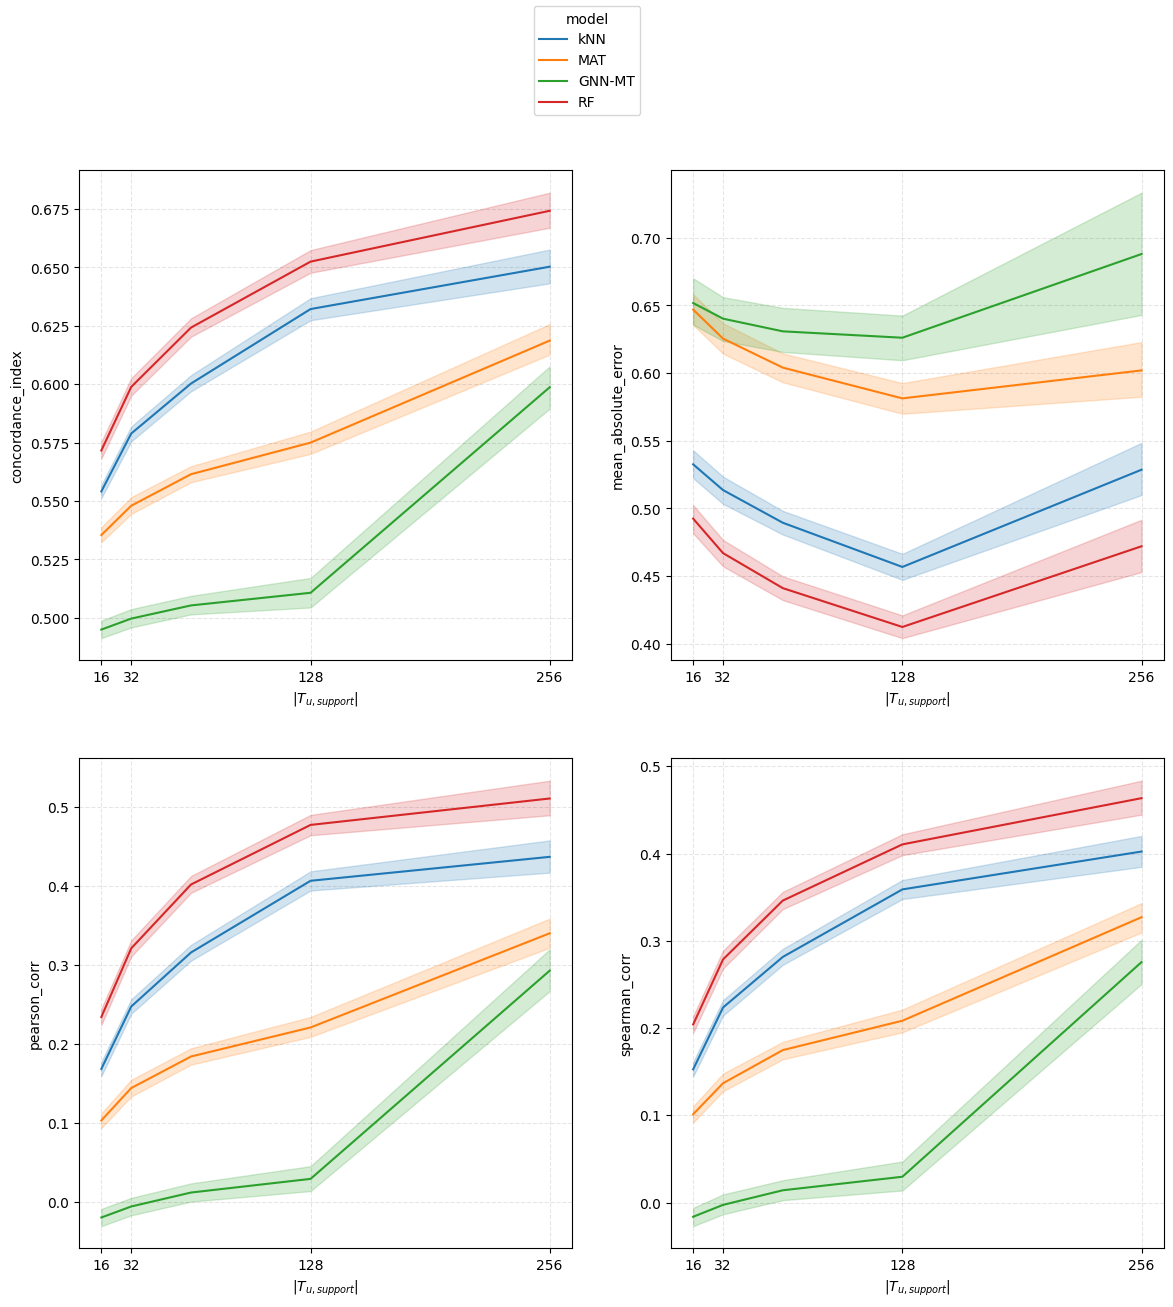

Bad pipe message: %s [b'<z\xf3U\x0c\x81\xb57y\x99)H\x88)/\x8f\xbe\xcb \xd7e\xb3B\xff\xdc\x05F', b'\xab\xbf\x84;PRVB\xbd\x9f\xf7\x19%\x08\xd9-/5\xa6\xa0n&\x00\x08\x13', b'\x03', b'\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127', b'.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"\xd5e\x06\xd4Z6AD\xb0\x94\xd1\xc9\xbd\x9e5\x8a\xf5\xef\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0

In [66]:
def plot_perf_models(model_metric_df) -> None:
    fig = plt.figure(figsize=(14,14))
    axes = fig.subplots(nrows = 2, ncols = 2)
    metric_names = ['concordance_index', 'mean_absolute_error', 'pearson_corr', 'spearman_corr']
    for ax, metric_name in zip(fig.axes, metric_names):
        sns.lineplot(model_metric_df,#.assign(fixed_root_mean_squared_error = np.log10(df.root_mean_squared_error)/),
                    x = 'num_train', y = metric_name,
                    hue = 'model',
                    ax=ax)
        ax.get_legend().set_visible(False)
        ax.set_xlabel('$|T_{u, support}|$')
        ax.set_xticks([16,32,128,256])
        ax.grid(True, axis='y', color='black', alpha=0.1, linestyle='--')
        ax.grid(True, axis='x', color='black', alpha=0.1, linestyle='--')
    lines, labels = fig.axes[0].get_legend_handles_labels()
    fig.legend(lines, labels, title = 'model', loc = 'upper center')

    plt.show()
plot_perf_models(model_metric_df)

In [12]:
model_metric_df.merge(tmp_df4[['task', 'mean']], on = 'task')

model_x           task  num_train_requested_x  num_train_x  \
0         kNN  CHEMBL2219340                     16           16   
1         kNN  CHEMBL2219340                     16           16   
2         kNN  CHEMBL2219340                     16           16   
3         kNN  CHEMBL2219340                     16           16   
4         kNN  CHEMBL2219340                     16           16   
...       ...            ...                    ...          ...   
33545      RF  CHEMBL2219335                    128          128   
33546      RF  CHEMBL2219335                    128          128   
33547      RF  CHEMBL2219335                    128          128   
33548      RF  CHEMBL2219335                    128          128   
33549      RF  CHEMBL2219335                    128          128   

       fraction_positive_train_x  num_test_x  fraction_positive_test_x  \
0                       0.500000         141                  0.489362   
1                       0.500000         141                  0.489362   
2                       0.500000         141                  0.489362   
3                       0.500000         141                  0.489362   
4                       0.500000         141                  0.489362   
...                          ...         ...                       ...   
33545                   0.476562          29                  0.482759   
33546                   0.476562          29                  0.482759   
33547                   0.476562          29                  0.482759   
33548                   0.476562          29                  0.482759   
33549                   0.476562          29                  0.482759   

       seed_x  valid_score_x  mean_absolute_error_x  ...  ksppval  count  \
0           0            NaN              28.930496  ...    100.0  141.0   
1           1            NaN              37.782979  ...    100.0  141.0   
2           2            NaN              33.597163  ...    100.0  141.0   
3           3            NaN              31.343262  ...    100.0  141.0   
4           4            NaN              29.432624  ...    100.0  141.0   
...       ...            ...                    ...  ...      ...    ...   
33545       5            NaN               9.705517  ...    100.0  141.0   
33546       6            NaN              10.634483  ...    100.0  141.0   
33547       7            NaN              14.576552  ...    100.0  141.0   
33548       8            NaN              13.941724  ...    100.0  141.0   
33549       9            NaN              11.613103  ...    100.0  141.0   

            mean        std   min   25%   50%    75%    max   IQR  
0      76.957447  37.750283  -1.0  60.0  94.0  103.0  120.0  43.0  
1      76.957447  37.750283  -1.0  60.0  94.0  103.0  120.0  43.0  
2      76.957447  37.750283  -1.0  60.0  94.0  103.0  120.0  43.0  
3      76.957447  37.750283  -1.0  60.0  94.0  103.0  120.0  43.0  
4      76.957447  37.750283  -1.0  60.0  94.0  103.0  120.0  43.0  
...          ...        ...   ...   ...   ...    ...    ...   ...  
33545  91.290780  16.519486  12.0  85.0  94.0  102.0  121.0  17.0  
33546  91.290780  16.519486  12.0  85.0  94.0  102.0  121.0  17.0  
33547  91.290780  16.519486  12.0  85.0  94.0  102.0  121.0  17.0  
33548  91.290780  16.519486  12.0  85.0  94.0  102.0  121.0  17.0  
33549  91.290780  16.519486  12.0  85.0  94.0  102.0  121.0  17.0  

[33550 rows x 46 columns]

AttributeError: 'NoneType' object has no attribute 'set_visible'

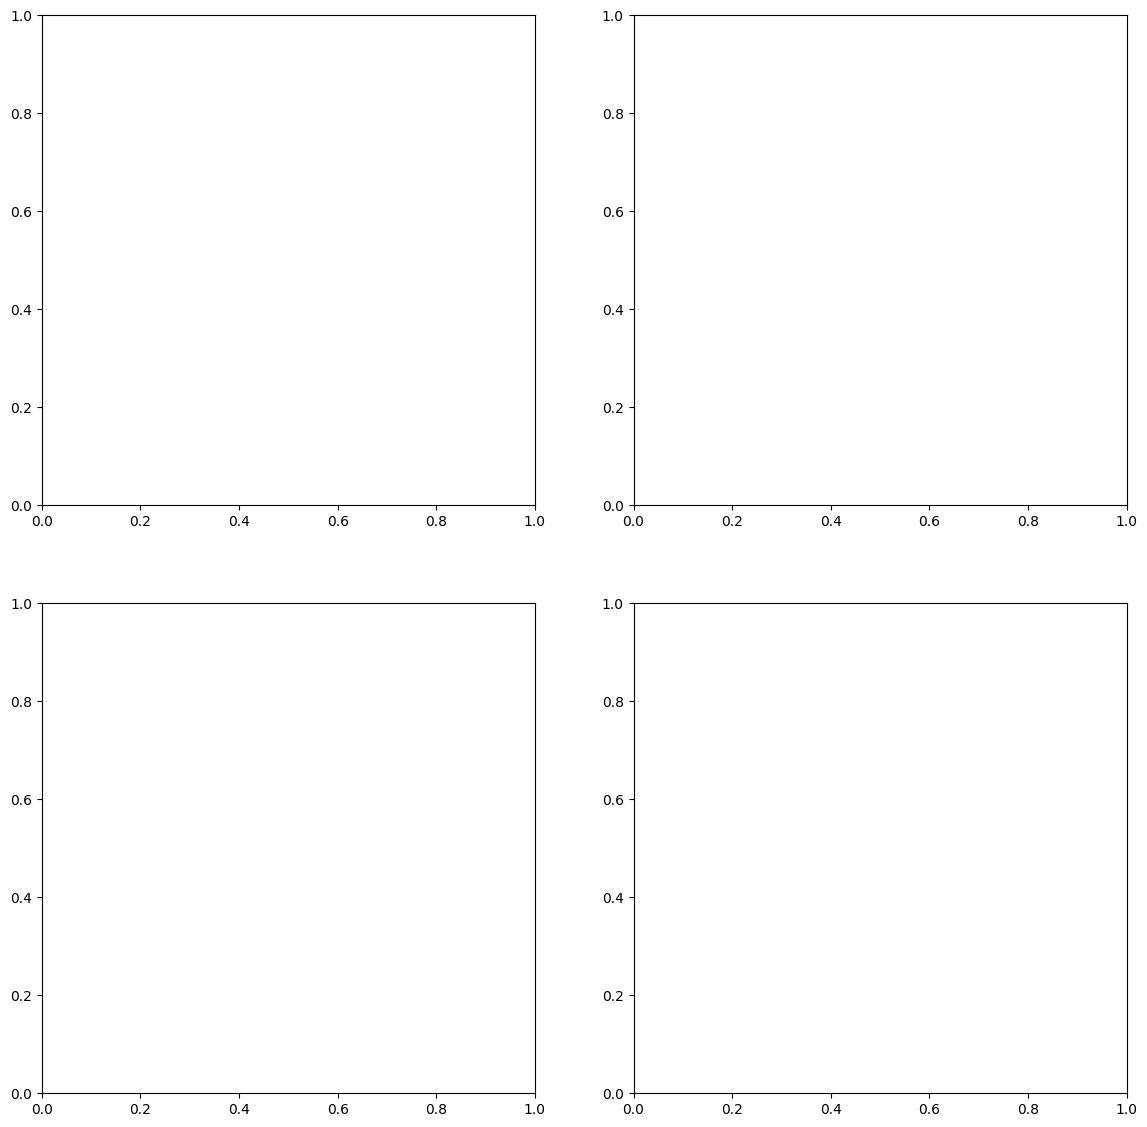

In [8]:
tmp_df4 = model_predlabel_df.groupby(['model', 'task', 'num_train_requested', 'seed']).agg({'label': ('describe')}).droplevel(0, axis=1,).reset_index().query('mean > 200')
data_df = model_metric_df.merge(tmp_df4, on = ['model', 'task', 'num_train_requested', 'seed'])
plot_perf_models(data_df)

<Axes: xlabel='num_train', ylabel='mean_absolute_error'>

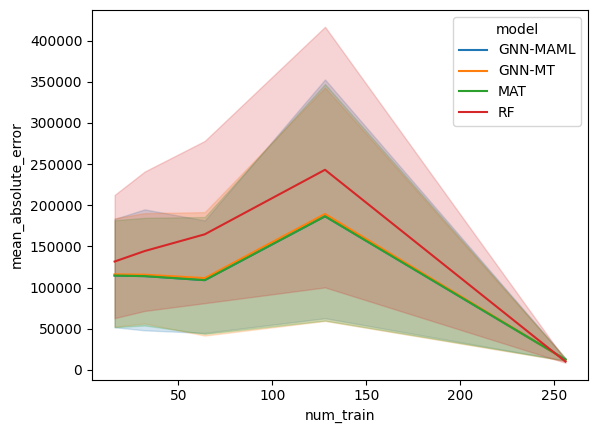

In [ ]:
sns.lineplot(model_metric_df,#.assign(fixed_root_mean_squared_error = np.log10(df.root_mean_squared_error)/),
            x = 'num_train', y = 'mean_absolute_error',
            hue = 'model')
plt.xlabel('$|T_{u, support}|$')
plt.xticks([16,32,128,256])
plt.grid(True, axis='y', color='black', alpha=0.1, linestyle='--')
plt.grid(True, axis='x', color='black', alpha=0.1, linestyle='--')
plt.legend(loc = 'upper right')

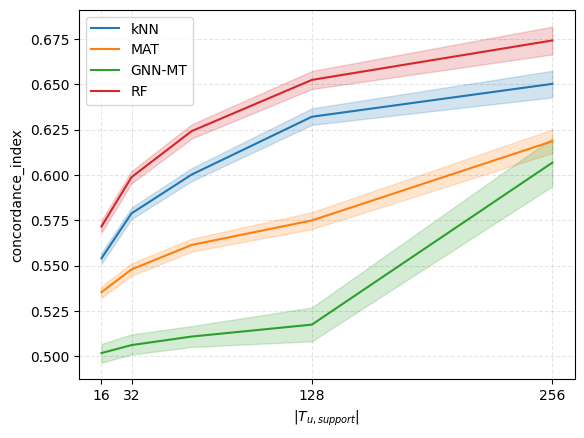

In [10]:
sns.lineplot(model_metric_df,#.assign(fixed_root_mean_squared_error = np.log10(df.root_mean_squared_error)/),
            x = 'num_train', y = 'concordance_index',  # 'pearson_corr', 'concordance_index'
            hue = 'model')
plt.xlabel('$|T_{u, support}|$')
plt.xticks([16,32,128,256])
plt.grid(True, axis='y', color='black', alpha=0.1, linestyle='--')
plt.grid(True, axis='x', color='black', alpha=0.1, linestyle='--')
plt.legend(loc = 'upper left')

###### stats

In [ ]:
query_str = ' and '.join([
        'model == "RF"',
        'seed == 3',
        'num_train_requested == 16',
        
        # 'num_train == 128',
        ])
data_df = model_metric_df.query(query_str)

In [ ]:
data_df

model           task  num_train_requested  num_train  \
20133    RF  CHEMBL2219340                   16         16   
20173    RF  CHEMBL2219102                   16         16   
20213    RF  CHEMBL3707783                   16         16   
20253    RF  CHEMBL1243970                   16         16   
20293    RF  CHEMBL1794504                   16         16   
...     ...            ...                  ...        ...   
26633    RF  CHEMBL2219059                   16         16   
26673    RF  CHEMBL3706356                   16         16   
26723    RF  CHEMBL2219113                   16         16   
26763    RF  CHEMBL2219175                   16         16   
26803    RF  CHEMBL2219335                   16         16   

       fraction_positive_train  num_test  fraction_positive_test  seed  \
20133                   0.5000       141                0.489362     3   
20173                   0.4375       141                0.446809     3   
20213                   0.5000       146                0.500000     3   
20253                   0.5000       192                0.500000     3   
20293                   0.5000       114                0.508772     3   
...                        ...       ...                     ...   ...   
26633                   0.5000       141                0.496454     3   
26673                   0.5000       277                0.498195     3   
26723                   0.5000       141                0.496454     3   
26763                   0.5000       141                0.468085     3   
26803                   0.5000       141                0.475177     3   

       valid_score  mean_absolute_error  root_mean_squared_error   max_error  \
20133          NaN            33.518369                39.937968      91.500   
20173          NaN            10.366028                16.793964      86.320   
20213          NaN          6112.005205             18242.772518  155850.070   
20253          NaN          6455.145677             21849.403040   99743.270   
20293          NaN         13594.430860             15877.717121   63201.937   
...            ...                  ...                      ...         ...   
26633          NaN            23.541773                30.938522     109.070   
26673          NaN           489.541733              1956.073463   24653.120   
26723          NaN            15.349007                23.123469      90.260   
26763          NaN             8.347447                13.809766      79.160   
26803          NaN            10.964043                15.404638      61.020   

       pearson_corr  concordance_index  spearman_corr  r_squared  kendall_tau  
20133      0.144916           0.575621       0.221278  -0.127256     0.151241  
20173      0.322193           0.592442       0.263205  -0.007410     0.184884  
20213      0.622283           0.741871       0.670313   0.261290     0.483743  
20253      0.209824           0.612411       0.328160  -0.071577     0.224821  
20293      0.318973           0.622403       0.359557   0.084439     0.244806  
...             ...                ...            ...        ...          ...  
26633      0.309772           0.586827       0.254181   0.090014     0.173654  
26673      0.159743           0.669600       0.487891  -0.025712     0.339201  
26723      0.214887           0.533641       0.104787  -0.024636     0.067282  
26763      0.022767           0.506594       0.019853  -0.022752     0.013187  
26803      0.368172           0.536045       0.104097   0.124208     0.072090  

[157 rows x 17 columns]

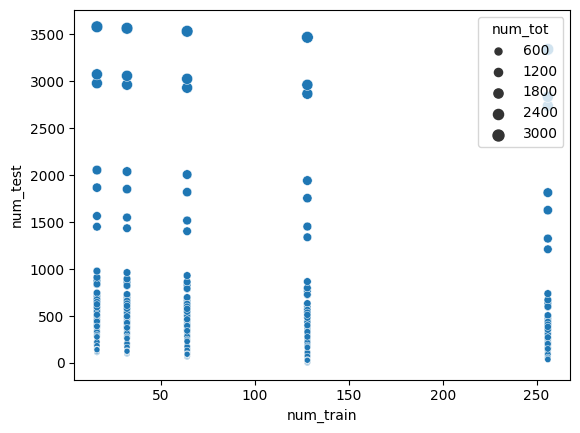

In [69]:
query_str = ' and '.join([
        'model == "RF"',
        'seed == 3',
        # 'num_train == 128',
        ])
data_df = model_metric_df.query(query_str)

g = sns.scatterplot(data_df.assign(num_tot = data_df['num_train'] + data_df['num_test']), 
        x = 'num_train', y = 'num_test',
        size='num_tot',
        # hue = 'model', #style = 'seed',
        )
# plt.title(task)
plt.show()

###### end

##### Preparing data for label distribution of tasks in meta-test

In [22]:
query_str = ' and '.join([
        'model == "RF"',
        'seed == 3',
        'num_train == 16',
        ])

import scipy.stats as sts
ksstat = lambda x: sts.kstest(rvs=x.values, cdf='norm')[0]
ksppval = lambda x: -np.log10(1e-100 + sts.kstest(rvs=x.values, cdf='norm')[1])
ksstat.__name__ = 'ksstat'
ksppval.__name__ = 'ksppval'

def make_summ_df(model_predlabel_df, model_metric_df, query_str = None):
    if query_str is not None:   
        tmp_df1 = model_predlabel_df.query(query_str)
        tmp_df2 = model_metric_df.query(query_str)
    else:
        tmp_df1 = model_predlabel_df.query(query_str)
        tmp_df2 = model_metric_df.query(query_str)
    tmp_df3 = tmp_df1.groupby(['model', 'task', 'num_train_requested', 'seed']).agg({'label': ('describe')}).droplevel(0, axis=1,).reset_index()
    tmp_df1 = tmp_df1.groupby(['model', 'task', 'num_train_requested', 'seed']).agg({'label': ('median', 'skew', ksstat, ksppval)}).droplevel(0, axis=1,).reset_index()
    tmp_df4 = tmp_df2.merge(tmp_df1, on = ['model', 'task', 'num_train_requested', 'seed']).merge(tmp_df3, on = ['model', 'task', 'num_train_requested', 'seed'])
    tmp_df4 = tmp_df4.assign(IQR=tmp_df4['75%'] - tmp_df4['25%'])
    return tmp_df4

tmp_df4 = make_summ_df(model_predlabel_df, model_metric_df, query_str = query_str)

###### stats

In [55]:
tmp_df4.iloc[:,-15:]

r_squared  kendall_tau  median      skew    skstat  skppval  count  \
0    -0.127256     0.151241    94.0 -1.128912  0.913420    100.0  141.0   
1    -0.007410     0.184884    97.0 -3.175898  0.992908    100.0  141.0   
2     0.261290     0.483743   195.0  4.639744  1.000000    100.0  146.0   
3    -0.071577     0.224821   415.0  3.840226  0.994792    100.0  192.0   
4     0.084439     0.244806  1062.2  0.759518  1.000000    100.0  114.0   
..         ...          ...     ...       ...       ...      ...    ...   
152   0.090014     0.173654    87.0 -0.911989  0.964507    100.0  141.0   
153  -0.025712     0.339201   200.0  9.124277  0.995040    100.0  277.0   
154  -0.024636     0.067282    93.0 -1.640877  0.998650    100.0  141.0   
155  -0.022752     0.013187   102.0 -2.605873  1.000000    100.0  141.0   
156   0.124208     0.072090    94.0 -1.835282  1.000000    100.0  141.0   

             mean           std    min    25%     50%      75%       max  \
0       76.957447     37.750283   -1.0   60.0    94.0    103.0     120.0   
1       92.226950     16.791736   -2.0   90.0    97.0    101.0     111.0   
2     7073.476027  21298.366970    9.0   29.0   195.0   1400.0  170000.0   
3     6628.919271  21162.251907    0.5  154.0   415.0   1270.0  100000.0   
4    15353.214912  16667.010680  126.2  502.4  1062.2  28252.1   79432.8   
..            ...           ...    ...    ...     ...      ...       ...   
152     81.134752     32.548254   -4.0   68.0    87.0    104.0     145.0   
153    594.693141   1934.897126    2.0   61.0   200.0    500.0   25000.0   
154     89.836879     22.925228    3.0   83.0    93.0    102.0     137.0   
155    100.148936     13.703981   23.0   96.0   102.0    107.0     131.0   
156     91.290780     16.519486   12.0   85.0    94.0    102.0     121.0   

         IQR  
0       43.0  
1       11.0  
2     1371.0  
3     1116.0  
4    27749.7  
..       ...  
152     36.0  
153    439.0  
154     19.0  
155     11.0  
156     17.0  

[157 rows x 15 columns]

In [47]:
tmp_df4.query('mean > 200')

model           task  num_train_requested  num_train  \
2      RF  CHEMBL3707783                   16         16   
3      RF  CHEMBL1243970                   16         16   
4      RF  CHEMBL1794504                   16         16   
9      RF  CHEMBL3888181                   16         16   
11     RF  CHEMBL1613926                   16         16   
..    ...            ...                  ...        ...   
144    RF  CHEMBL1738485                   16         16   
146    RF   CHEMBL641707                   16         16   
148    RF  CHEMBL1614423                   16         16   
150    RF  CHEMBL1614153                   16         16   
153    RF  CHEMBL3706356                   16         16   

     fraction_positive_train  num_test  fraction_positive_test  seed  \
2                     0.5000       146                0.500000     3   
3                     0.5000       192                0.500000     3   
4                     0.5000       114                0.508772     3   
9                     0.5000       203                0.497537     3   
11                    0.5000       119                0.495798     3   
..                       ...       ...                     ...   ...   
144                   0.5000       286                0.500000     3   
146                   0.3125       148                0.317568     3   
148                   0.3750       513                0.380117     3   
150                   0.3125      3072                0.334961     3   
153                   0.5000       277                0.498195     3   

     valid_score  mean_absolute_error  ...  skppval   count          mean  \
2            NaN          6112.005205  ...     -0.0   146.0   7073.476027   
3            NaN          6455.145677  ...     -0.0   192.0   6628.919271   
4            NaN         13594.430860  ...     -0.0   114.0  15353.214912   
9            NaN           931.956222  ...     -0.0   203.0    760.176946   
11           NaN         40502.042017  ...     -0.0   119.0  52380.504202   
..           ...                  ...  ...      ...     ...           ...   
144          NaN          5428.454056  ...     -0.0   286.0   9917.146853   
146          NaN         17841.344595  ...     -0.0   148.0  27450.000000   
148          NaN         17692.796672  ...     -0.0   513.0  30566.867173   
150          NaN         13842.014650  ...     -0.0  3072.0  21454.600749   
153          NaN           489.541733  ...     -0.0   277.0    594.693141   

              std    min      25%      50%       75%       max       IQR  
2    21298.366970    9.0    29.00    195.0    1400.0  170000.0   1371.00  
3    21162.251907    0.5   154.00    415.0    1270.0  100000.0   1116.00  
4    16667.010680  126.2   502.40   1062.2   28252.1   79432.8  27749.70  
9     3039.477928    1.7    36.20    137.0     405.0   37400.0    368.80  
11   50858.353494  280.0  2650.00  35400.0  100000.0  182000.0  97350.00  
..            ...    ...      ...      ...       ...       ...       ...  
144   6436.571999  386.0  4630.75   8523.5   15519.5   20000.0  10888.75  
146  28410.848843  100.0  5250.00  18000.0   48250.0  164000.0  43000.00  
148  23273.270297    1.0  1719.41  50000.0   50000.0   50000.0  48280.59  
150  15076.868952  281.8  5011.90  22387.2   39810.7  100000.0  34798.80  
153   1934.897126    2.0    61.00    200.0     500.0   25000.0    439.00  

[80 rows x 30 columns]

In [48]:
tmp_df4.query('mean < median')

model           task  num_train_requested  num_train  \
0      RF  CHEMBL2219340                   16         16   
1      RF  CHEMBL2219102                   16         16   
5      RF  CHEMBL2219191                   16         16   
6      RF  CHEMBL2218959                   16         16   
7      RF  CHEMBL2219242                   16         16   
..    ...            ...                  ...        ...   
151    RF  CHEMBL2219407                   16         16   
152    RF  CHEMBL2219059                   16         16   
154    RF  CHEMBL2219113                   16         16   
155    RF  CHEMBL2219175                   16         16   
156    RF  CHEMBL2219335                   16         16   

     fraction_positive_train  num_test  fraction_positive_test  seed  \
0                     0.5000       141                0.489362     3   
1                     0.4375       141                0.446809     3   
5                     0.5000       141                0.468085     3   
6                     0.5000       141                0.496454     3   
7                     0.4375       141                0.439716     3   
..                       ...       ...                     ...   ...   
151                   0.5000       141                0.475177     3   
152                   0.5000       141                0.496454     3   
154                   0.5000       141                0.496454     3   
155                   0.5000       141                0.468085     3   
156                   0.5000       141                0.475177     3   

     valid_score  mean_absolute_error  ...        skppval  count        mean  \
0            NaN            33.518369  ... -3.026567e-150  141.0   76.957447   
1            NaN            10.366028  ... -1.824463e-303  141.0   92.226950   
5            NaN            10.404965  ...  -0.000000e+00  141.0   90.496454   
6            NaN            28.156454  ... -1.232950e-167  141.0   70.042553   
7            NaN            11.913901  ... -8.521672e-293  141.0   89.085106   
..           ...                  ...  ...            ...    ...         ...   
151          NaN            21.285177  ... -9.959033e-216  141.0   85.496454   
152          NaN            23.541773  ... -7.422882e-205  141.0   81.134752   
154          NaN            15.349007  ...  -0.000000e+00  141.0   89.836879   
155          NaN             8.347447  ...  -0.000000e+00  141.0  100.148936   
156          NaN            10.964043  ...  -0.000000e+00  141.0   91.290780   

           std   min   25%    50%    75%    max   IQR  
0    37.750283  -1.0  60.0   94.0  103.0  120.0  43.0  
1    16.791736  -2.0  90.0   97.0  101.0  111.0  11.0  
5    18.832959   6.0  88.0   94.0  100.0  114.0  12.0  
6    36.773801  -2.0  43.0   83.0   96.0  123.0  53.0  
7    20.713174   1.0  89.0   96.0   99.0  128.0  10.0  
..         ...   ...   ...    ...    ...    ...   ...  
151  33.466534  -1.0  83.0  100.0  106.0  121.0  23.0  
152  32.548254  -4.0  68.0   87.0  104.0  145.0  36.0  
154  22.925228   3.0  83.0   93.0  102.0  137.0  19.0  
155  13.703981  23.0  96.0  102.0  107.0  131.0  11.0  
156  16.519486  12.0  85.0   94.0  102.0  121.0  17.0  

[91 rows x 30 columns]

###### end

In [4]:
assay_reglabel_summ_df = pd.read_csv('../datasets/entire_train_set_annot/assay_reglabel_summary.csv')

/home/hojaechoi/work/qsar-pytorch/deargen_qsar/analysis/plot_graphs.py:382: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  g._axes.set_xlim((xy_min, xy_max))
/home/hojaechoi/work/qsar-pytorch/deargen_qsar/analysis/plot_graphs.py:383: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  g._axes.set_ylim((xy_min, xy_max))


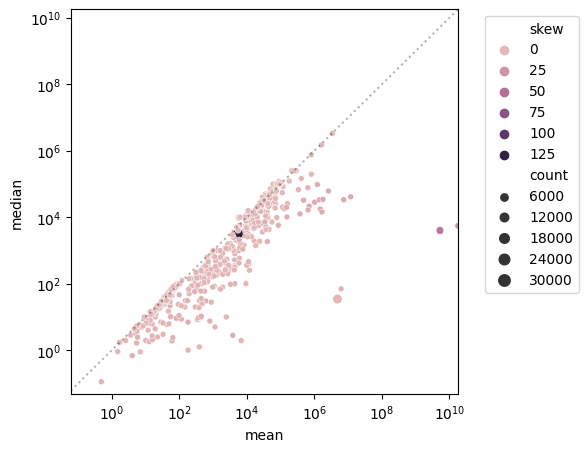

In [23]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    assay_reglabel_summ_df.query('stage == "train"').sample(500),
    x = 'mean', y='median',
    size='count', hue = 'skew',
    # alpha =0.3
    )
plt.xscale('log')
plt.yscale('log')
add_abline(g, style=':k', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

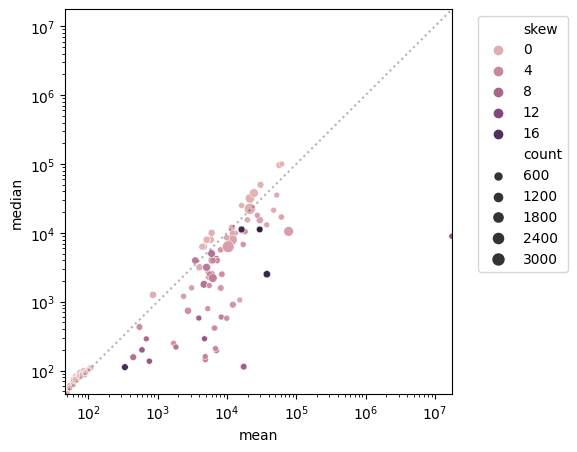

In [42]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    tmp_df4,
    x = 'mean', y='median',
    size='count', hue = 'skew',
    # alpha =0.3
    )
plt.xscale('log')
plt.yscale('log')
add_abline(g, style=':k', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

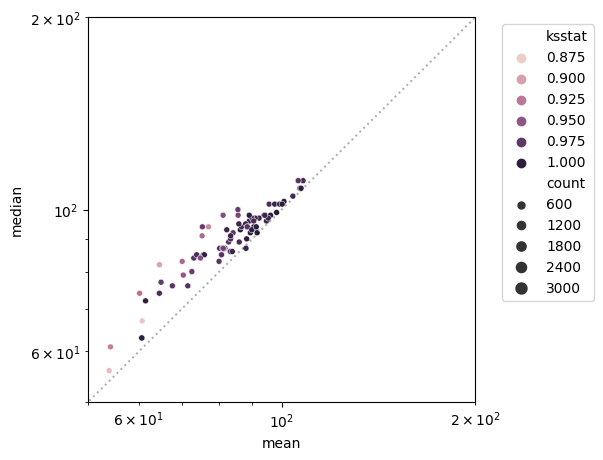

In [66]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    tmp_df4,
    x = 'mean', y='median',
    size='count', hue = 'ksstat',
    # alpha =0.3
    )
plt.xscale('log')
plt.yscale('log')
add_abline(g, style=':k', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim(50,200)
plt.ylim(50,200)
plt.show()

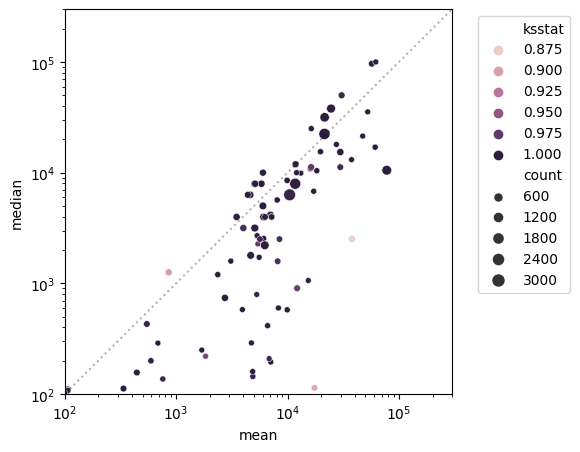

In [67]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    tmp_df4,
    x = 'mean', y='median',
    size='count', hue = 'ksstat',
    # alpha =0.3
    )
plt.xscale('log')
plt.yscale('log')
add_abline(g, style=':k', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim(1e2,3e5)
plt.ylim(1e2,3e5)
plt.show()

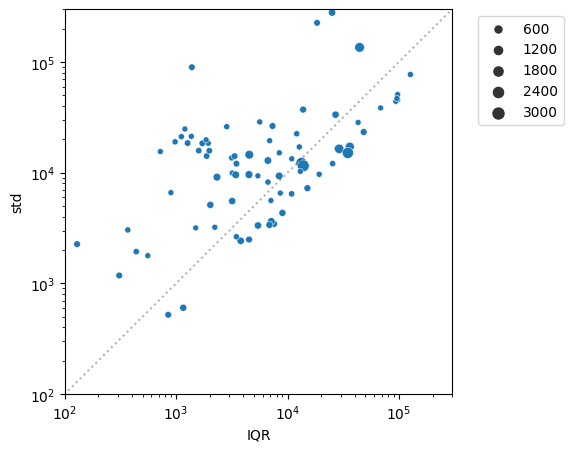

Bad pipe message: %s [b'N&\n\x1c\xfb\xf5\x89\xf4\xd8\t5\x9a\xd5\xe2\x0bc\x19\xe9 ^\xff\x15\xdf\x7f\x902\xa3ge\x86W\x8c\xe3\xa8\x97\xa2\x7fNFi>>j\xad\xa00<\x9f5\xc9D\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16']
Bad pipe message: %s [b"u\x9fH\xf7\xa2\xbf\xea\x13O|\x98\xe5\xcf\xa1\x88\xc3NQ\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1

In [24]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    tmp_df4,
    x = 'IQR', y='std',
    size='count', # hue = 'ksstat',
    # alpha =0.3
    )
plt.xscale('log')
plt.yscale('log')
add_abline(g, style=':k', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim(1e2,3e5)
plt.ylim(1e2,3e5)
plt.show()

##### Relationship between label distribution and performance (per task analysis)

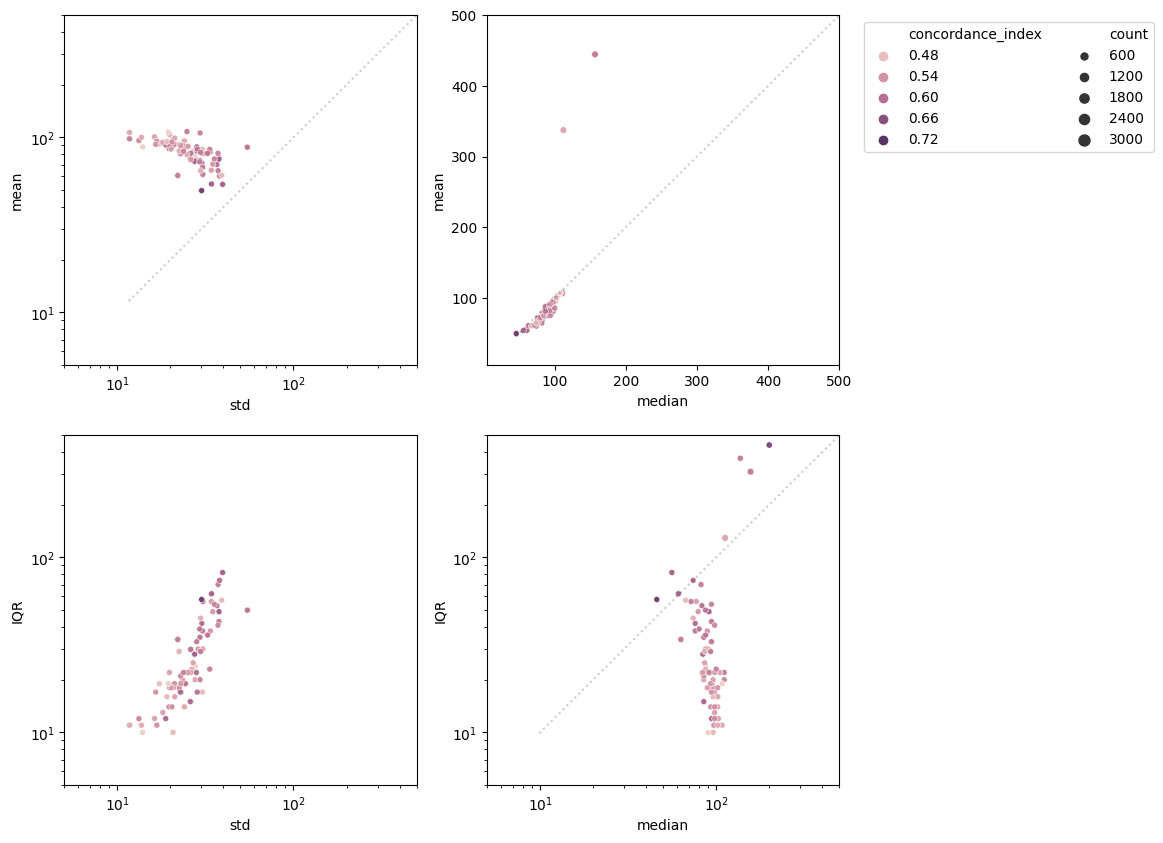

In [16]:
fig = plt.figure(figsize=(10,10))
axes = fig.subplots(ncols = 2, nrows=2)

g0 = sns.scatterplot(
    tmp_df4,
    x='std',
    y = 'mean', 
    size='count', hue = 'concordance_index',
    ax = fig.axes[0]
    )
# add_abline(g1, style=':k', alpha=0.2)
fig.axes[0].set_xscale('log')
fig.axes[0].set_yscale('log')
fig.axes[0].get_legend().remove()

g1 = sns.scatterplot(
    tmp_df4,
    x='median',
    y = 'mean', 
    size='count', hue = 'concordance_index',
    ax = fig.axes[1]
    )
# add_abline(g1, style=':k', alpha=0.2)
# fig.axes[1].set_xscale('log')
# fig.axes[1].set_yscale('log')
fig.axes[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncols = 2)
g2 = sns.scatterplot(
    tmp_df4,
    x='std',
    y = 'IQR', 
    size='count', hue = 'concordance_index',
    ax = fig.axes[2]
    )
# add_abline(g1, style=':k', alpha=0.2)
fig.axes[2].set_xscale('log')
fig.axes[2].set_yscale('log')
fig.axes[2].get_legend().remove()
g3 = sns.scatterplot(
    tmp_df4,
    x = 'median', y='IQR',
    size='count', hue = 'concordance_index',
    ax = fig.axes[3]
    )
# add_abline(g3, style=':k', alpha=0.2)
fig.axes[3].set_xlim(5,5e5)
fig.axes[3].set_ylim(5,5e5)
fig.axes[3].set_xscale('log')
fig.axes[3].set_yscale('log')
fig.axes[3].get_legend().remove()
add_abline(g0, style=':k', alpha=0.2)
add_abline(g1, style=':k', alpha=0.2)
add_abline(g3, style=':k', alpha=0.2)
lim = (5,5e2)
[(ax.set_xlim(*lim), ax.set_ylim(*lim)) for ax in fig.axes]

plt.show()

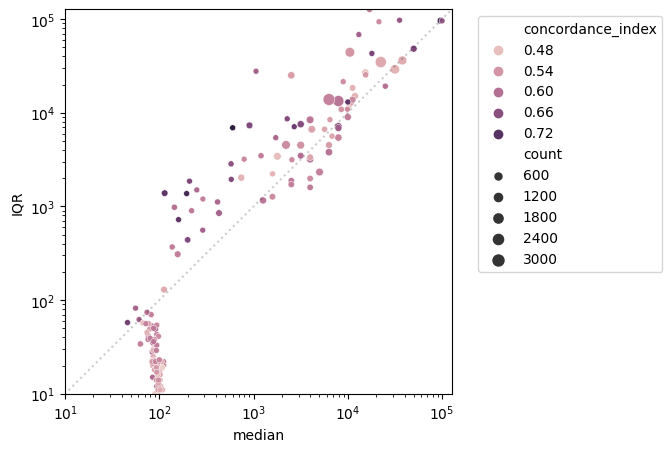

In [63]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    tmp_df4,
    x='median',
    y = 'IQR', 
    size='count', hue = 'concordance_index',
    # alpha =0.3
    )
plt.xscale('log')
plt.yscale('log')
add_abline(g, style=':k', alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

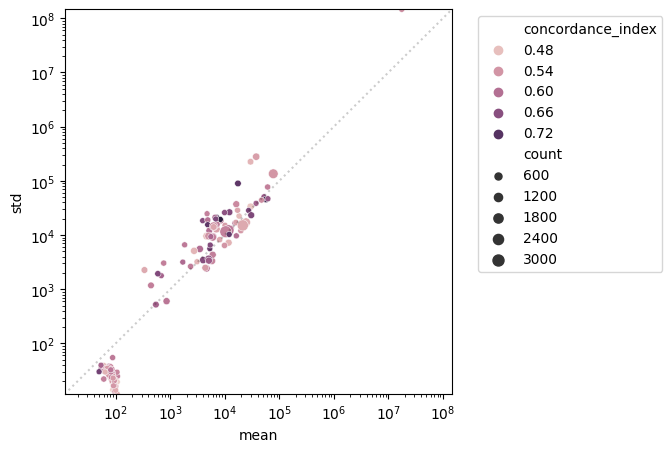

In [64]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    tmp_df4,
    x='mean',
    y = 'std', 
    size='count', hue = 'concordance_index',
    # alpha =0.3
    )
plt.xscale('log')
plt.yscale('log')
add_abline(g, style=':k', alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

157


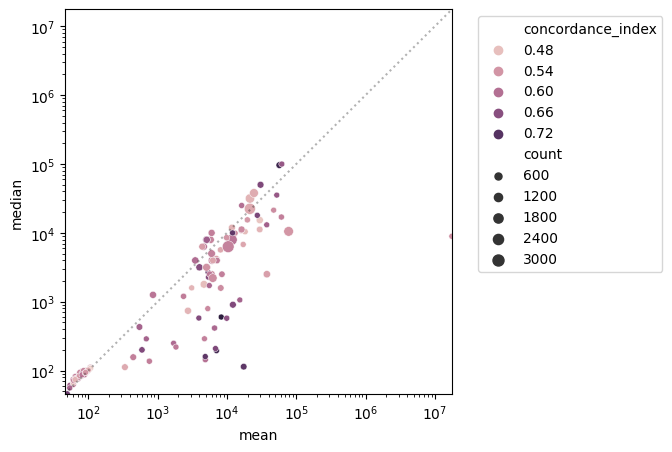

In [66]:
plt.figure(figsize=(5,5))
g = sns.scatterplot(
    tmp_df4,
    x = 'mean', 
    y='median',
    size='count', hue = 'concordance_index',
    )
add_abline(g, style=':k', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
print(len(tmp_df2))
plt.show()

##### Pred vs GT (per task analysis)

In [9]:
tasks = model_predlabel_df.task.unique().tolist()

In [22]:
data_df

model           task  num_train_requested  num_train  \
8462      kNN  CHEMBL1738485                  128        128   
8463      kNN  CHEMBL1738485                  128        128   
8464      kNN  CHEMBL1738485                  128        128   
8465      kNN  CHEMBL1738485                  128        128   
8466      kNN  CHEMBL1738485                  128        128   
...       ...            ...                  ...        ...   
6854537    RF  CHEMBL1963825                  128        128   
6854538    RF  CHEMBL1963825                  128        128   
6854539    RF  CHEMBL1963825                  128        128   
6854540    RF  CHEMBL1963825                  128        128   
6854541    RF  CHEMBL1963825                  128        128   

         fraction_positive_train  seed  pred_label      pred     label  \
8462                    0.500000     3         NaN  5.510896  4.918257   
8463                    0.500000     3         NaN  5.078138  4.889141   
8464                    0.500000     3         NaN  4.989335  5.223880   
8465                    0.500000     3         NaN  5.137825  5.128953   
8466                    0.500000     3         NaN  4.953335  5.337525   
...                          ...   ...         ...       ...       ...   
6854537                 0.453125     3         NaN  5.444000  5.400000   
6854538                 0.453125     3         NaN  5.574000  5.400000   
6854539                 0.453125     3         NaN  5.316000  4.700000   
6854540                 0.453125     3         NaN  5.427000  5.400000   
6854541                 0.453125     3         NaN  5.543001  5.400000   

         n_modal  
8462           4  
8463           4  
8464           4  
8465           4  
8466           4  
...          ...  
6854537        4  
6854538        4  
6854539        4  
6854540        4  
6854541        4  

[113932 rows x 10 columns]

In [35]:
data_df.groupby('task').agg({'model': ('nunique', 'count')}).droplevel(0, axis = 1).reset_index().rename(columns = {'nunique': 'n_model', 
                                                                                                          'count':'n_samples'})

task  n_model  n_samples
0    CHEMBL1006005        4        236
1    CHEMBL1066254        4         52
2    CHEMBL1119333        4       1156
3    CHEMBL1243967        4        320
4    CHEMBL1243970        4        320
..             ...      ...        ...
152   CHEMBL657032        3         81
153   CHEMBL663407        3         36
154   CHEMBL819742        3         90
155   CHEMBL915809        3         81
156   CHEMBL924949        3         42

[157 rows x 3 columns]

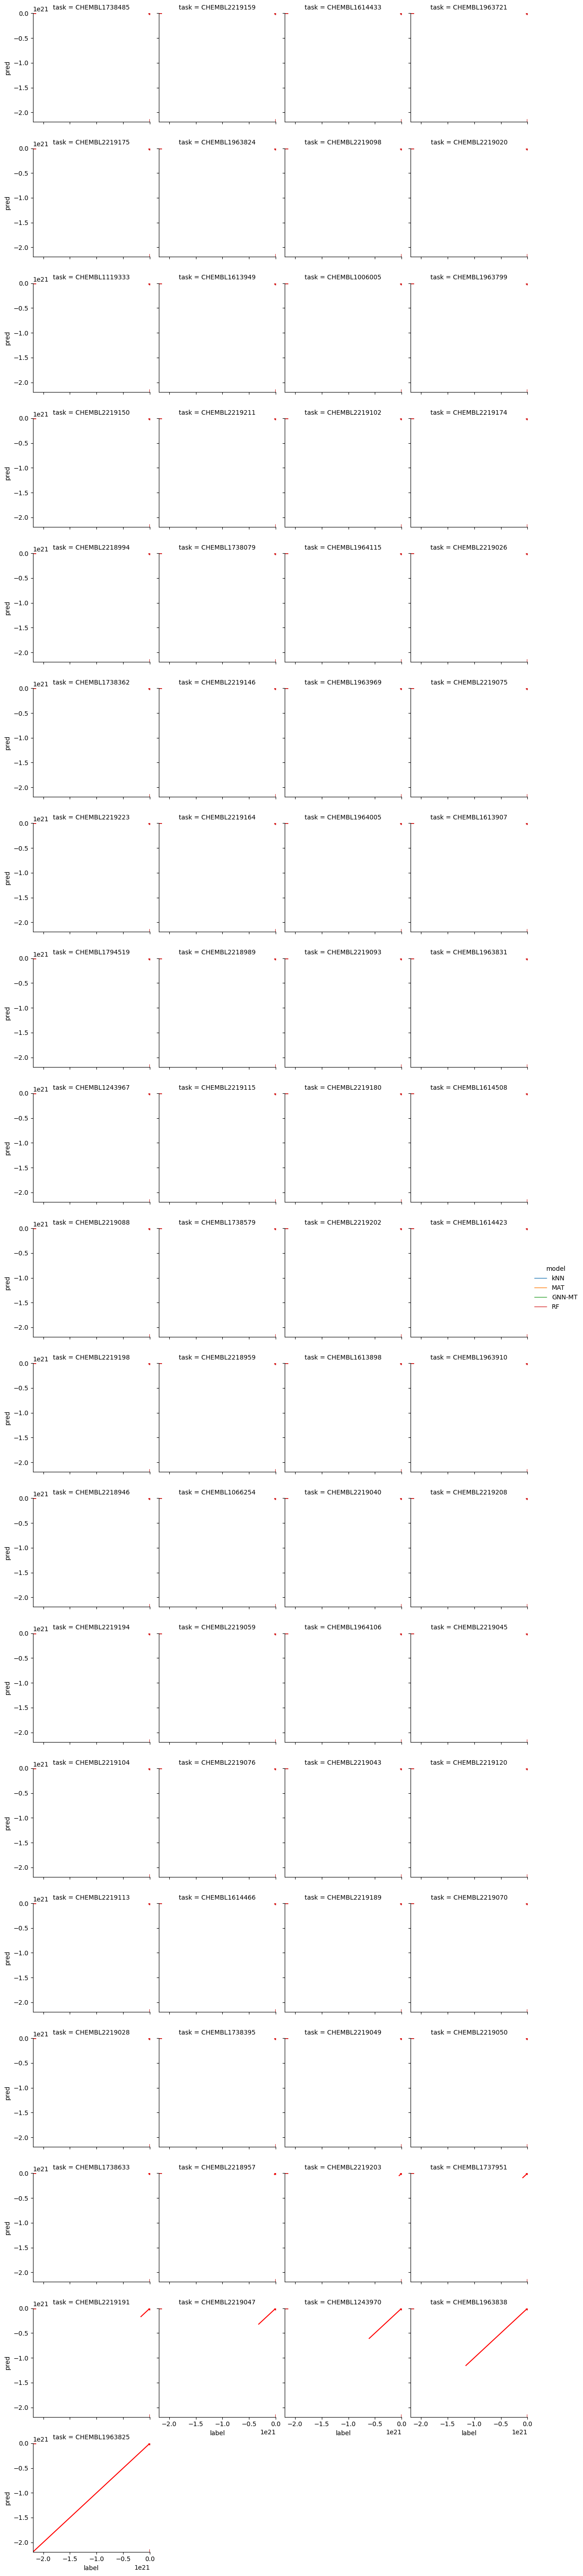

In [60]:
query_str = ' and '.join([
        # 'model != "RF"',
        # f'task == "{task}"',
        'seed == 3',
        'num_train == 128',
        ])
data_df = model_predlabel_df.query(query_str)
data_df = data_df.merge(
    data_df.groupby('task').agg(
        {'model': ('nunique', 'count')}).droplevel(
        0, axis = 1).reset_index().rename(
        columns = {'nunique': 'n_model', 
                    'count':'n_samples'}), 
                    on = ['task'])
data_df = data_df.query('n_model >= 4 and n_samples > 30')
data_df
g = sns.FacetGrid(data_df, col="task", col_wrap=4, hue = 'model') #, height=2, ylim=(0, 10))

g.map(sns.scatterplot, 
      'label', 'pred',
         #size= 'num_train', #style = 'seed',
      #   kind="scatter",
        )
g.map(sns.rugplot, 
      'label', 'pred',
         #size= 'num_train', #style = 'seed',
      #   kind="scatter",
        )

for ax in g.axes:
    add_abline(ax)
g.add_legend()
plt.show()


/home/hojaechoi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  func(*plot_args, **plot_kwargs)
/home/hojaechoi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  func(*plot_args, **plot_kwargs)
/home/hojaechoi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  func(*plot_args, **plot_kwargs)
/home/hojaechoi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  func(*plot_args, **plot_kwargs)
/home/hojaechoi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  func(*plot_args, **plot_kwargs)
/home/hojaechoi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `ax`; jointplot is a f

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f8a208a85e0> (for post_execute):


KeyboardInterrupt: 

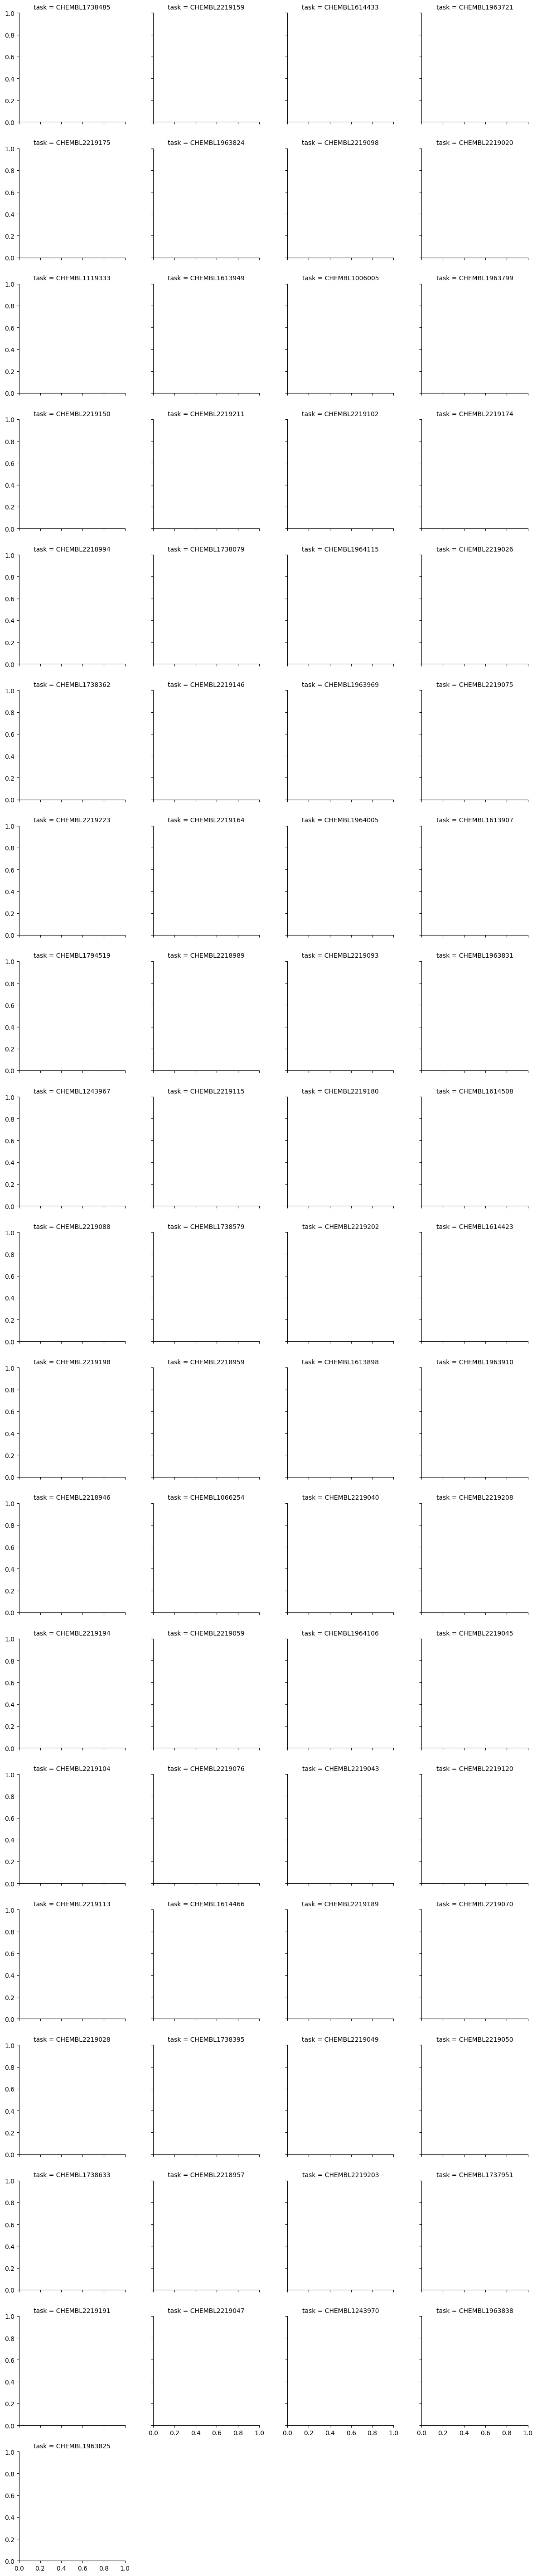

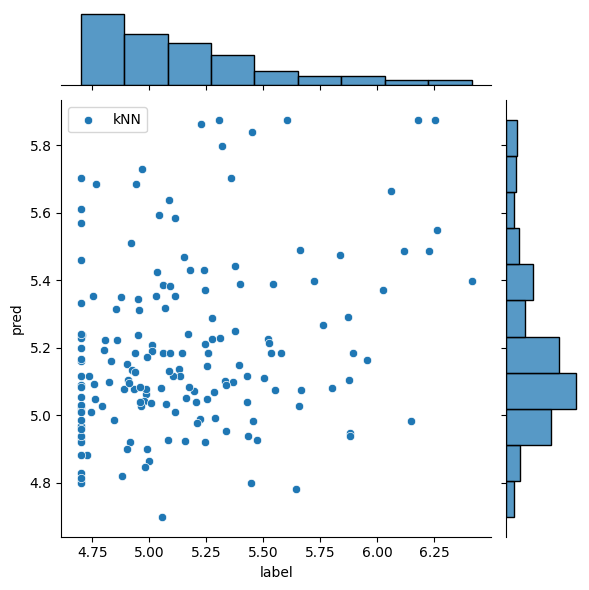

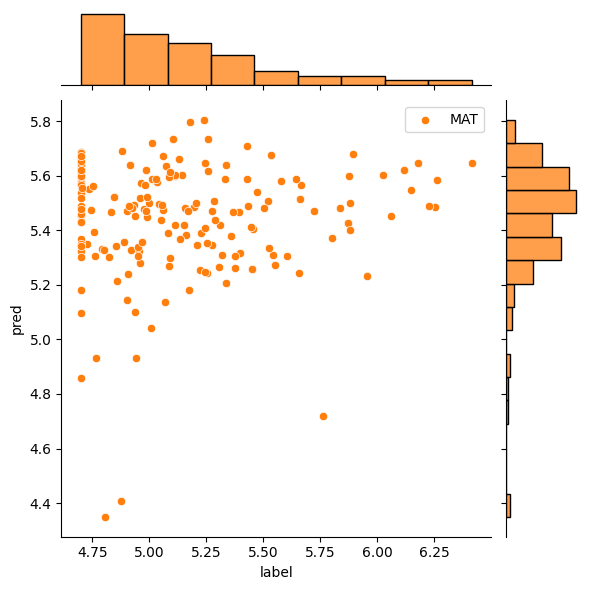

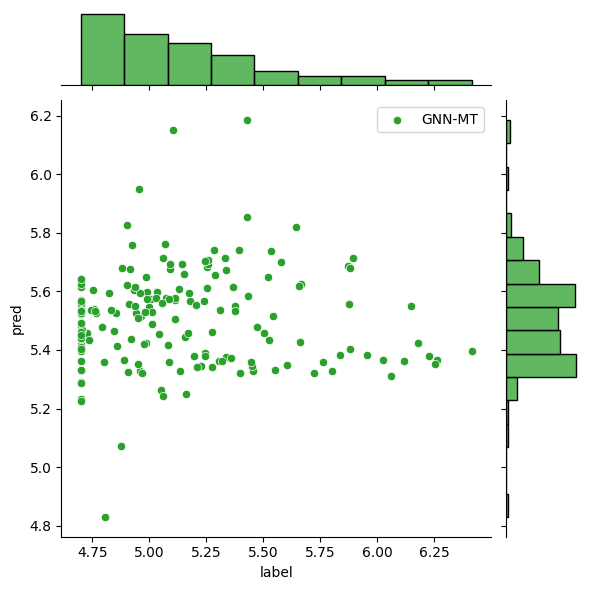

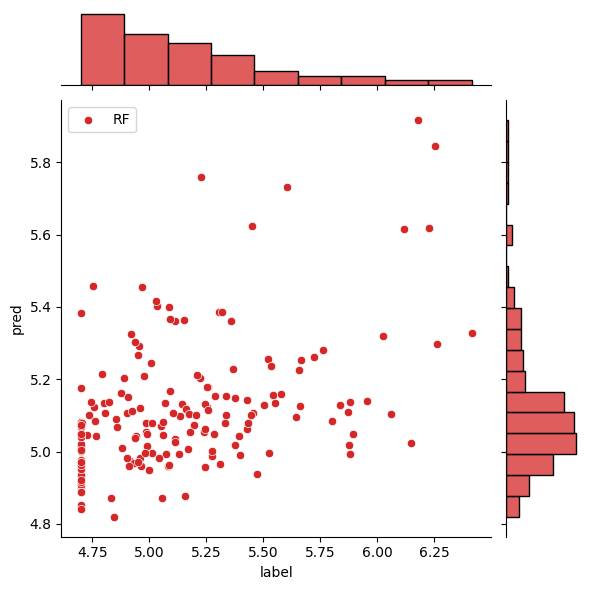

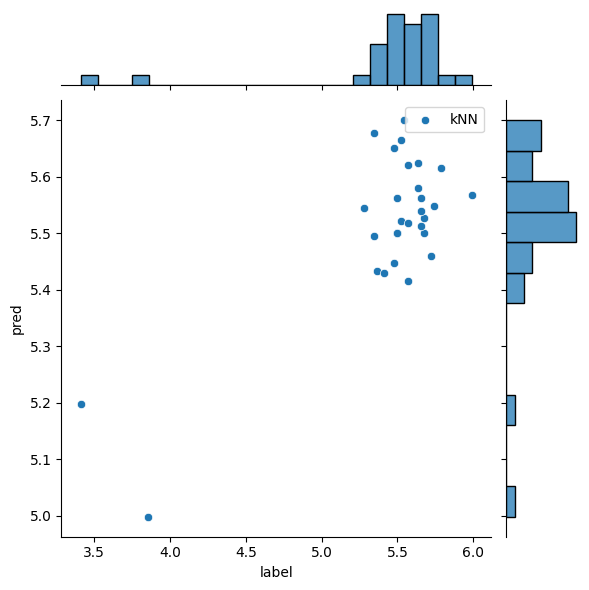

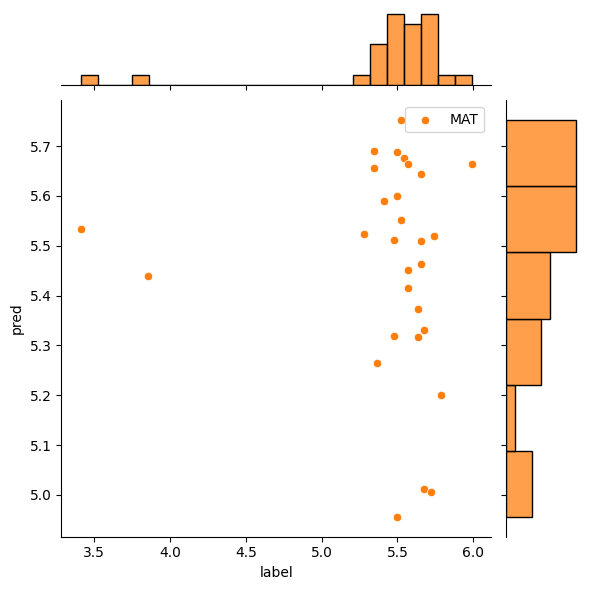

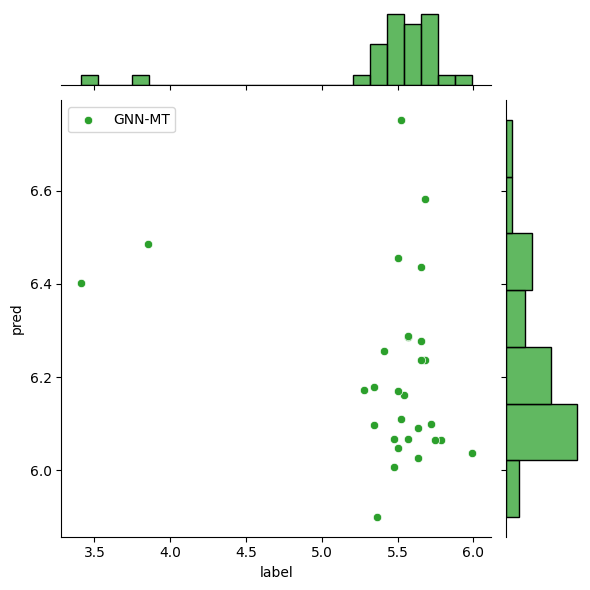

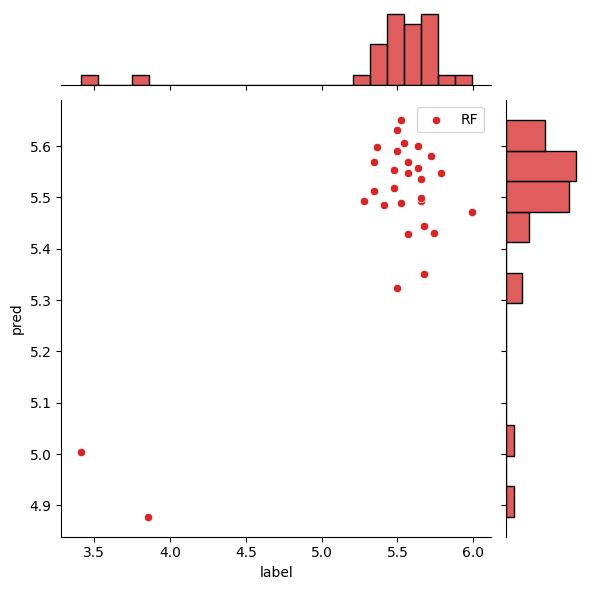

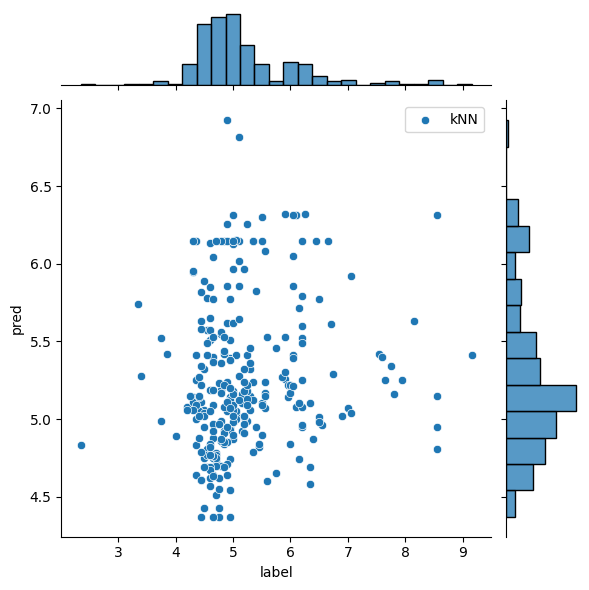

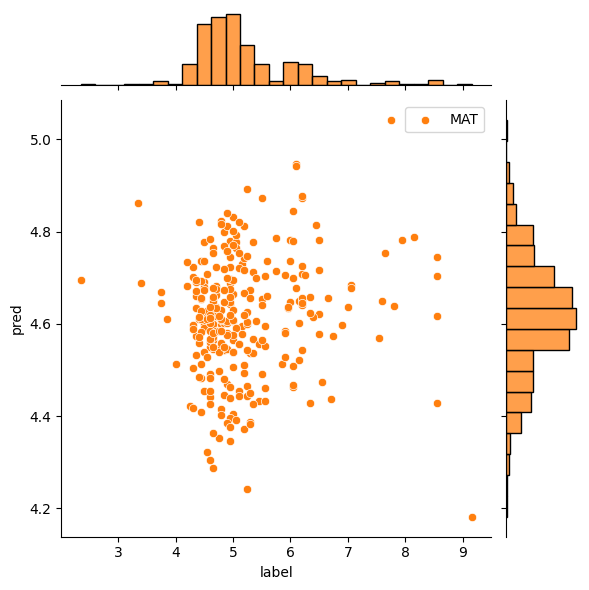

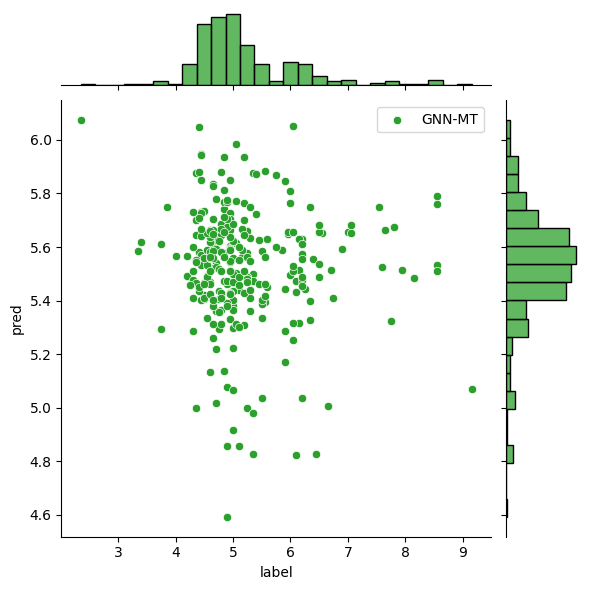

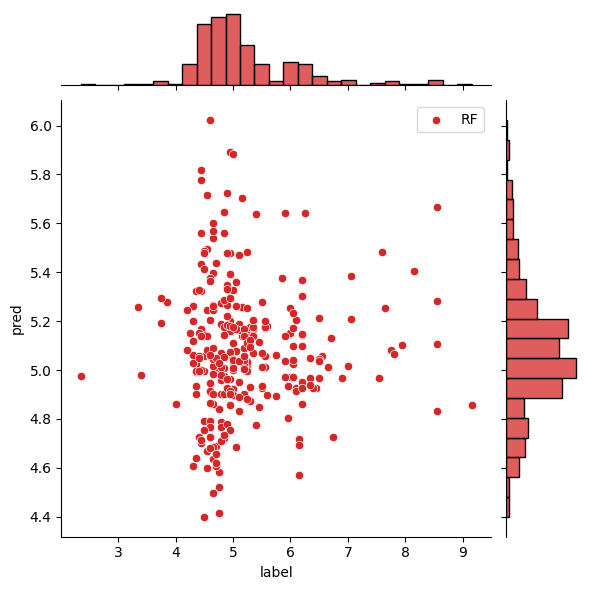

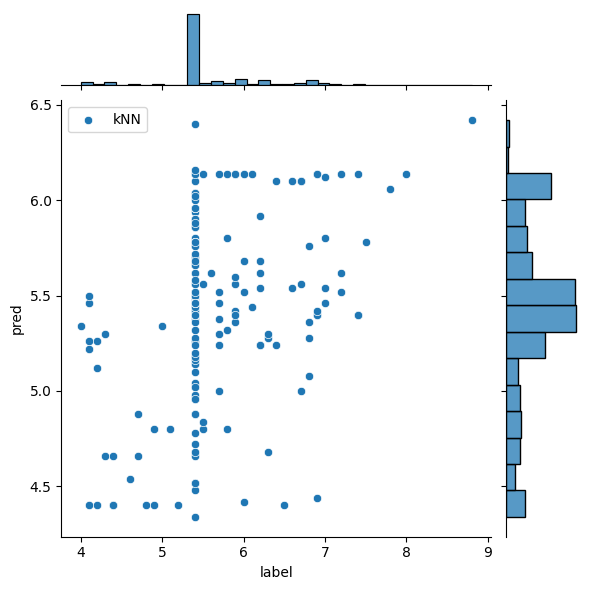

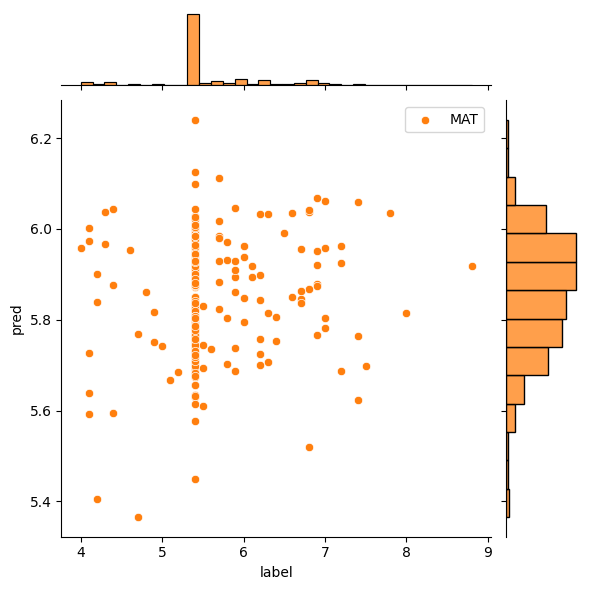

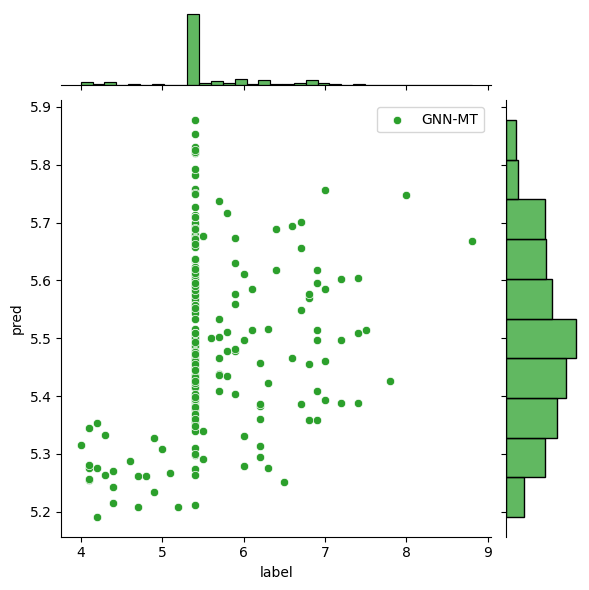

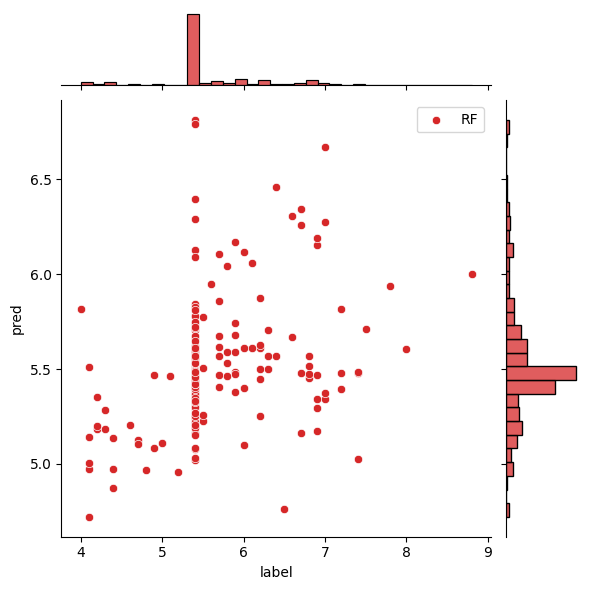

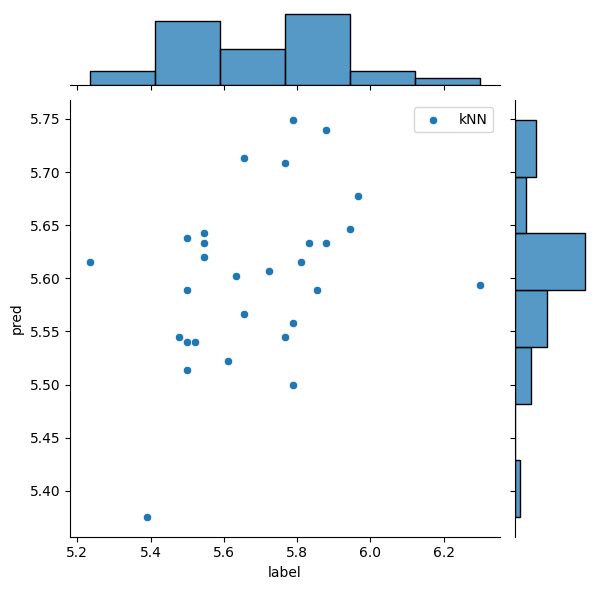

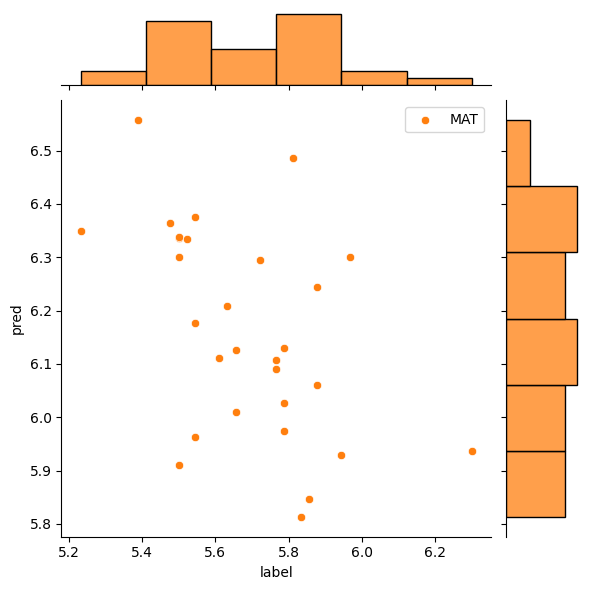

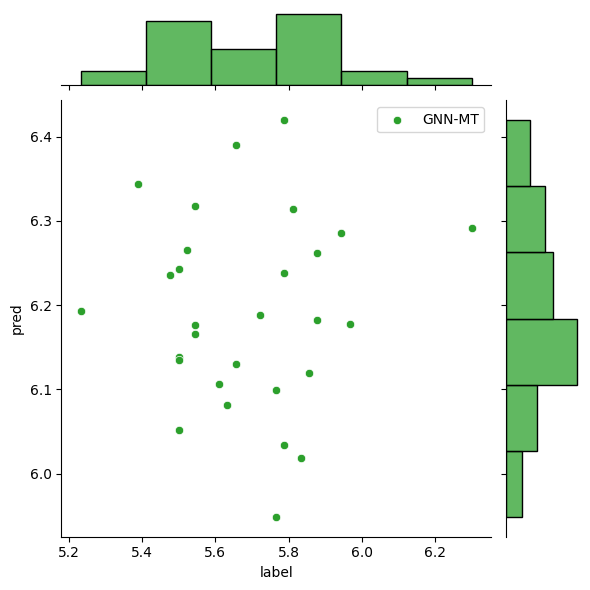

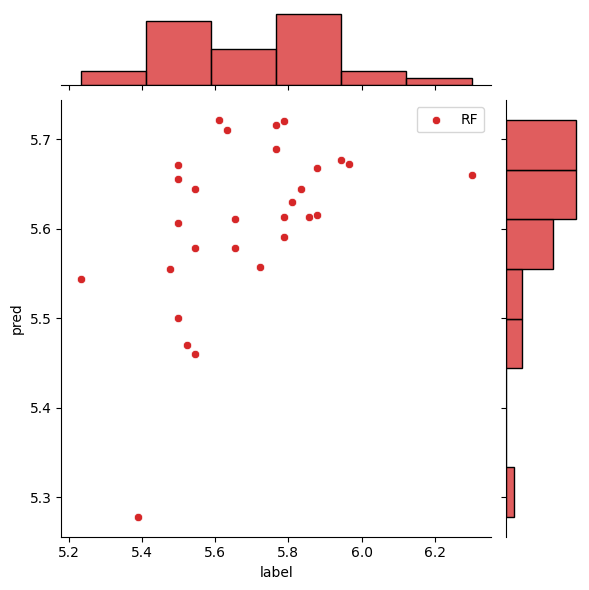

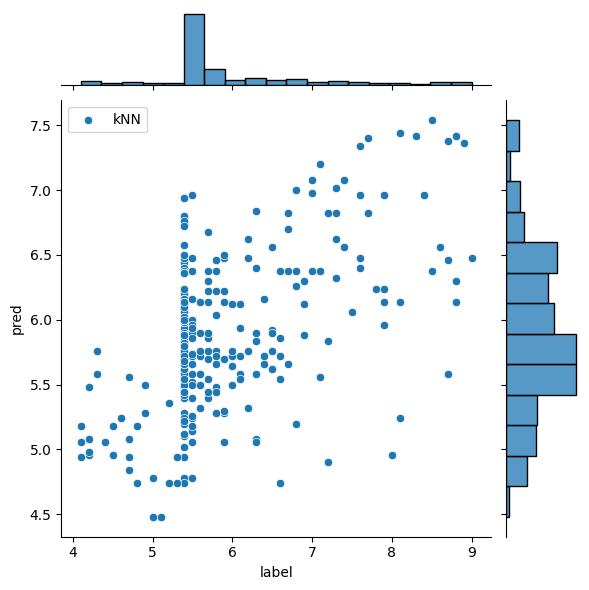

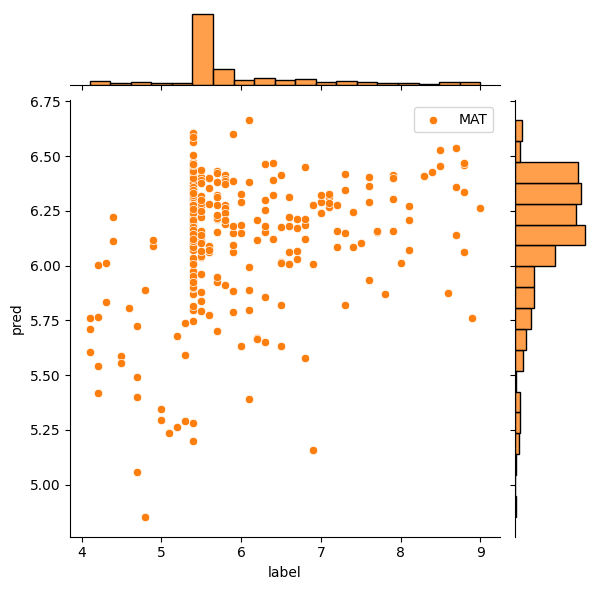

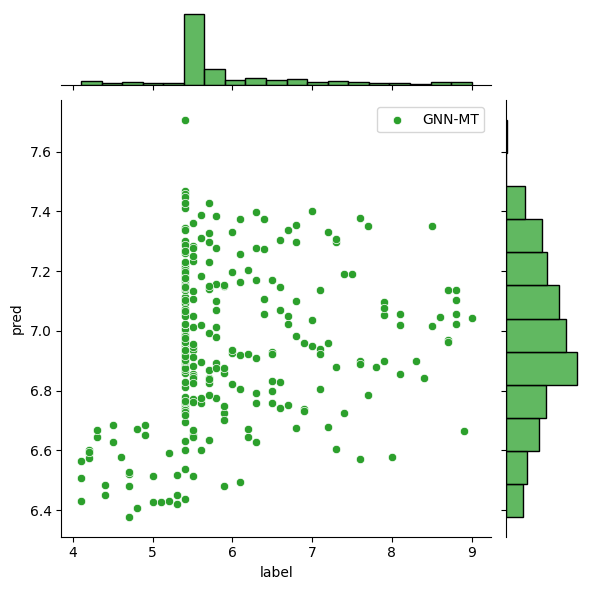

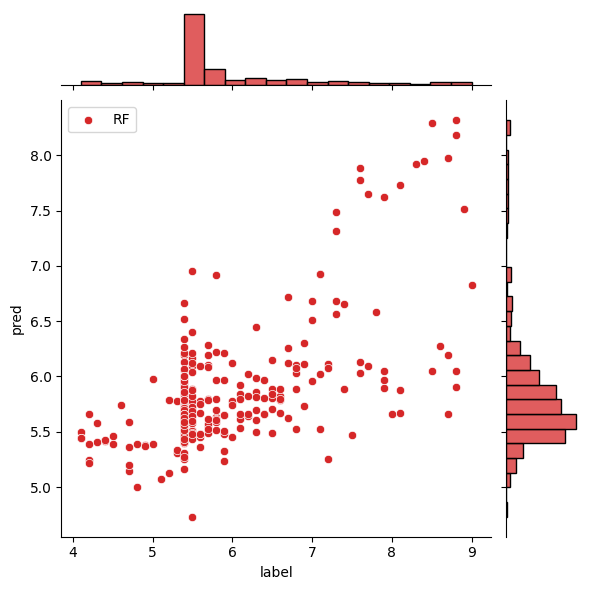

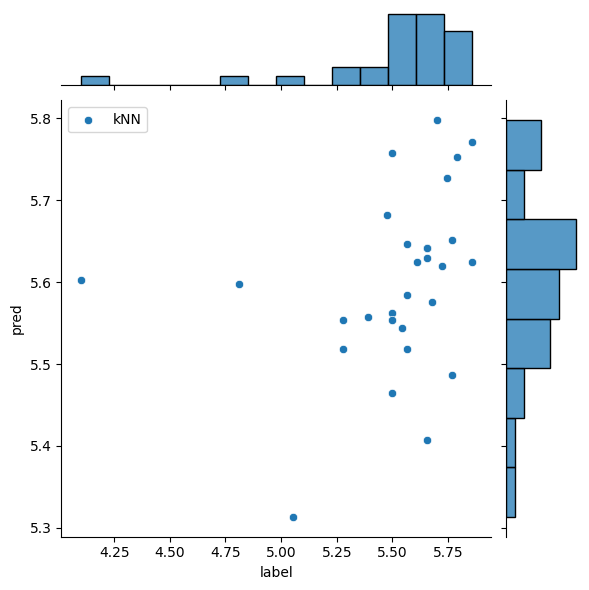

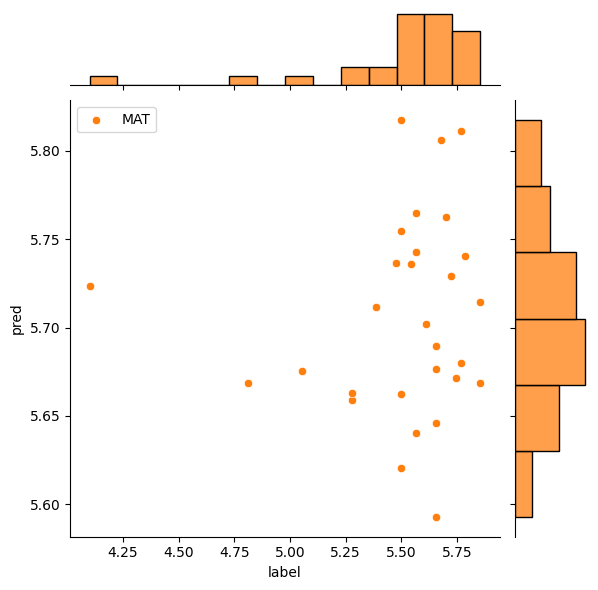

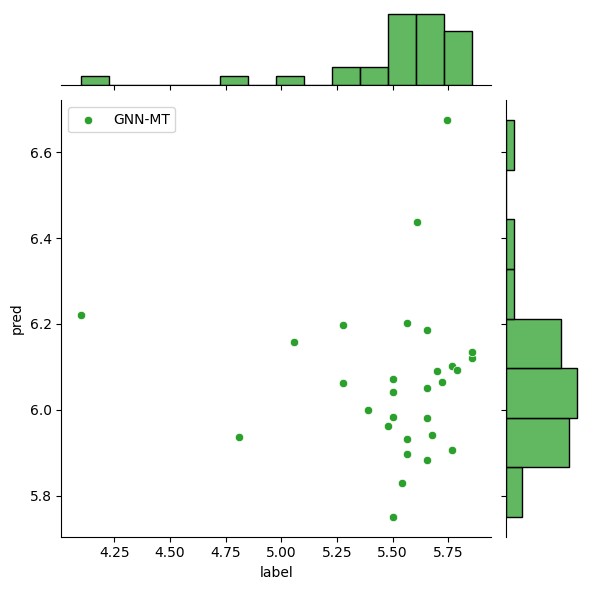

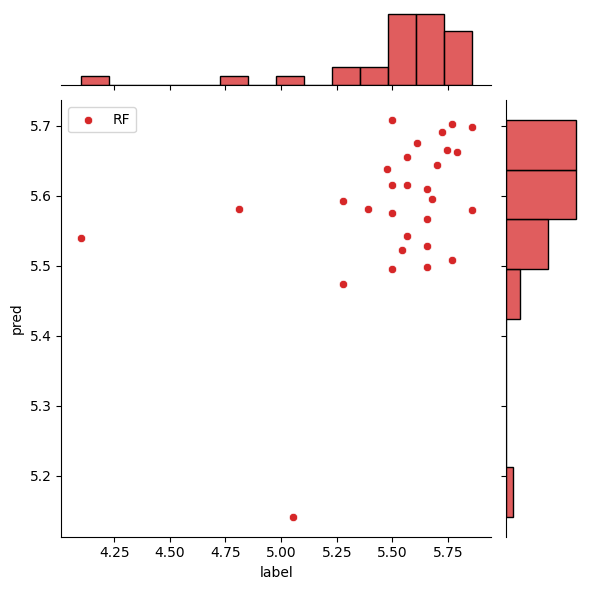

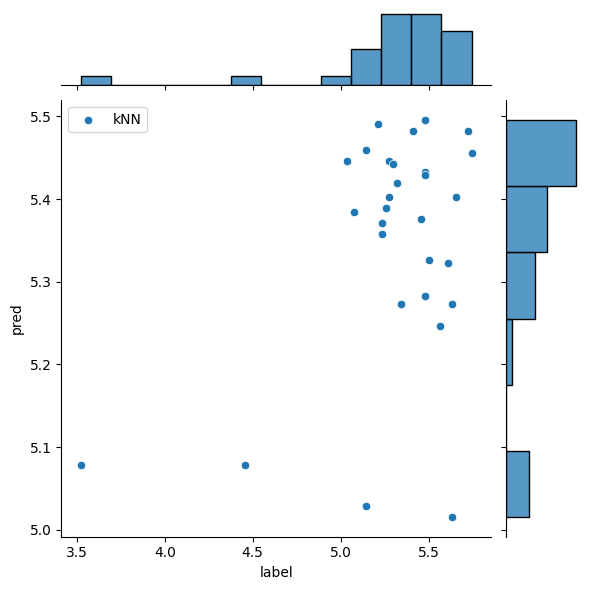

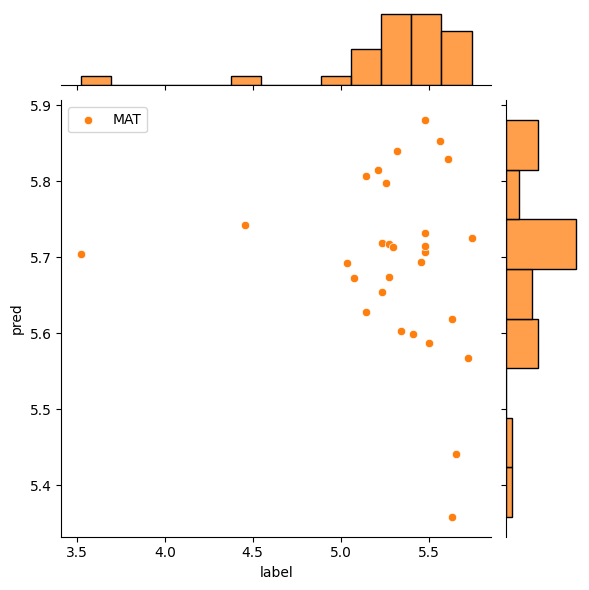

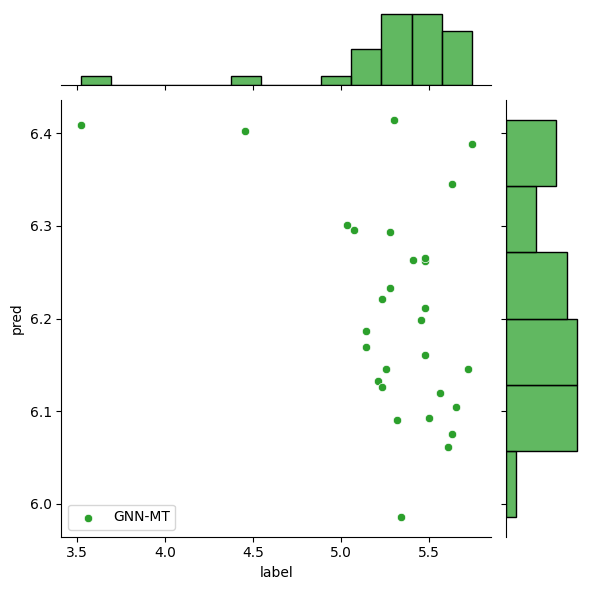

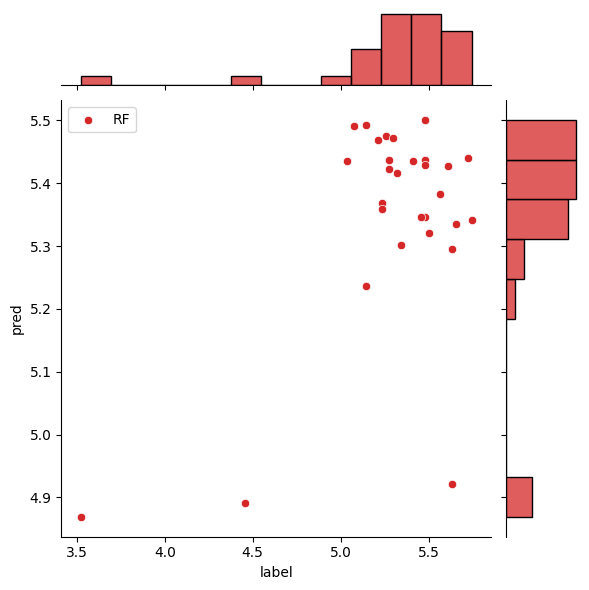

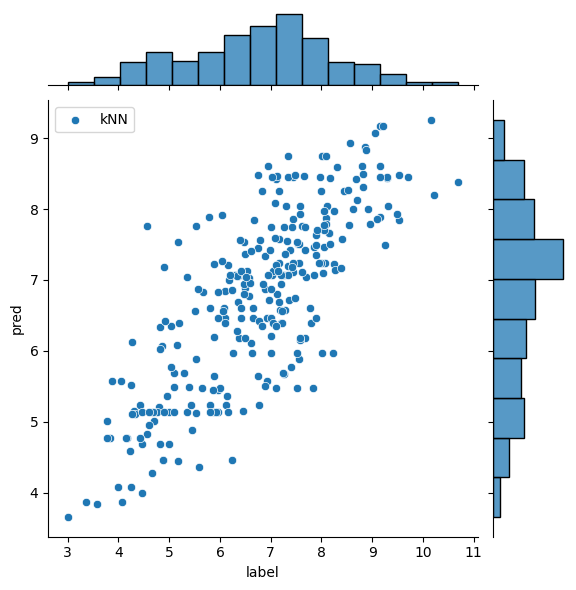

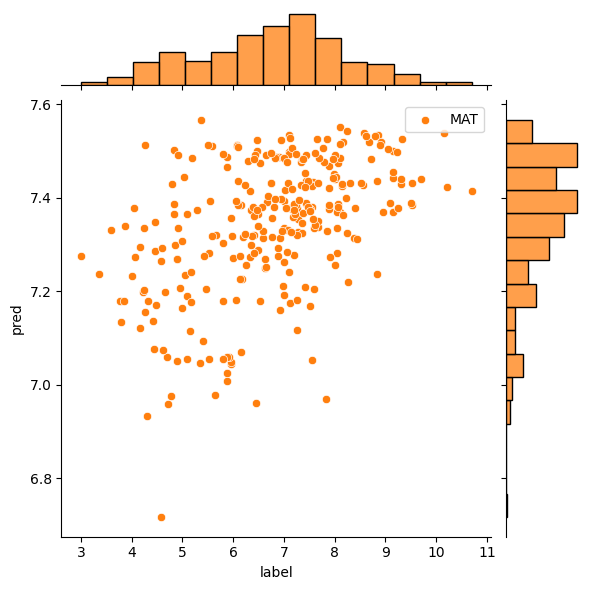

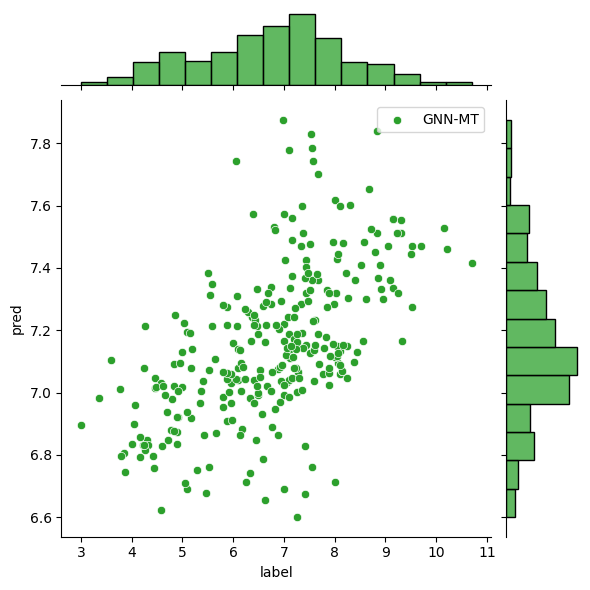

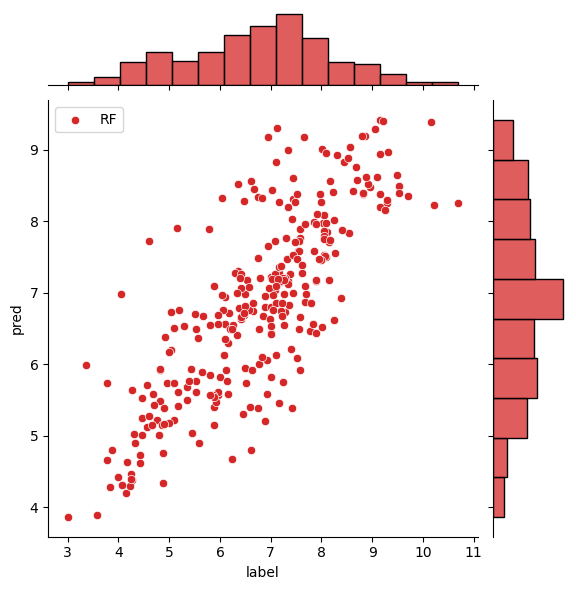

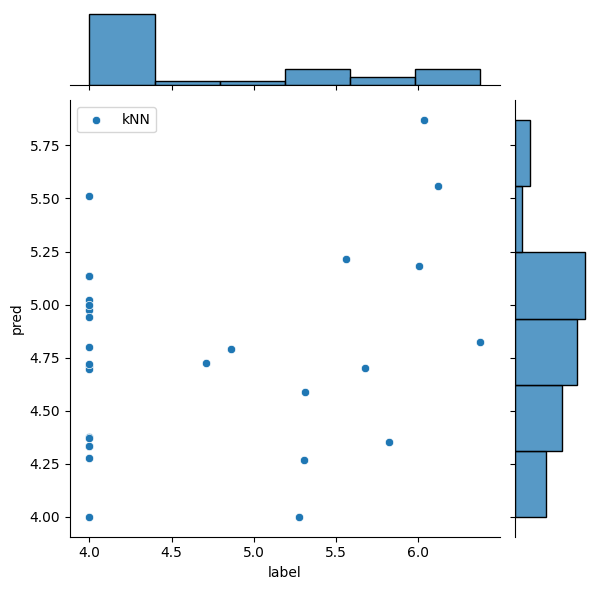

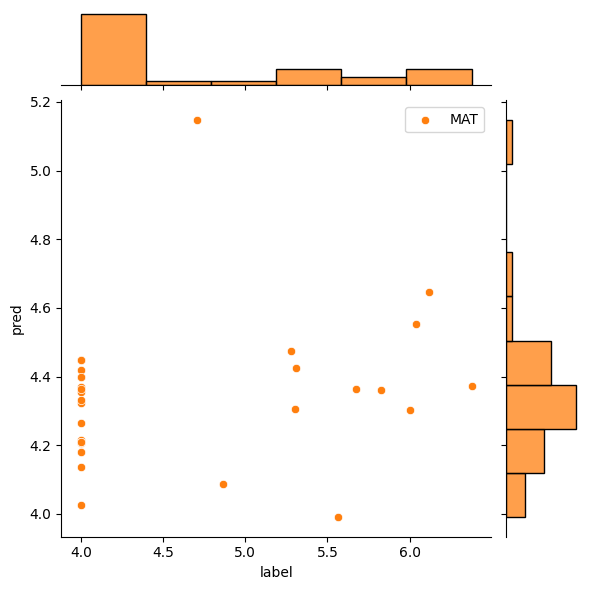

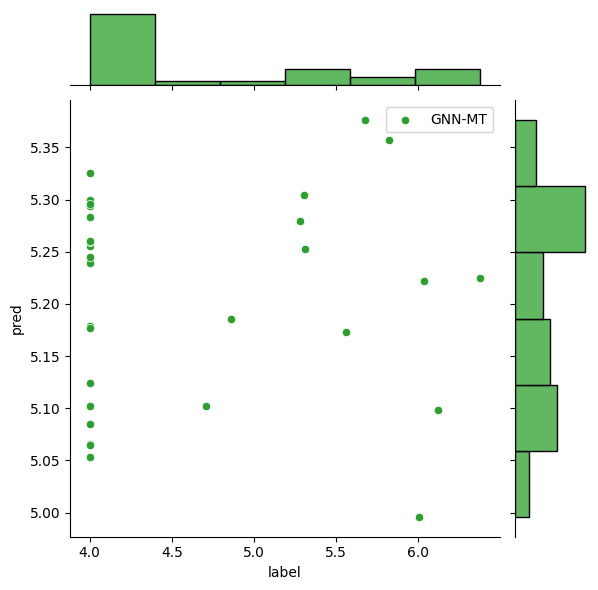

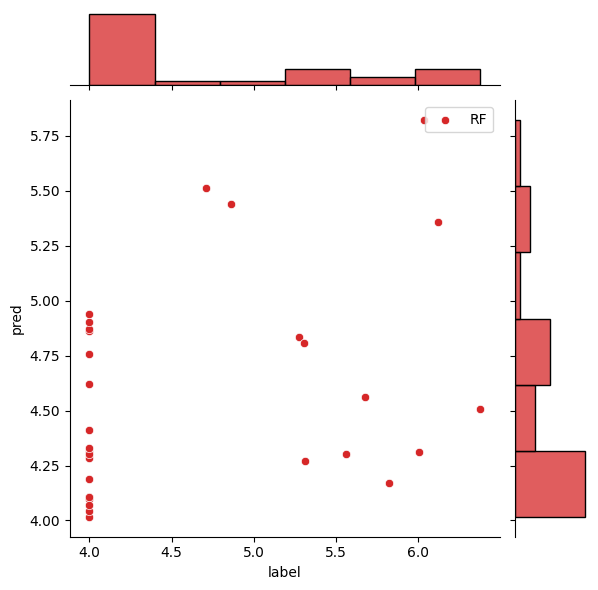

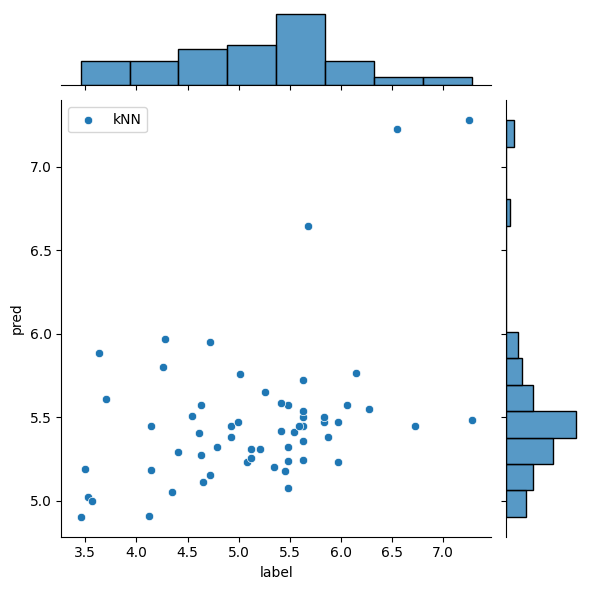

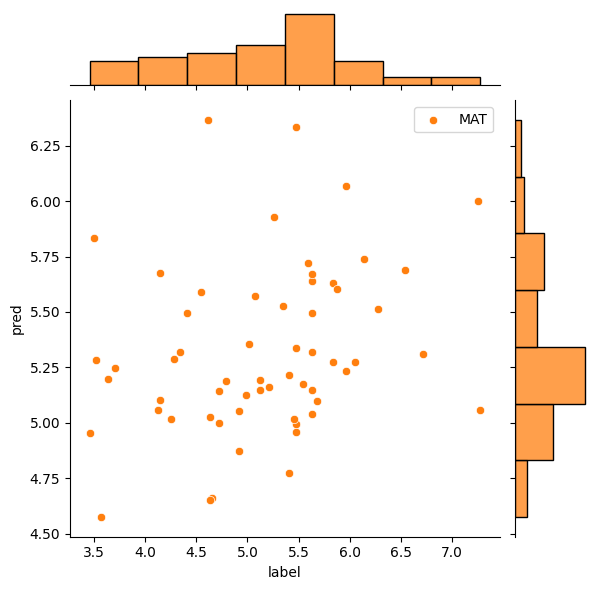

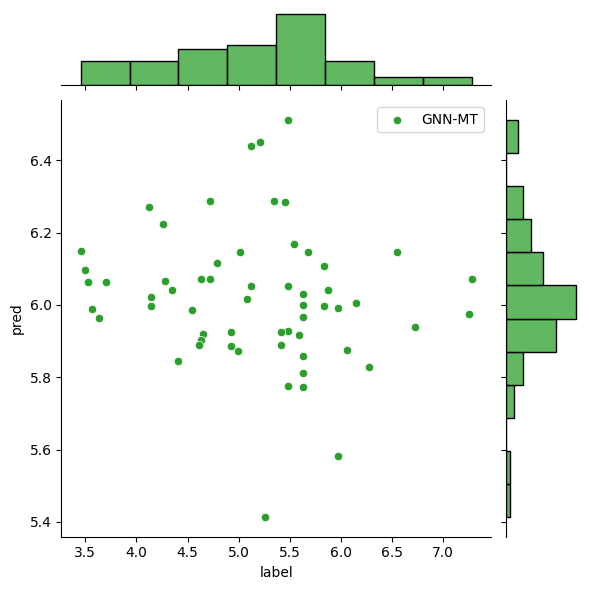

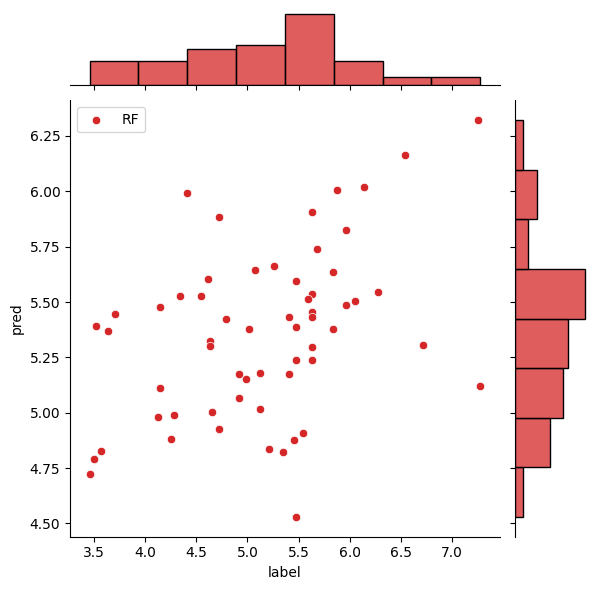

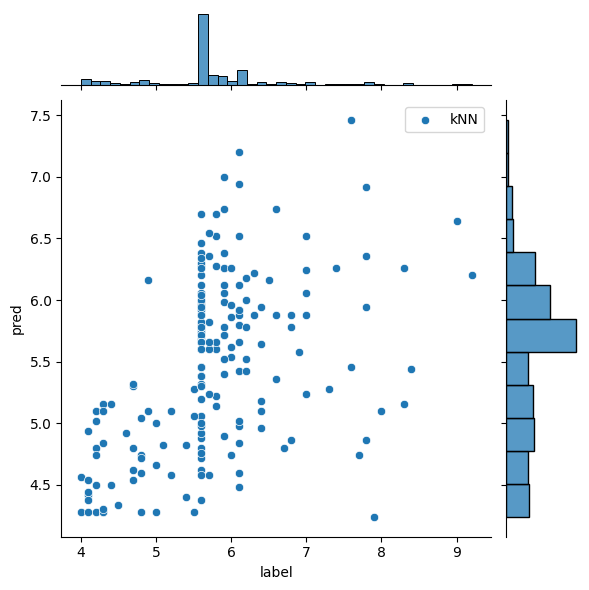

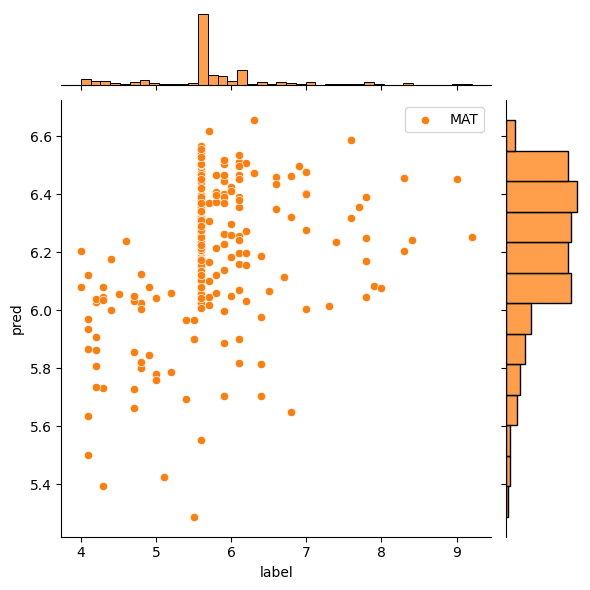

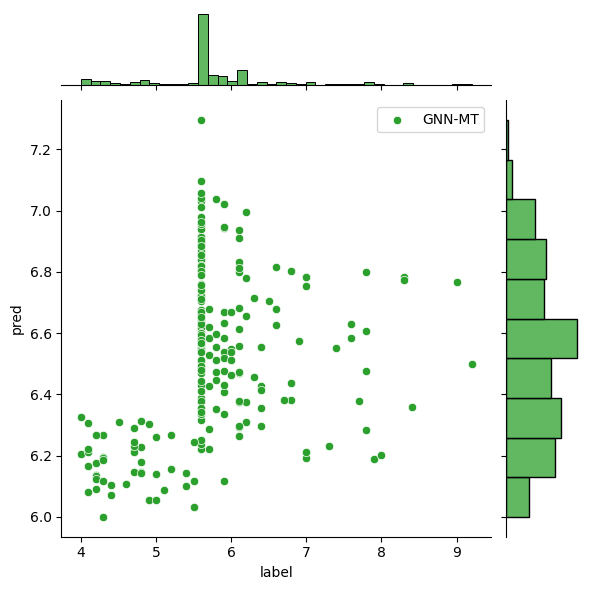

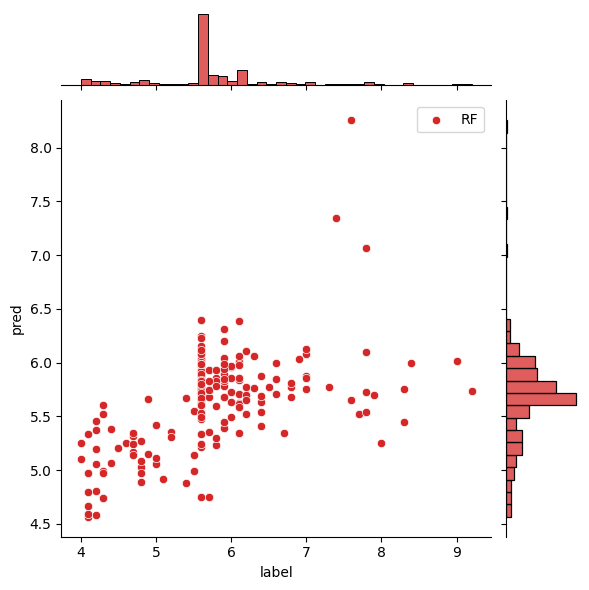

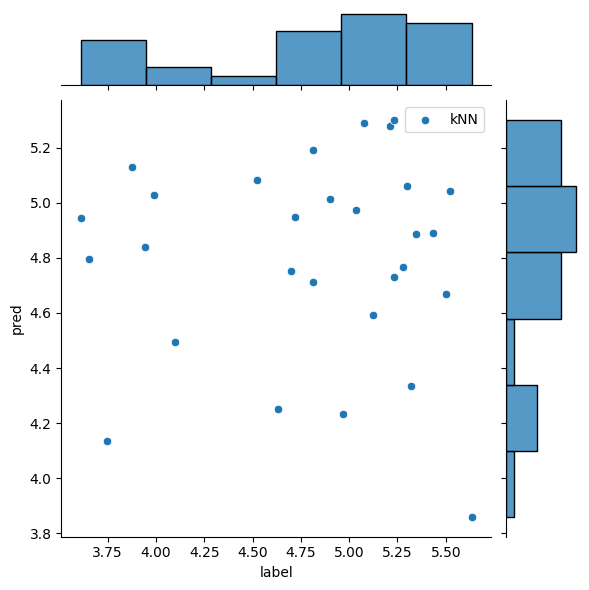

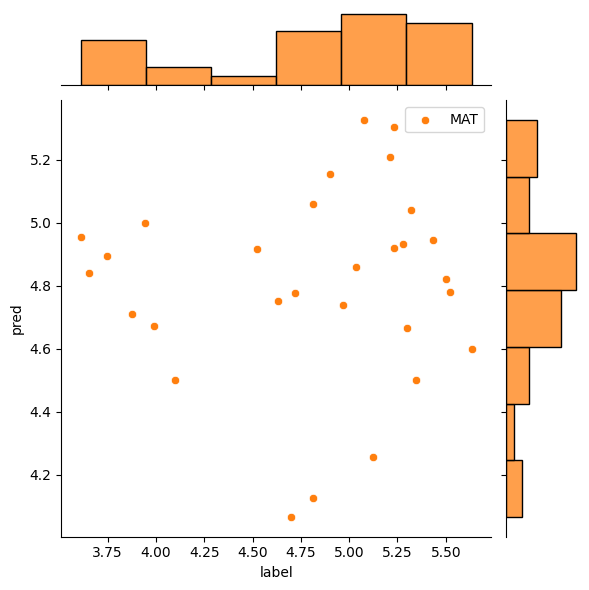

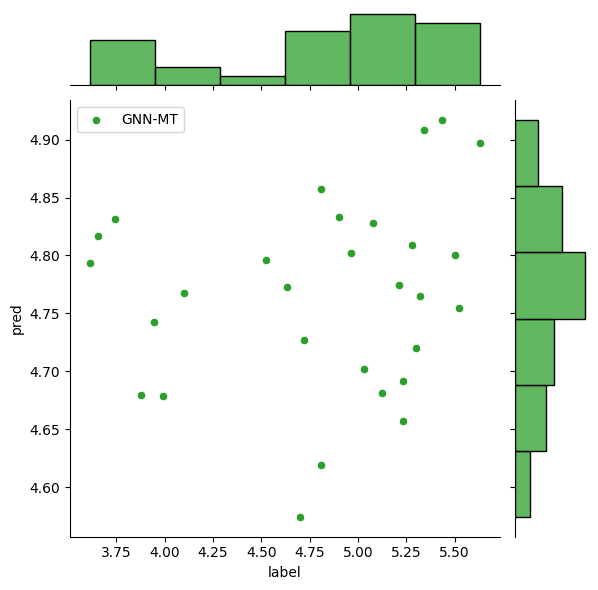

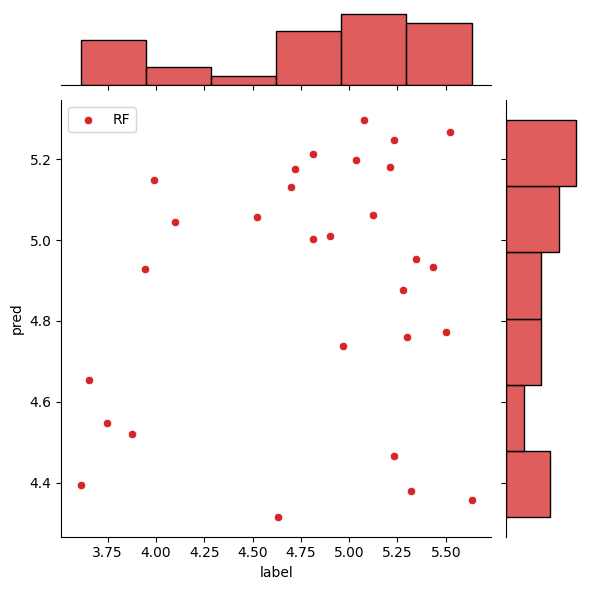

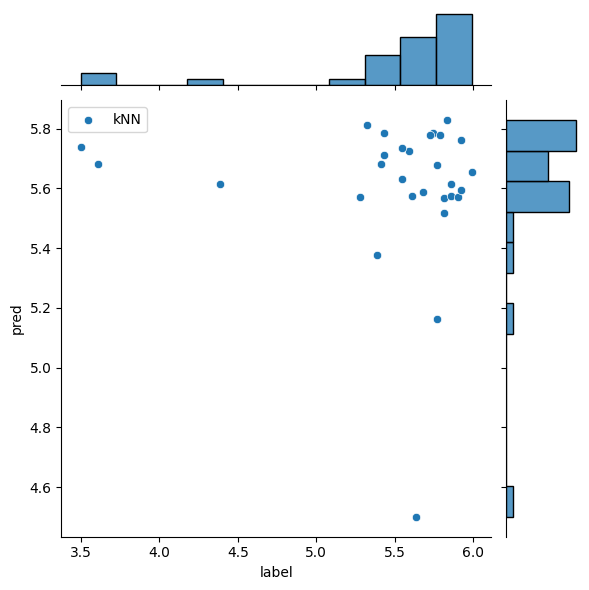

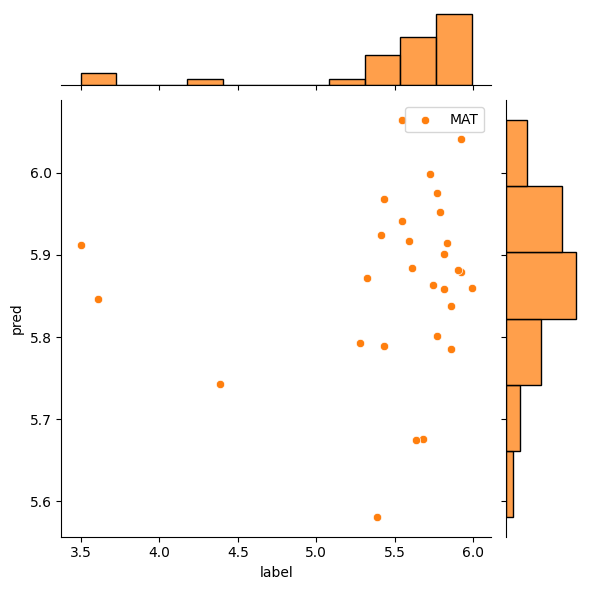

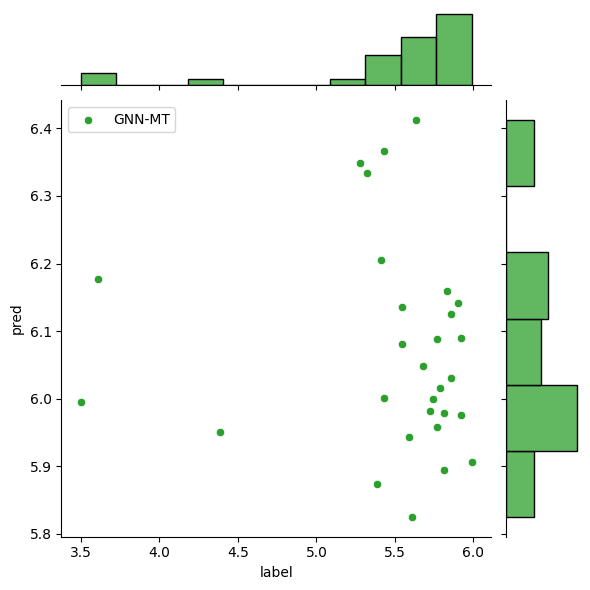

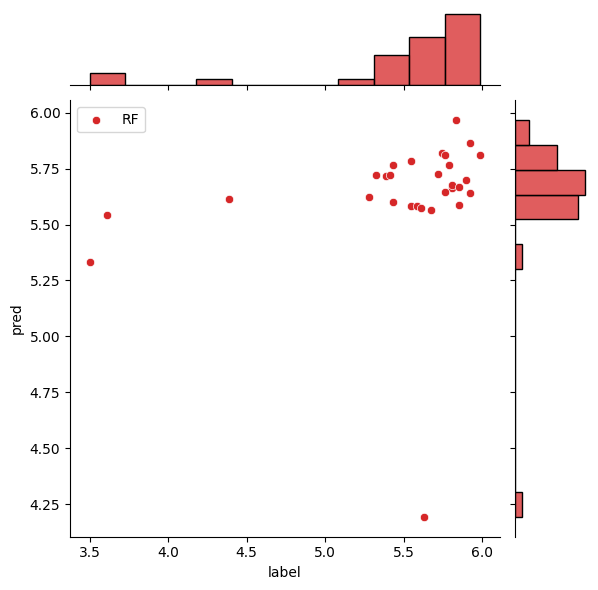

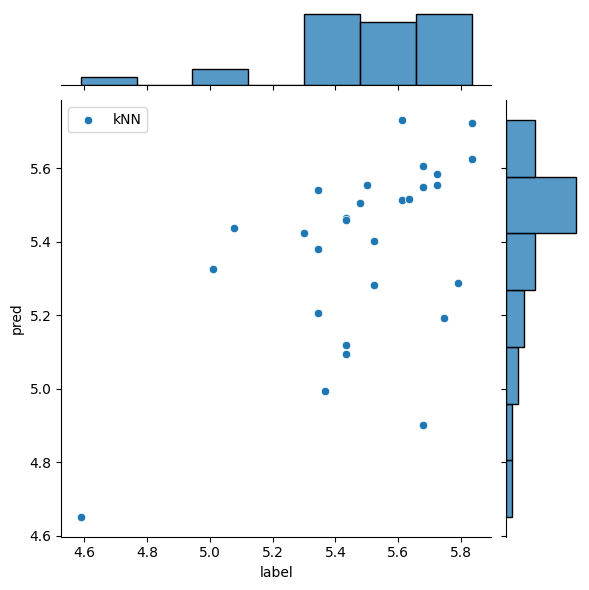

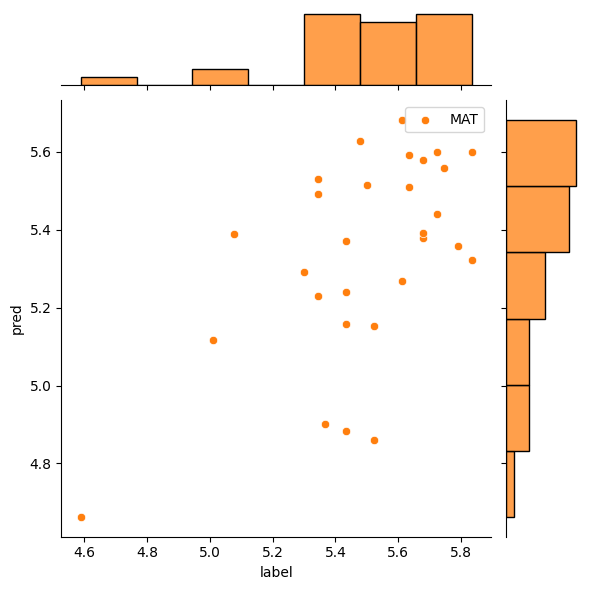

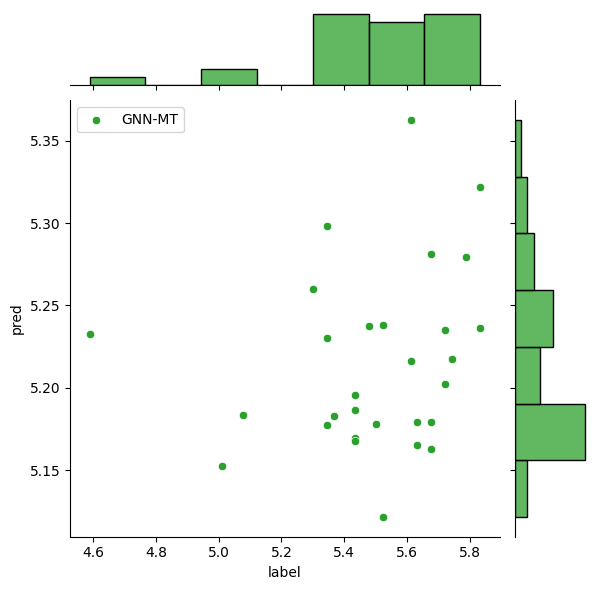

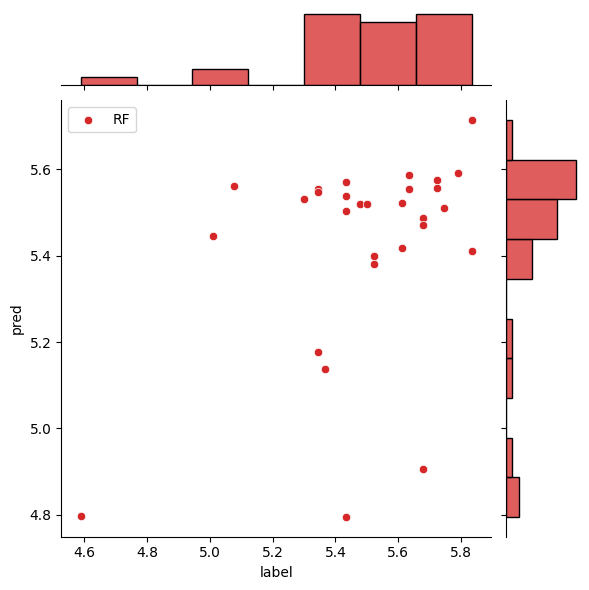

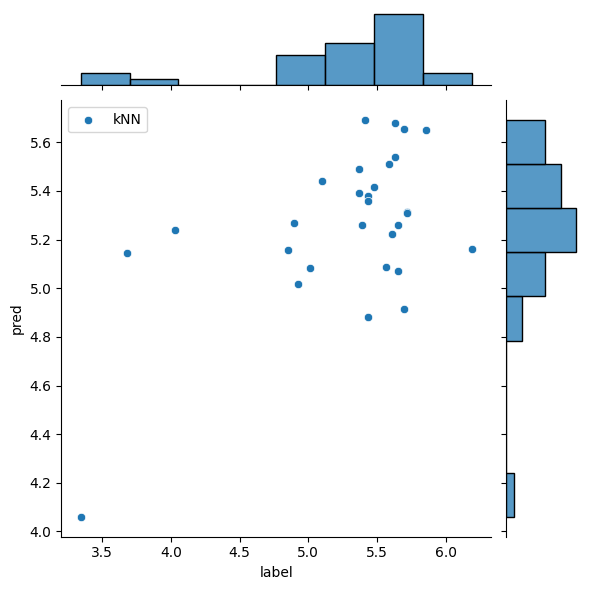

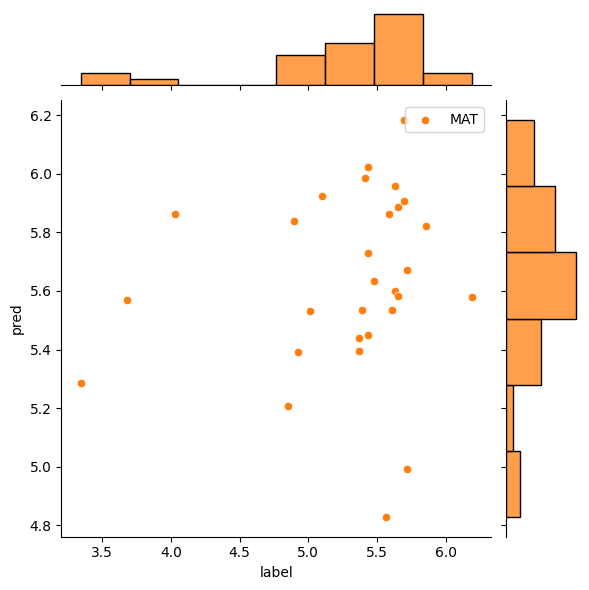

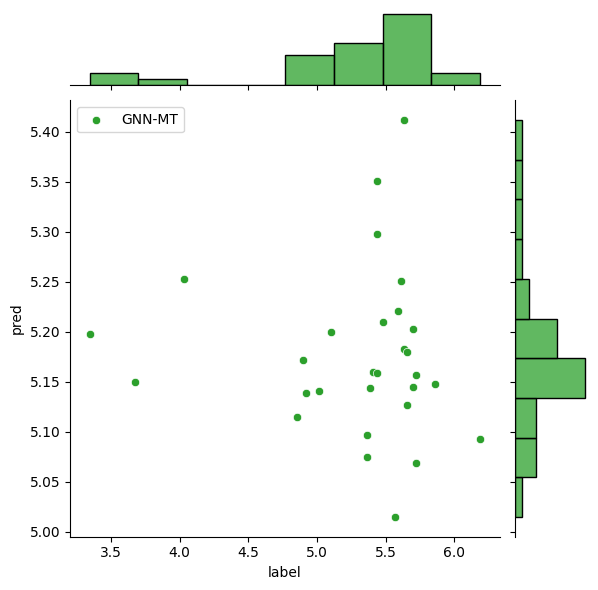

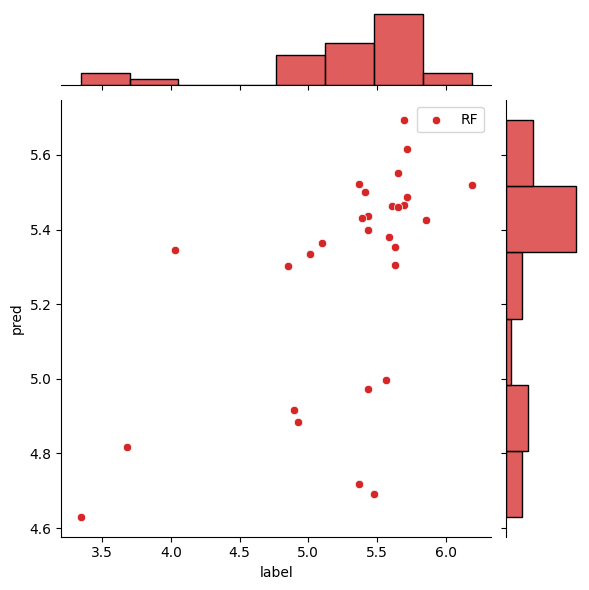

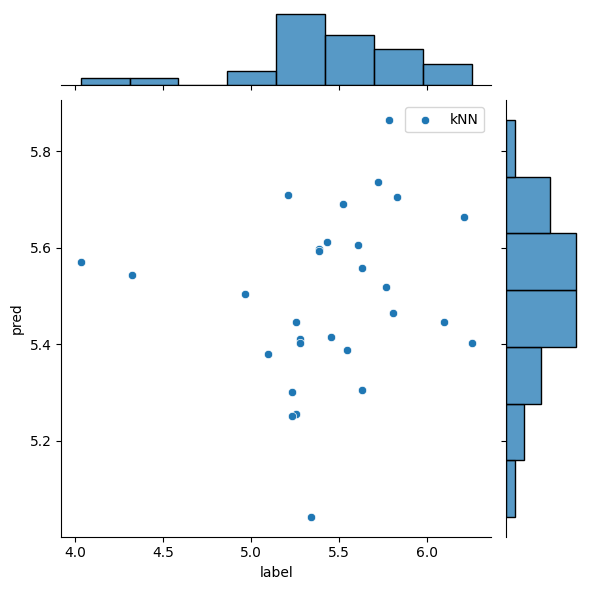

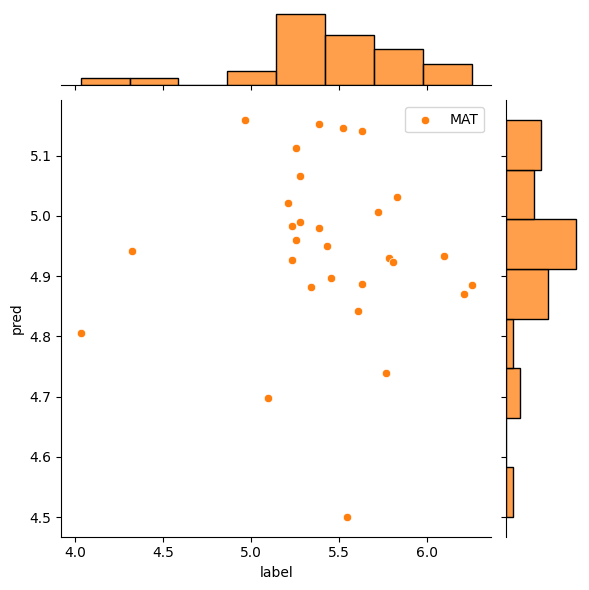

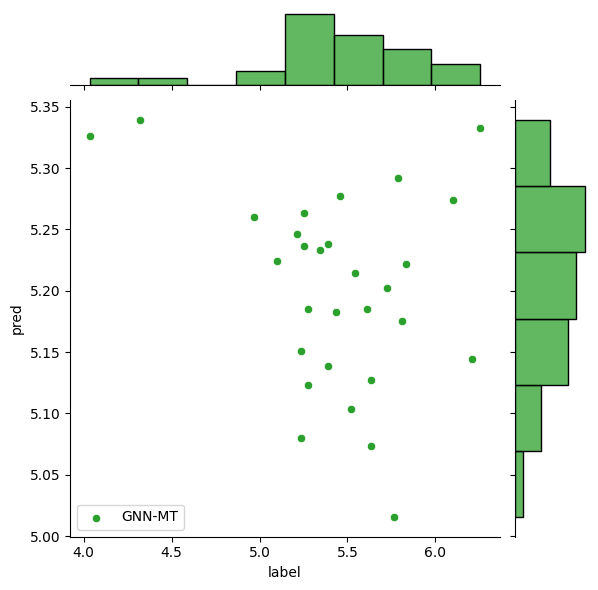

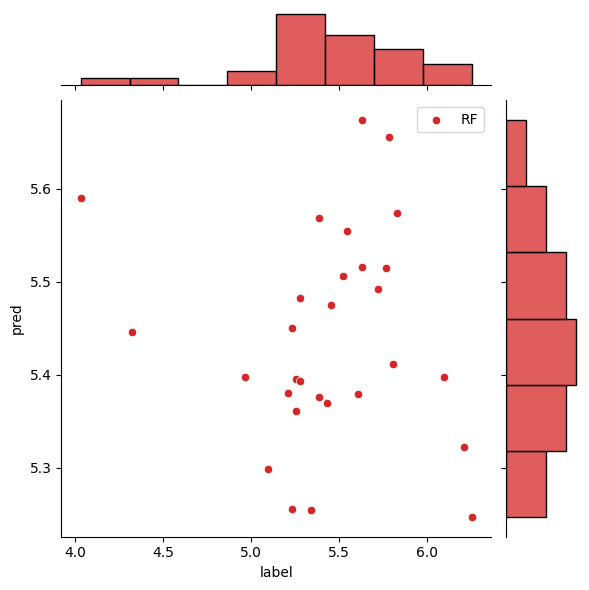

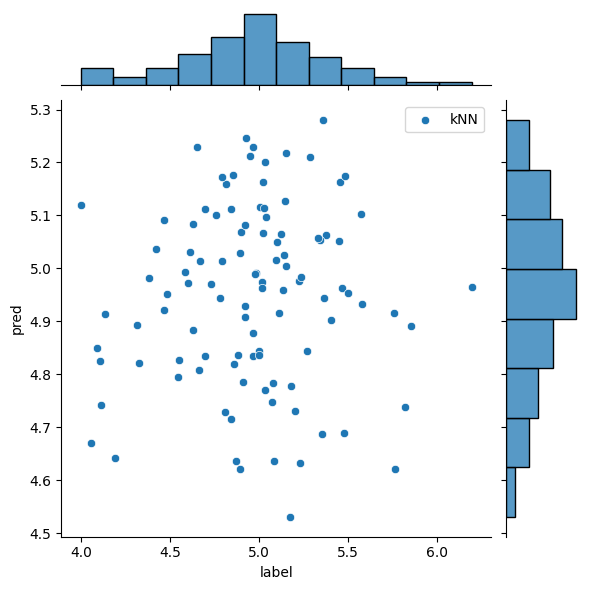

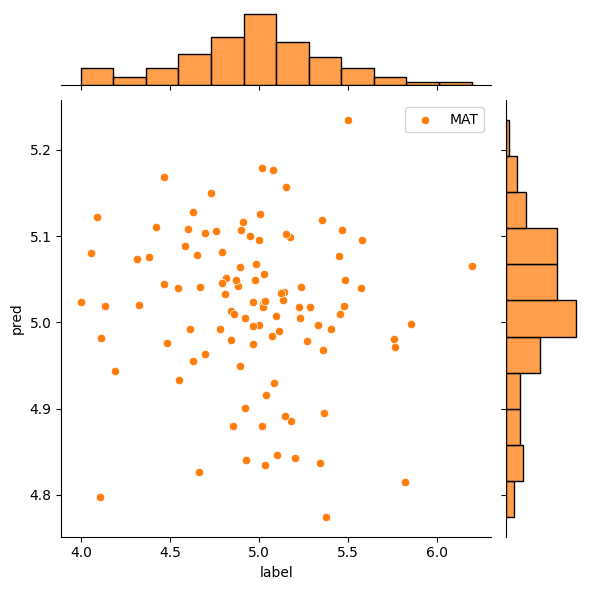

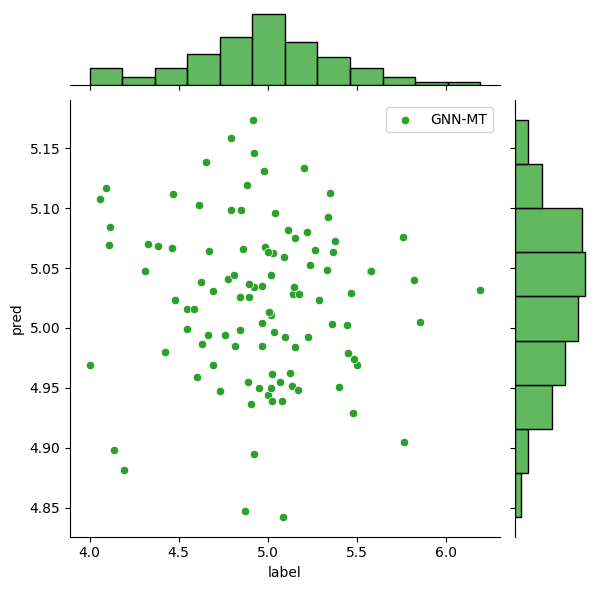

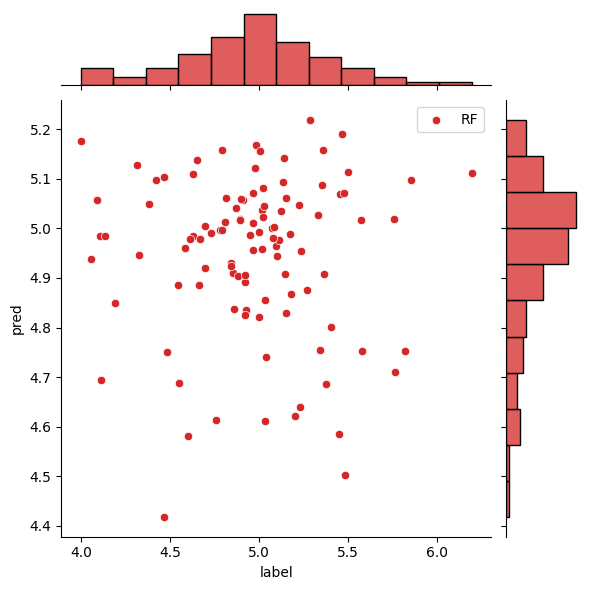

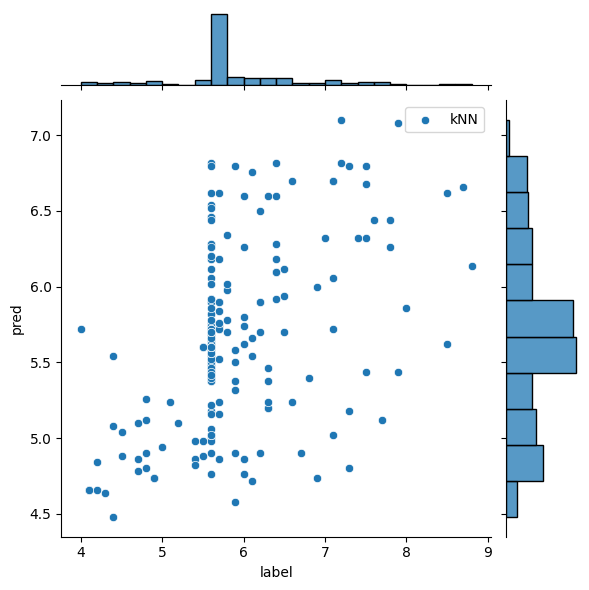

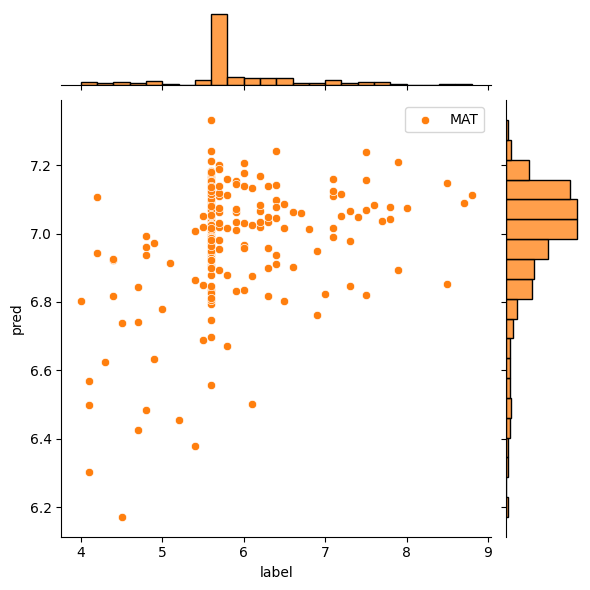

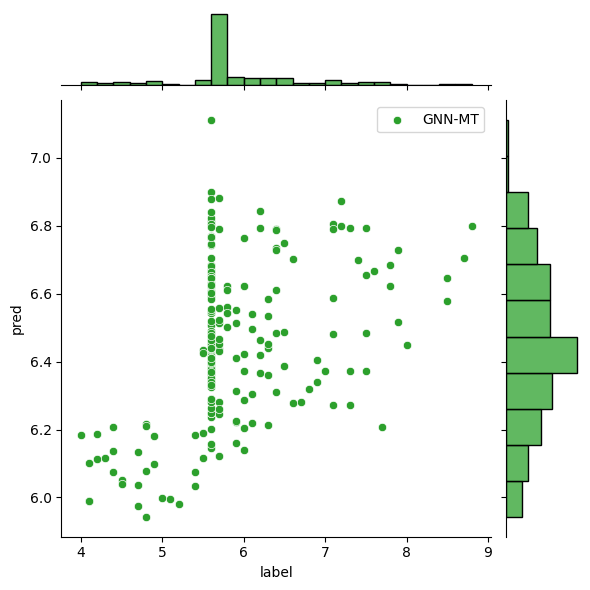

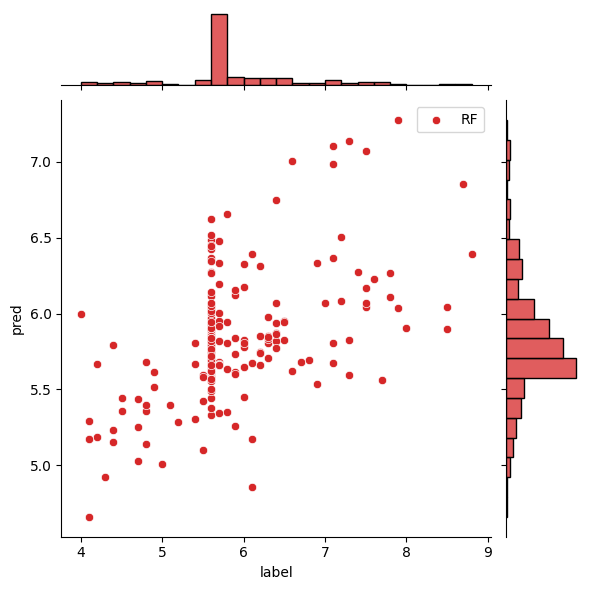

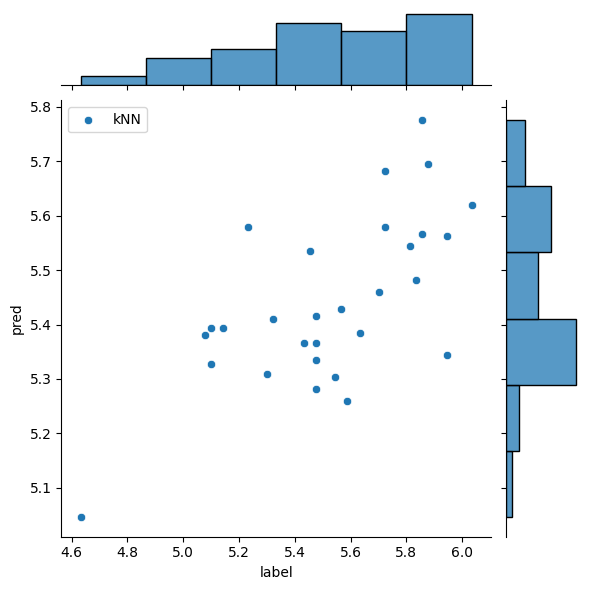

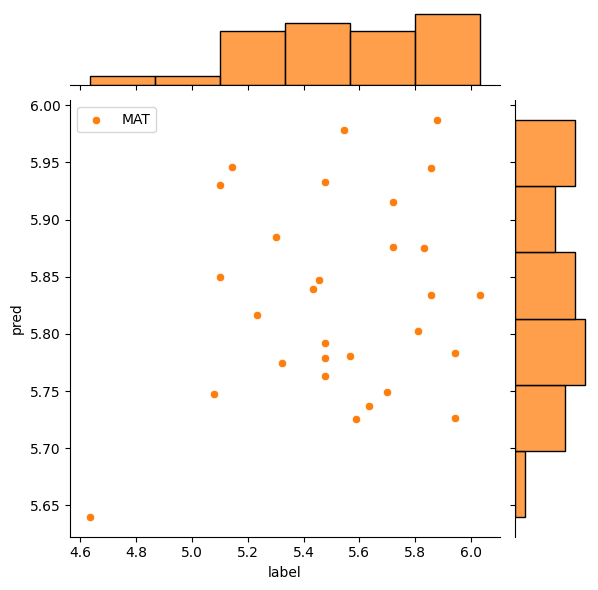

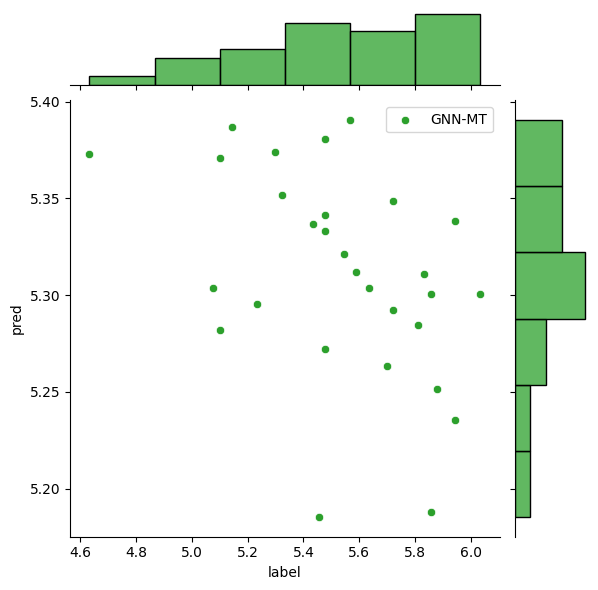

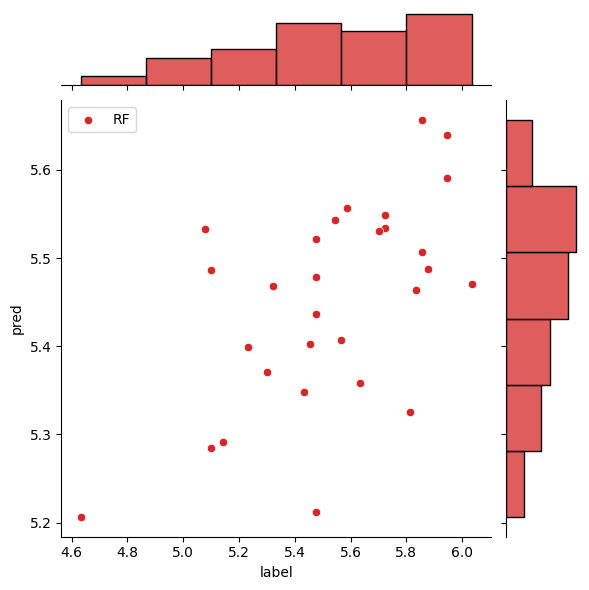

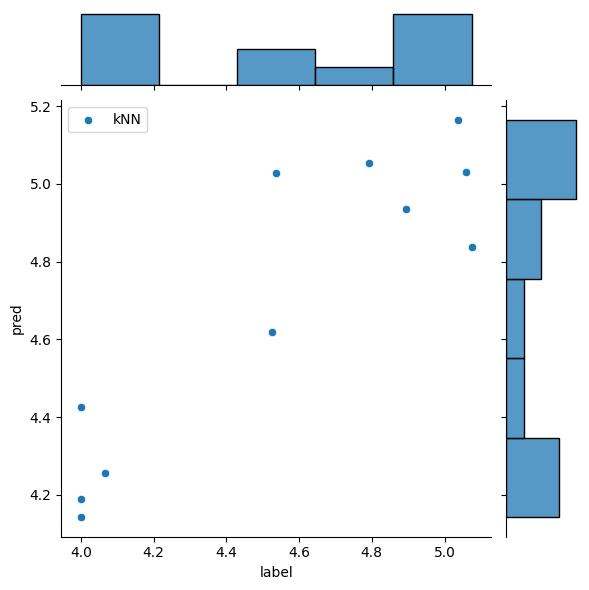

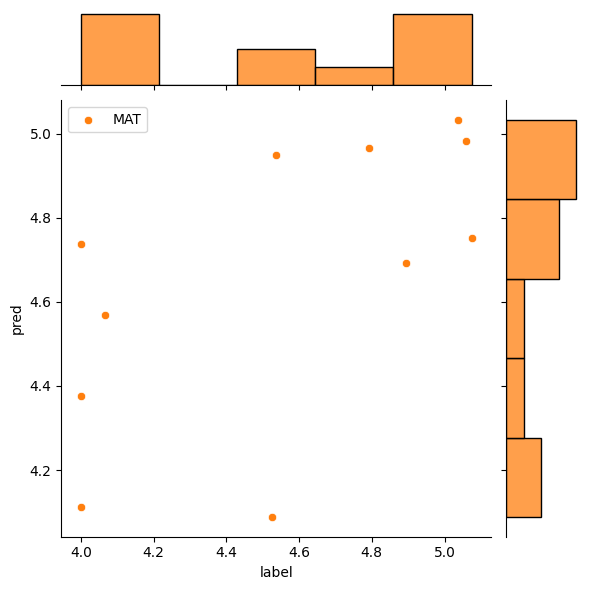

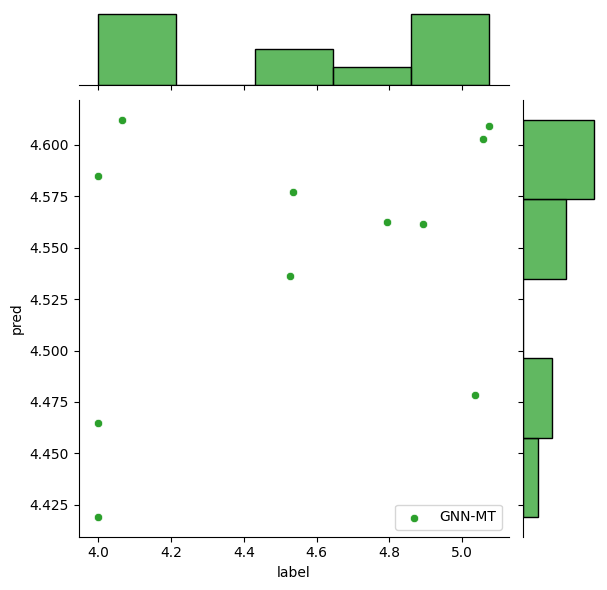

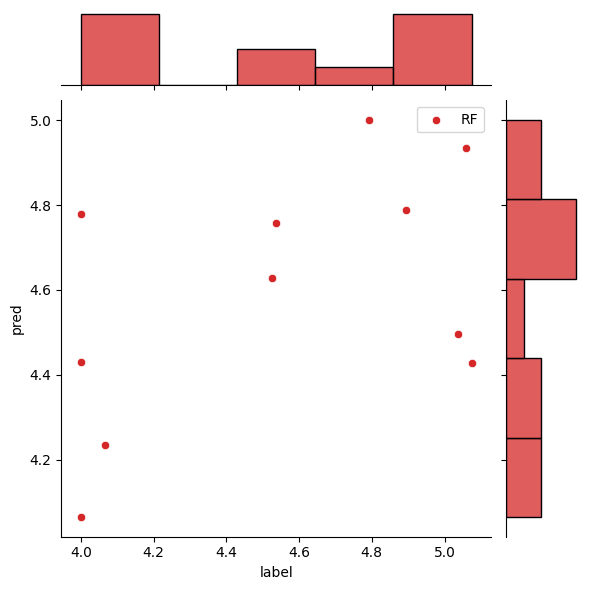

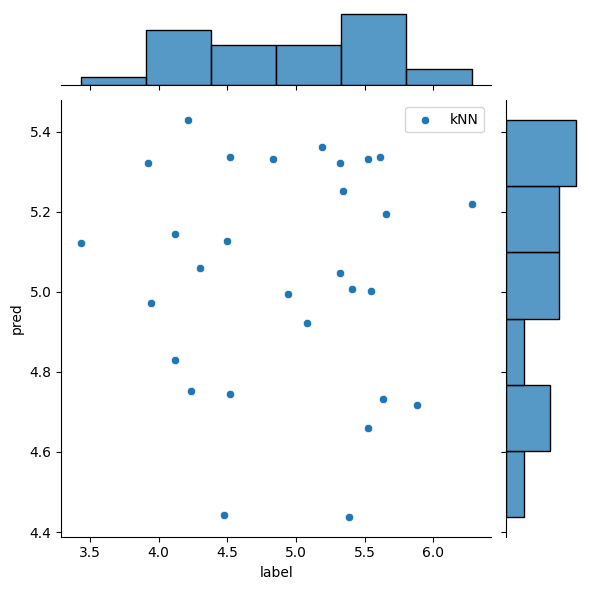

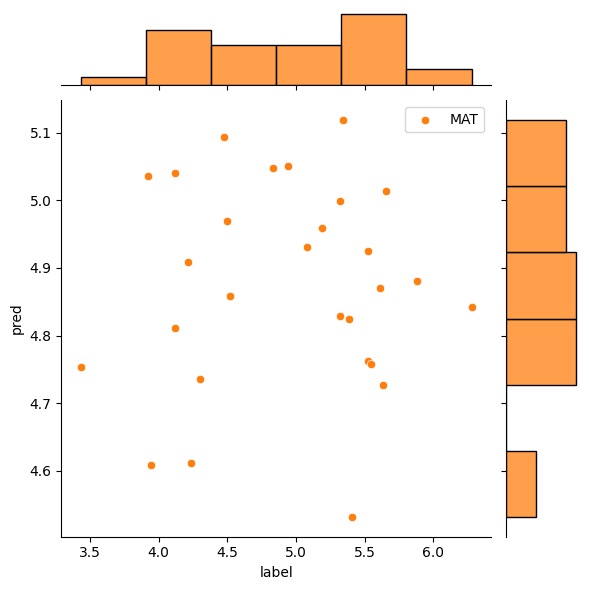

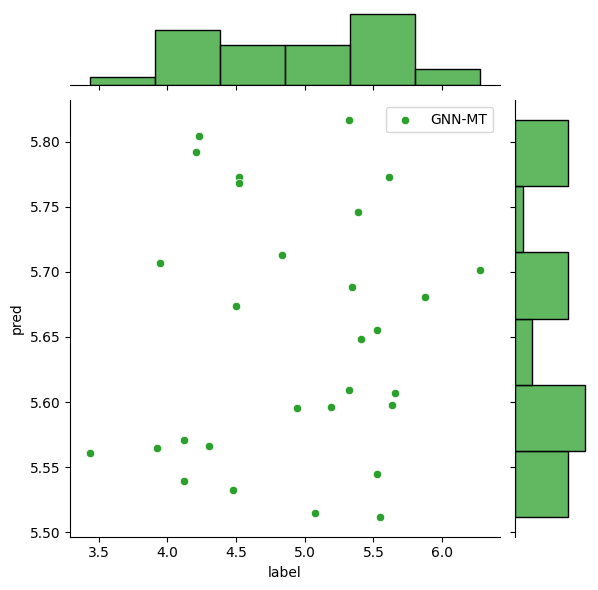

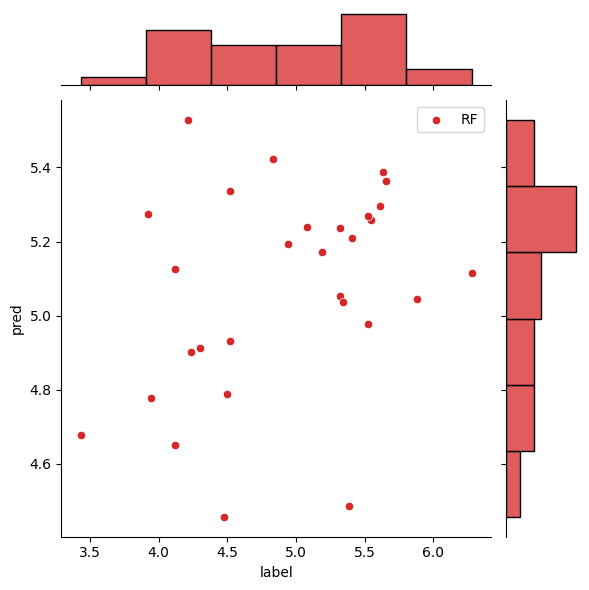

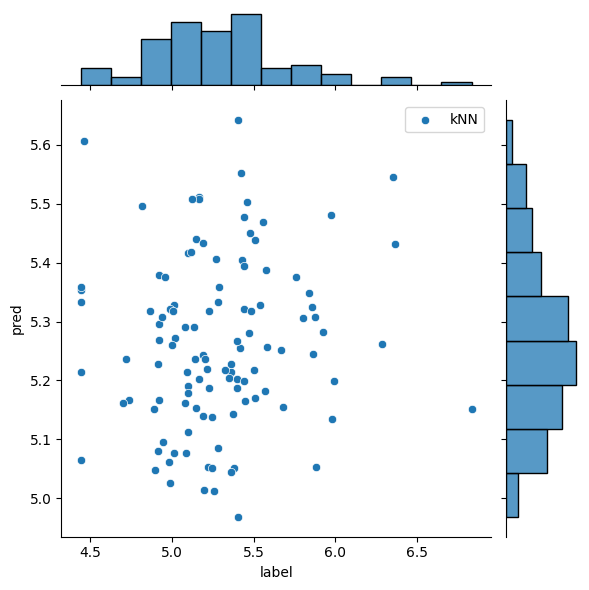

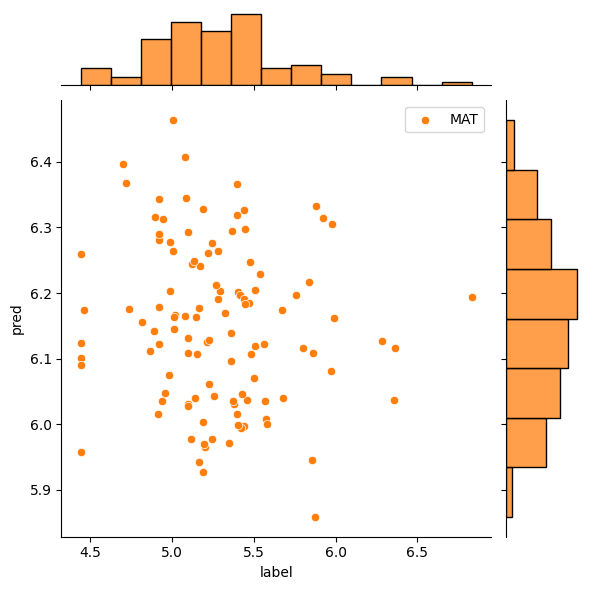

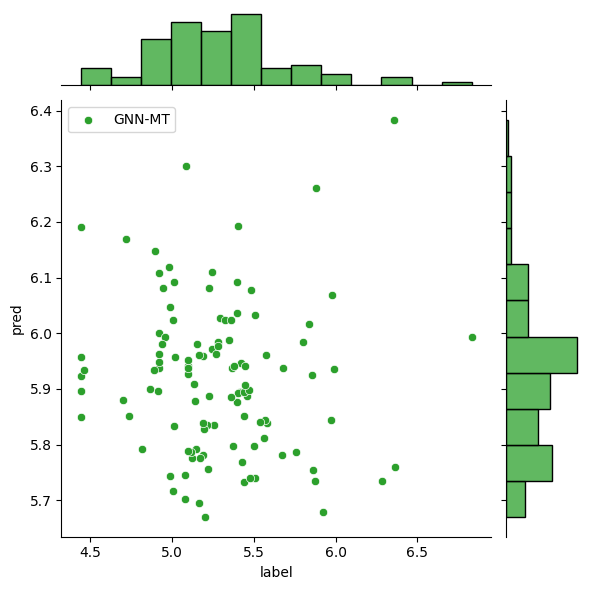

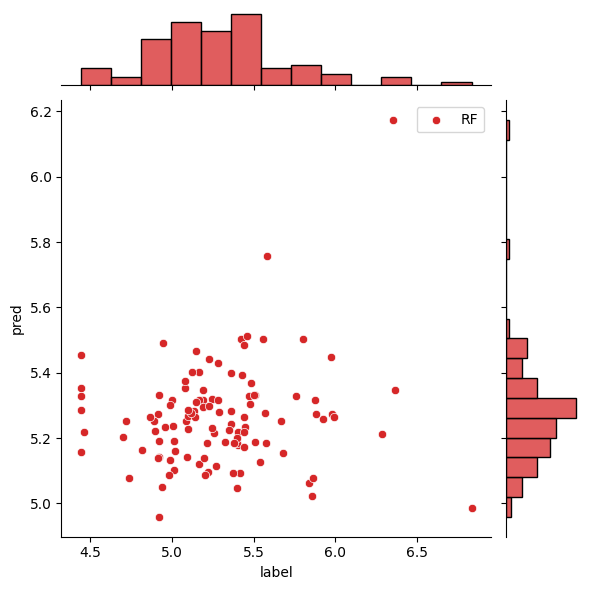

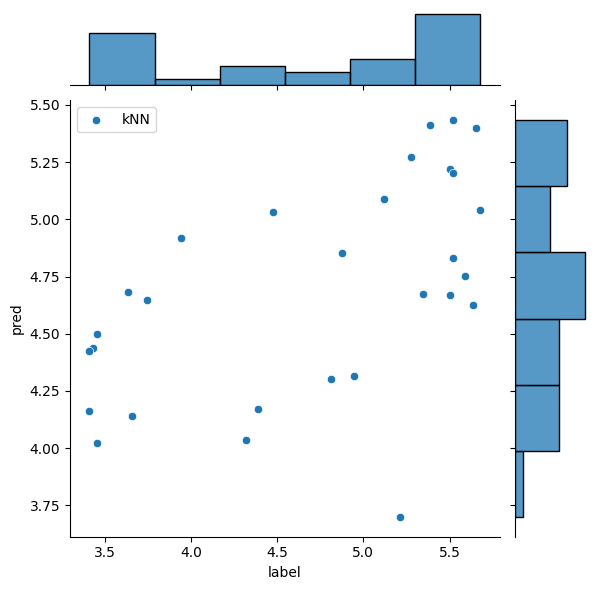

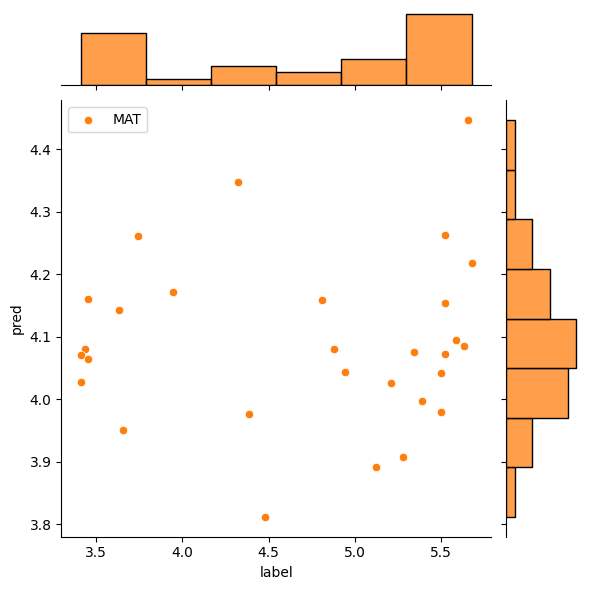

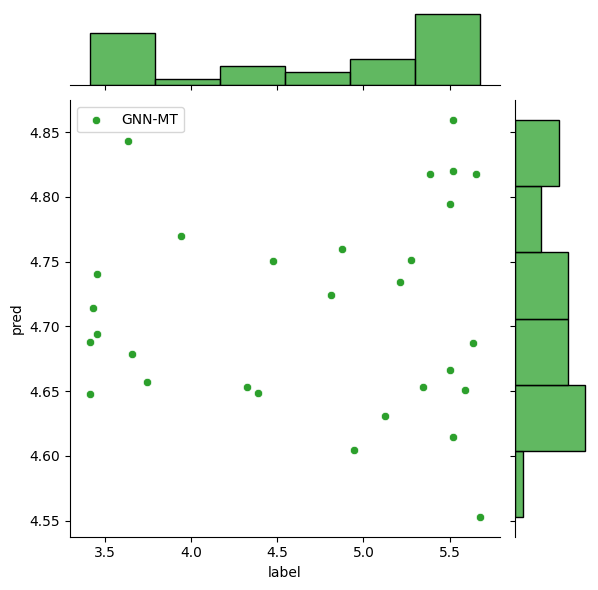

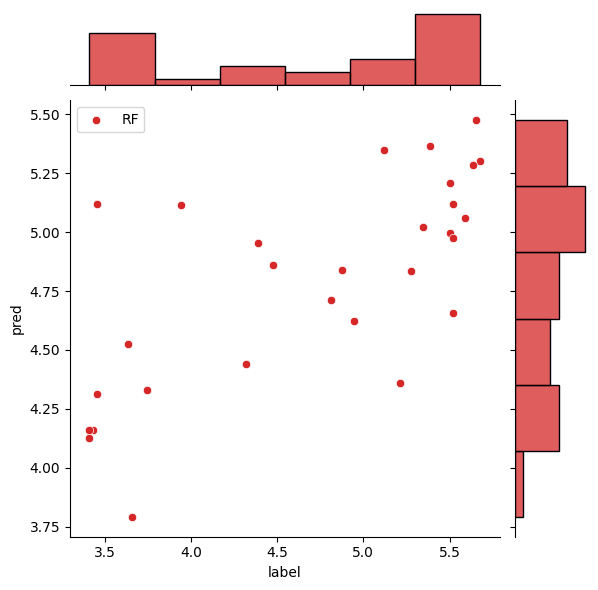

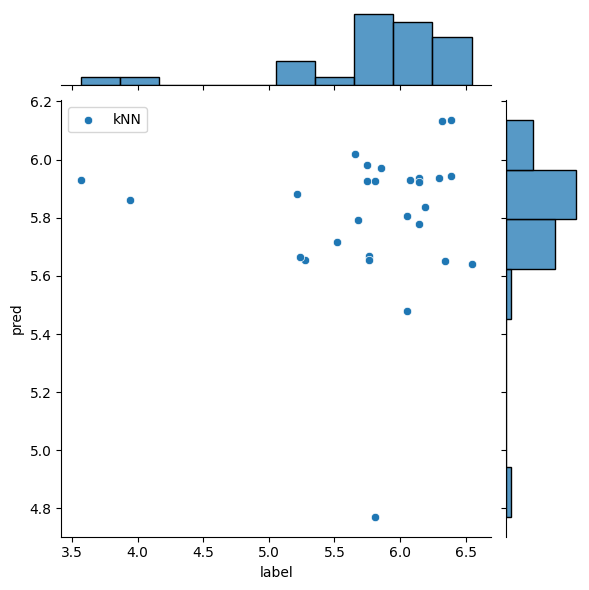

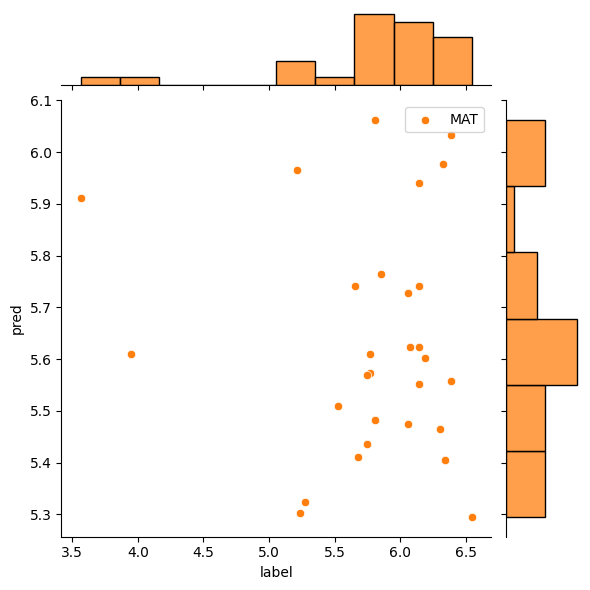

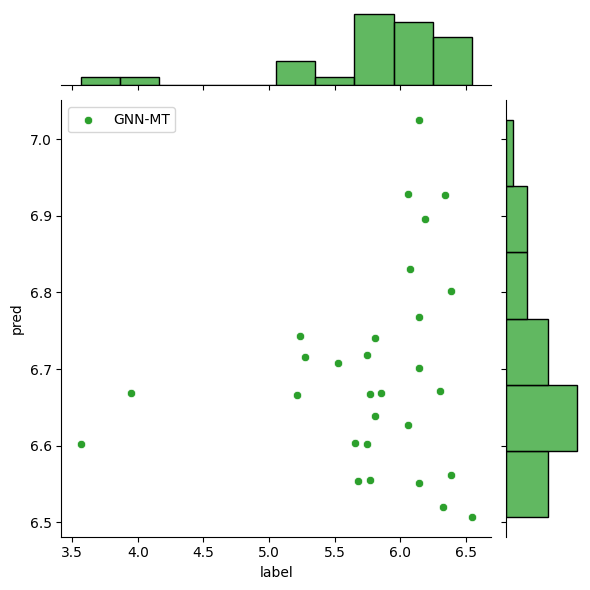

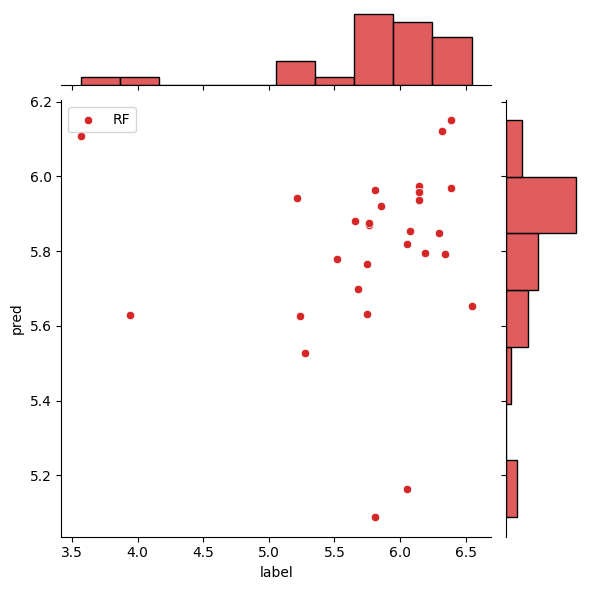

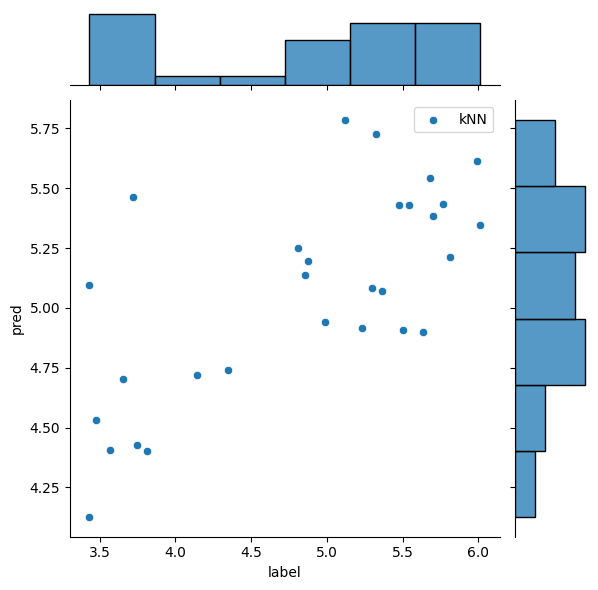

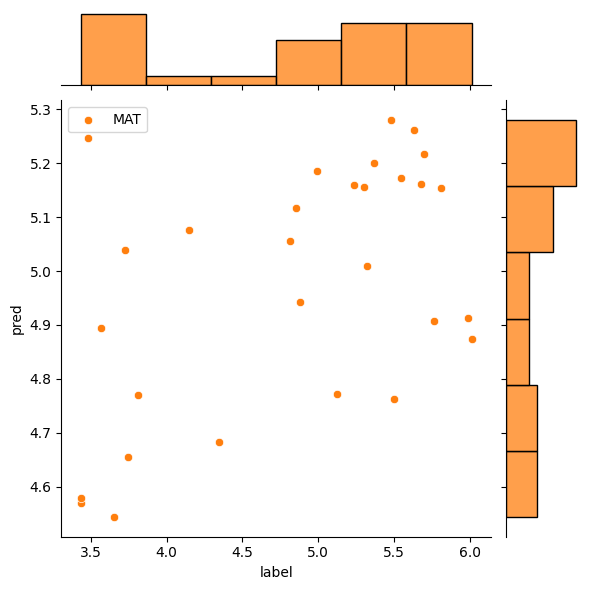

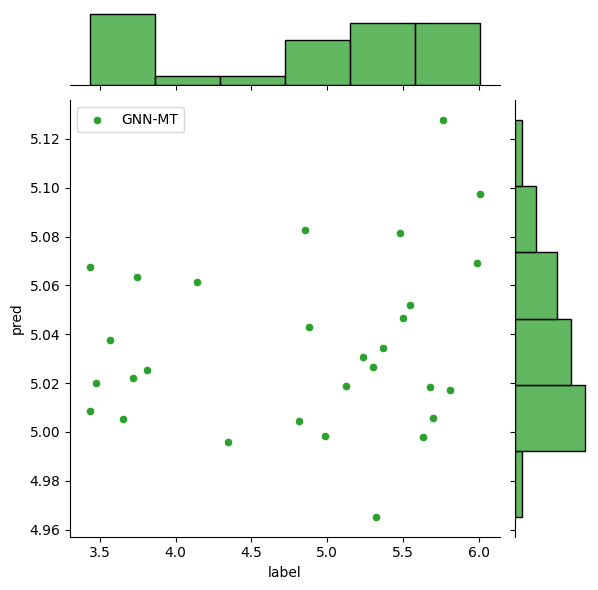

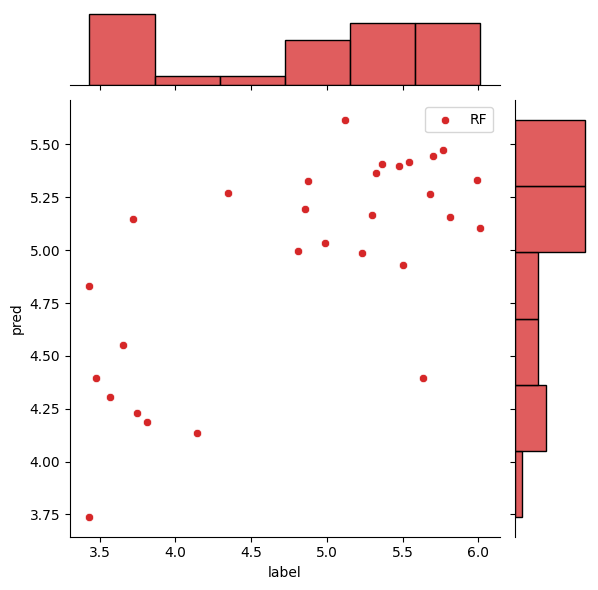

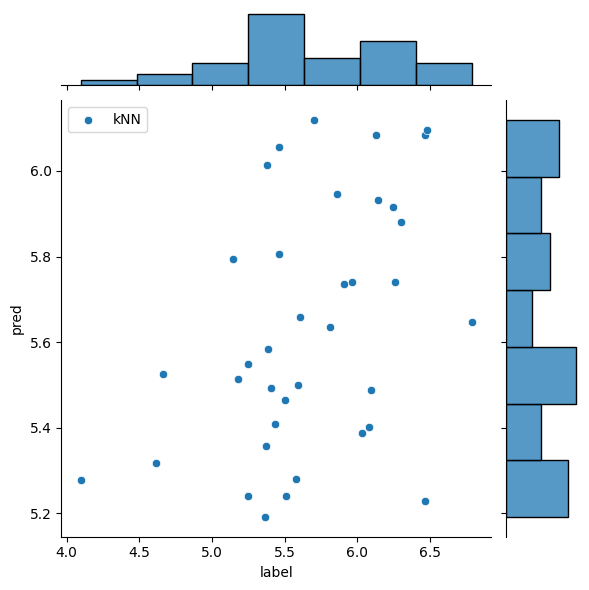

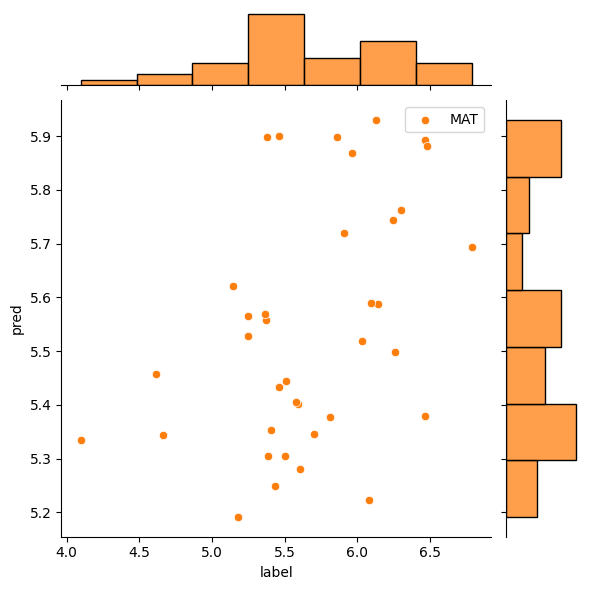

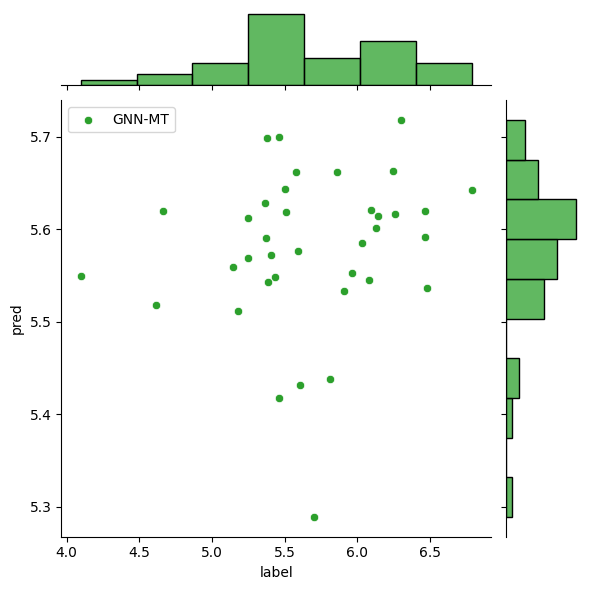

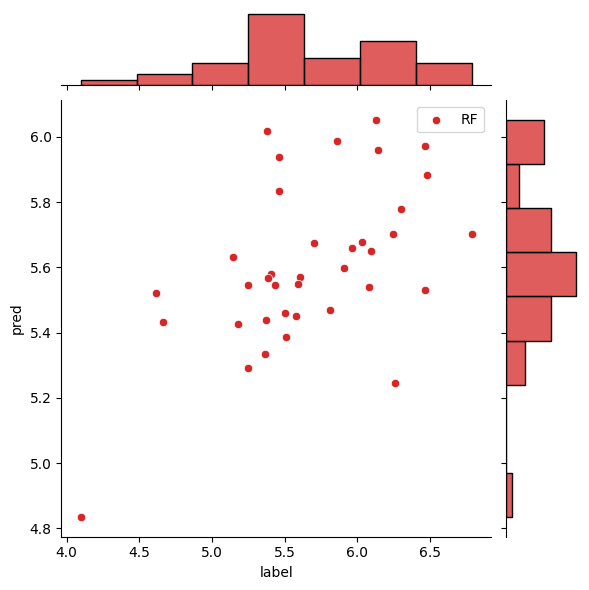

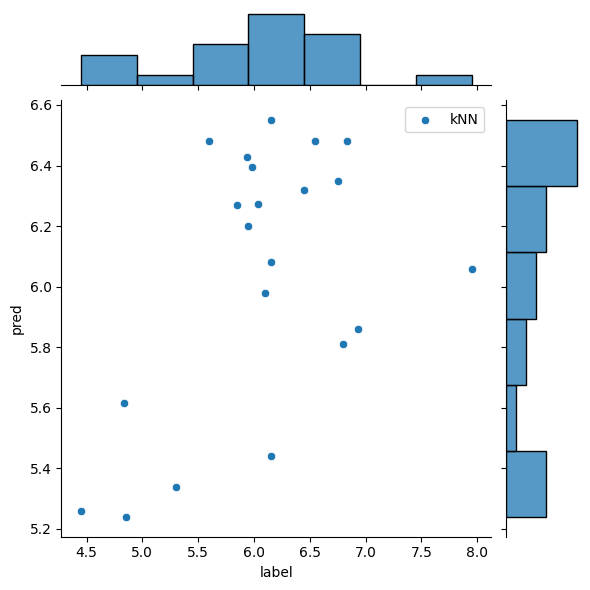

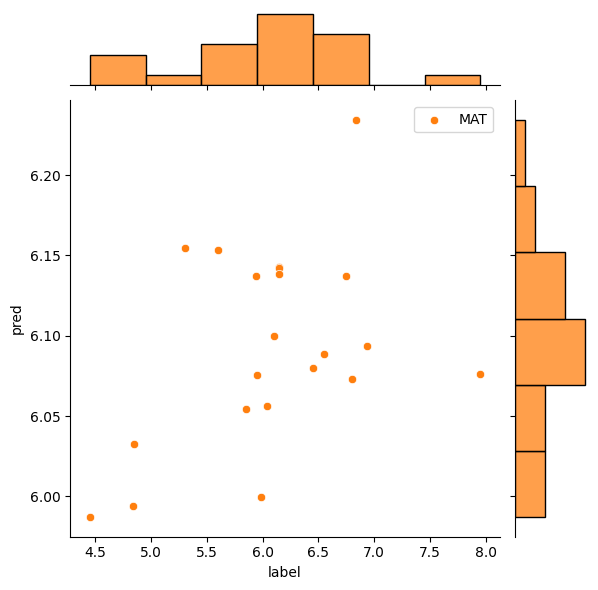

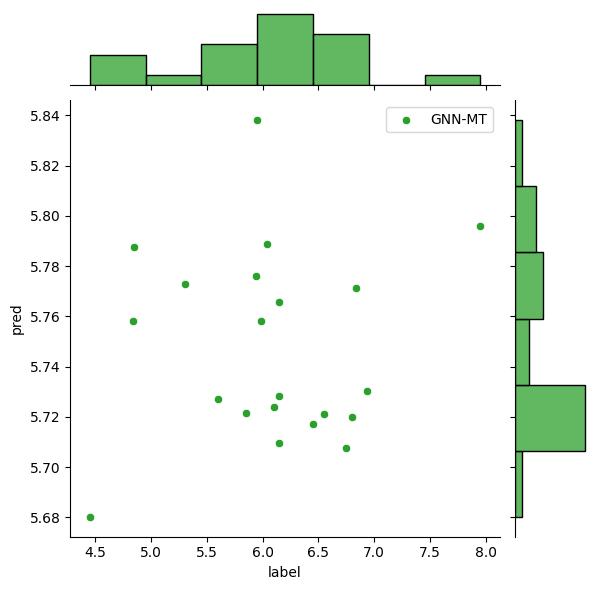

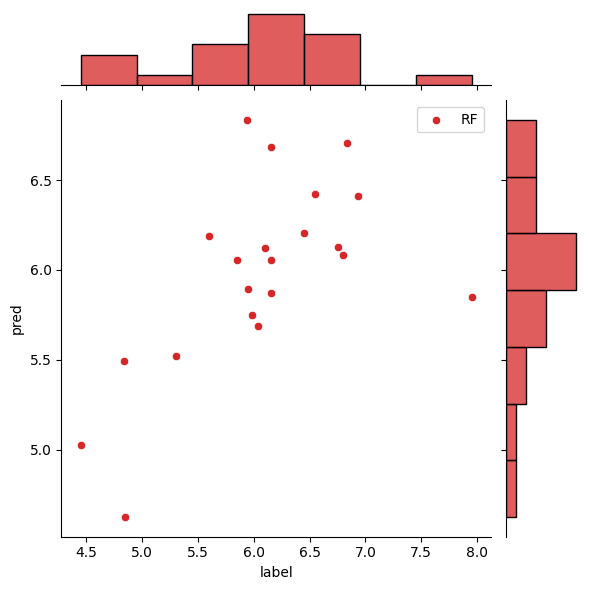

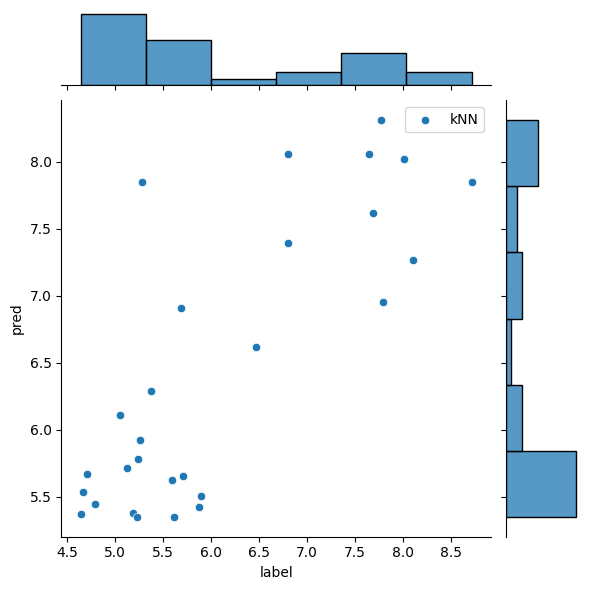

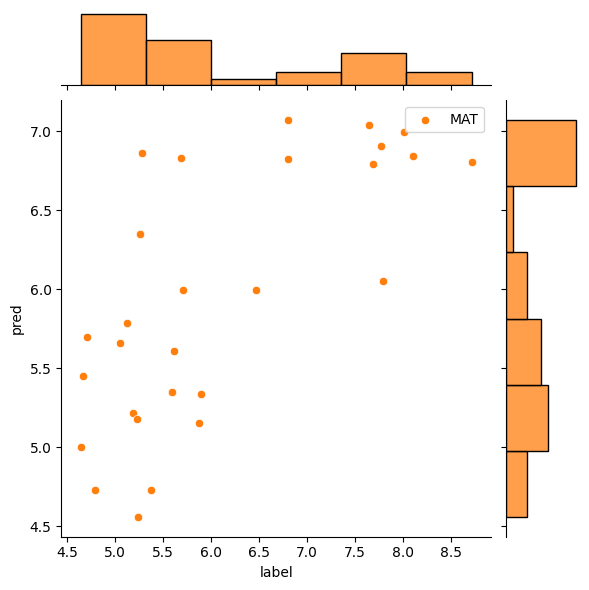

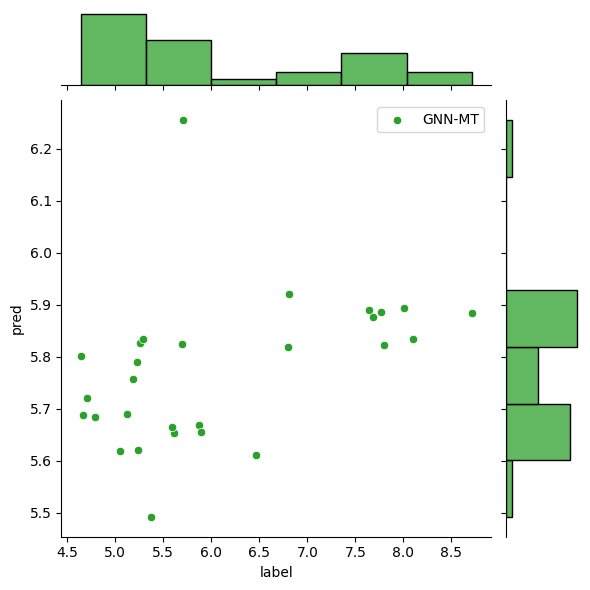

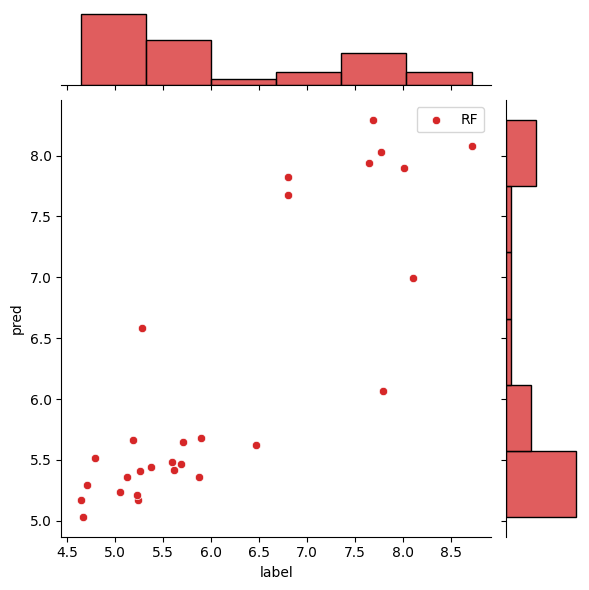

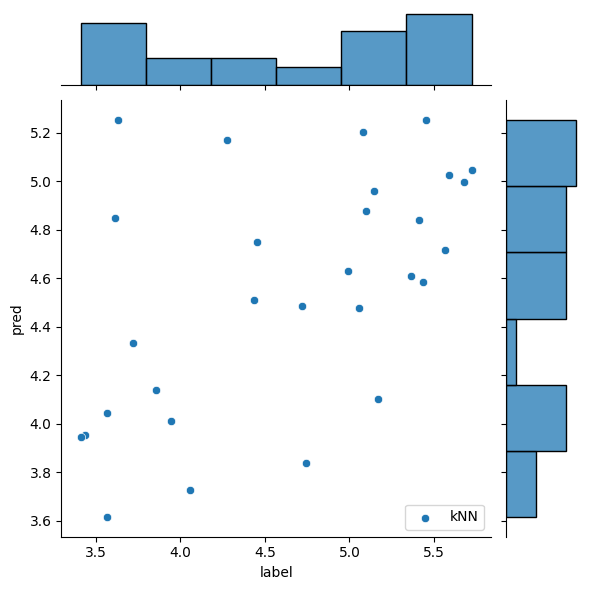

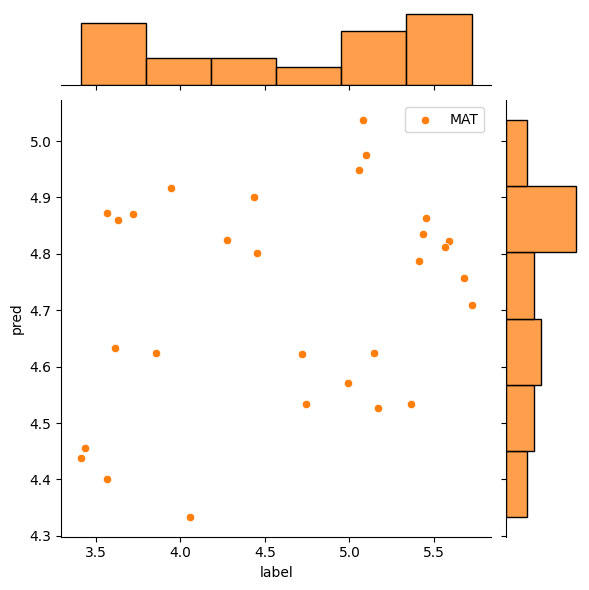

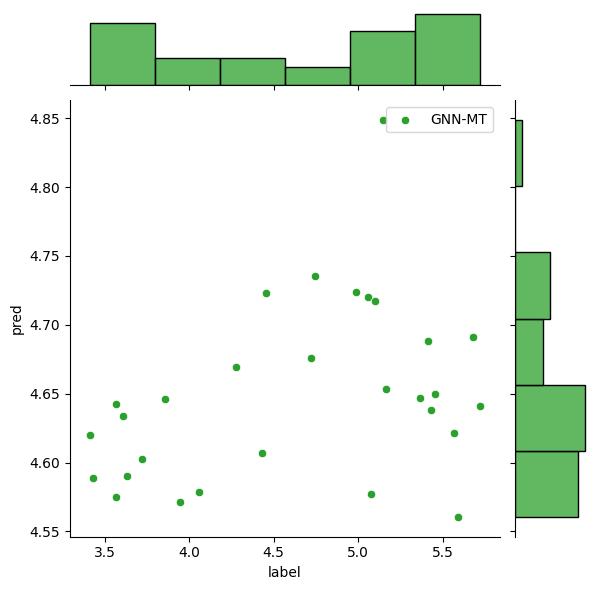

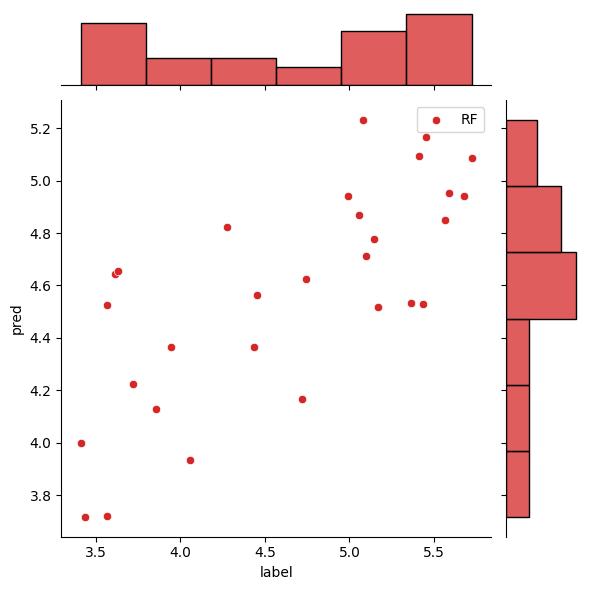

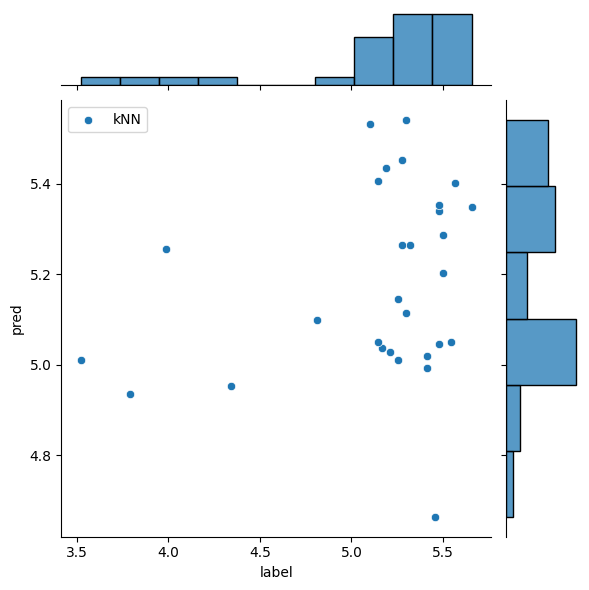

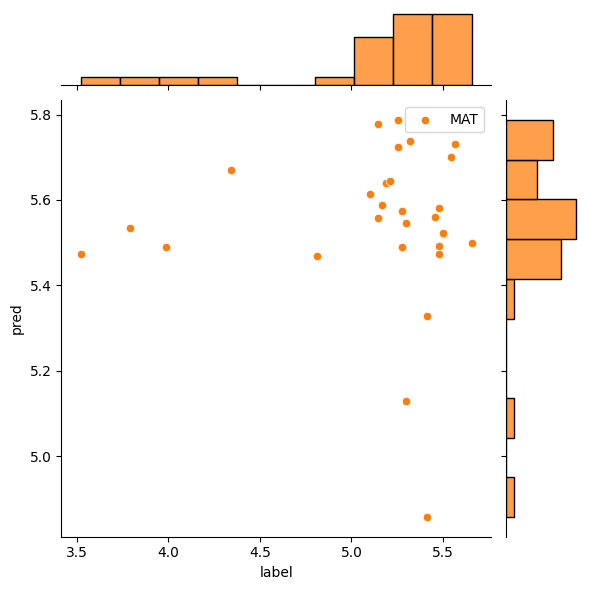

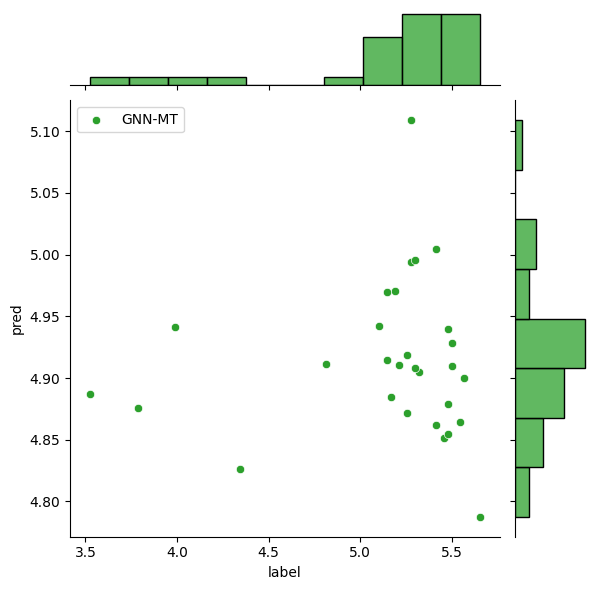

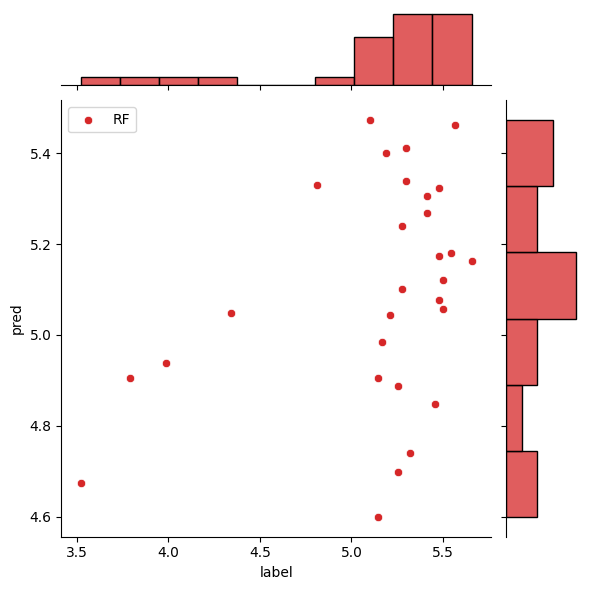

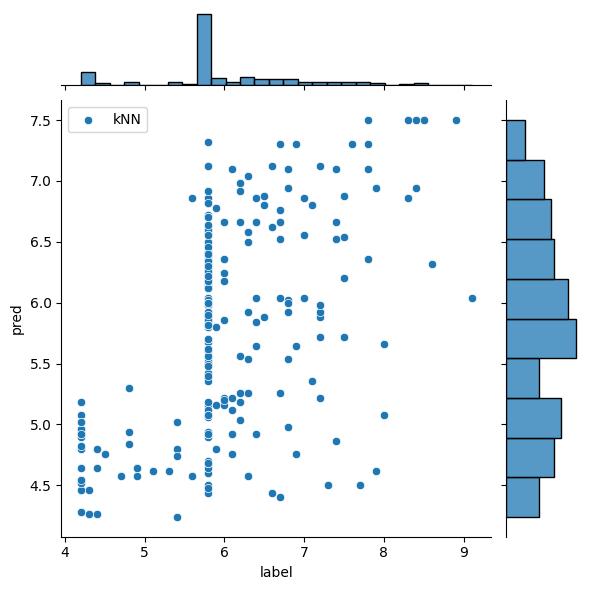

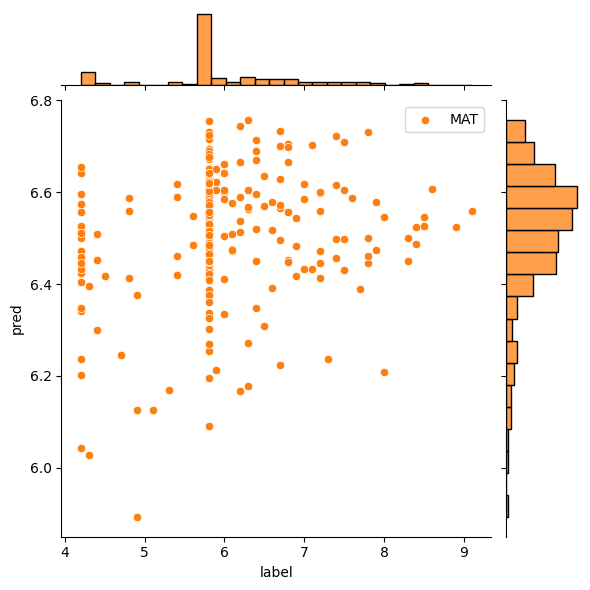

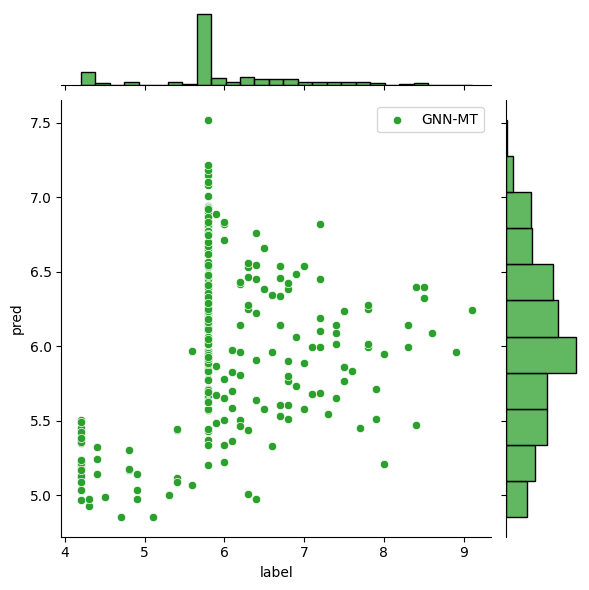

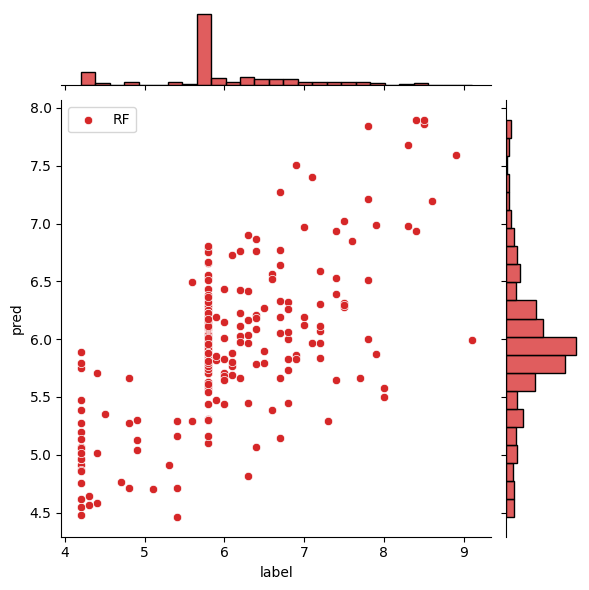

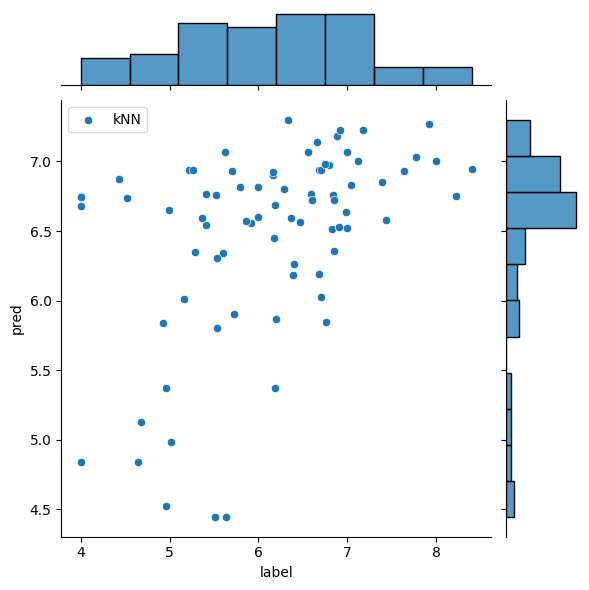

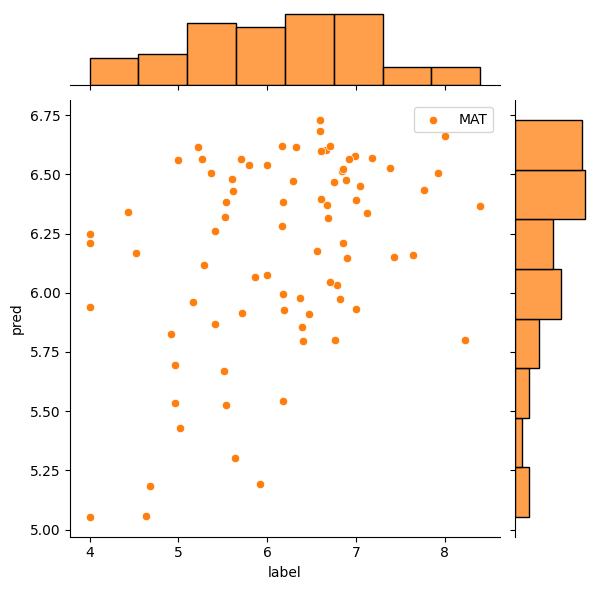

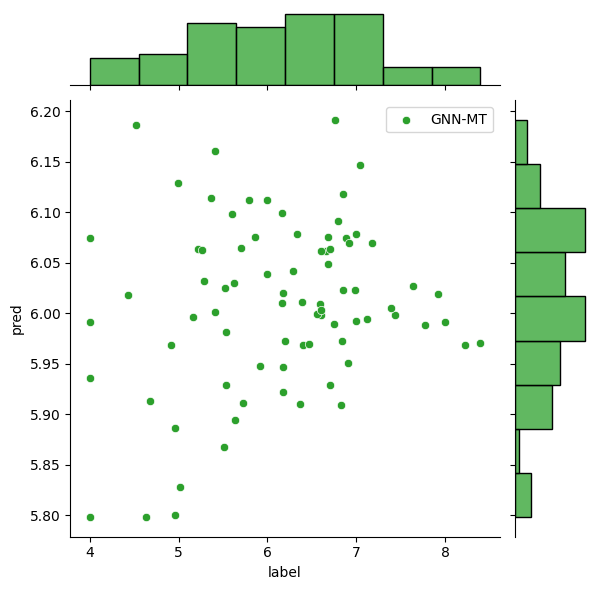

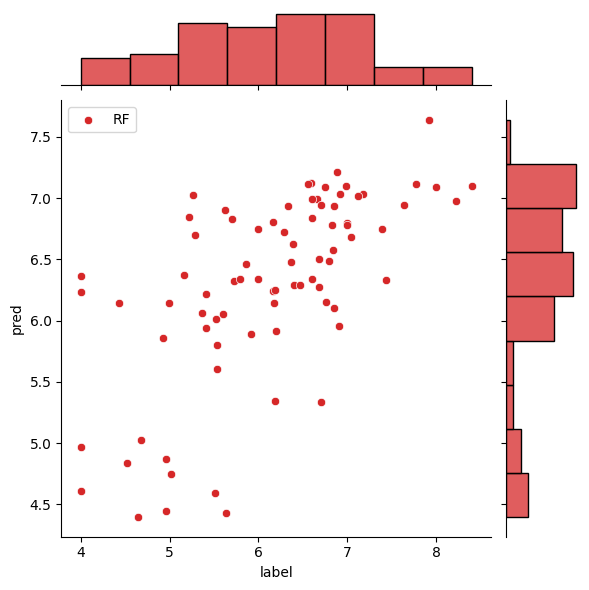

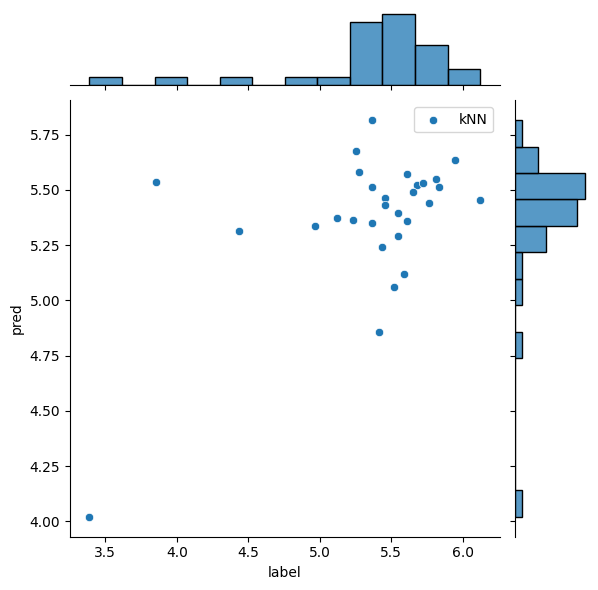

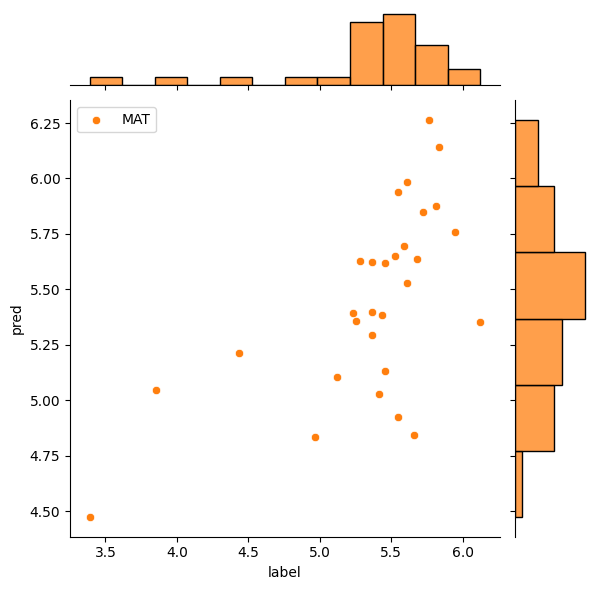

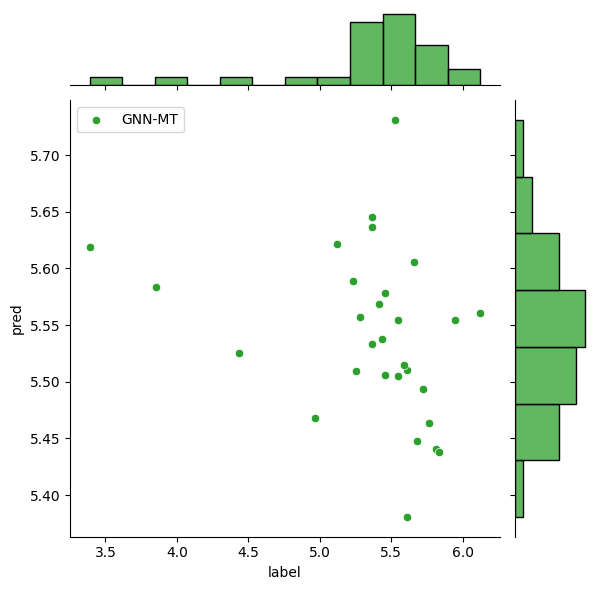

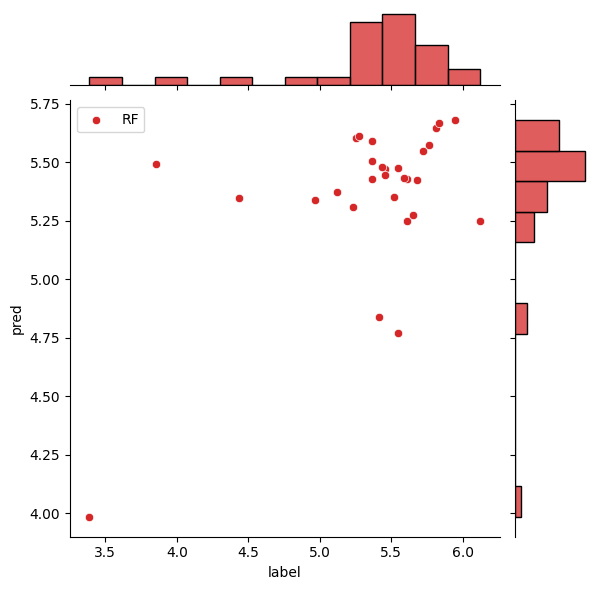

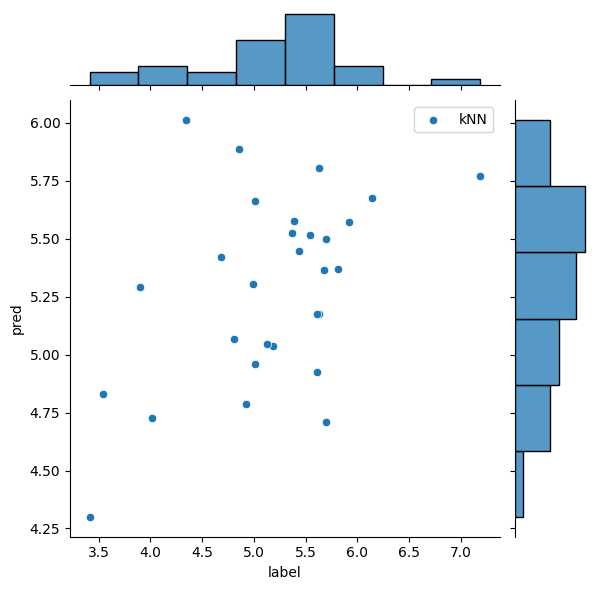

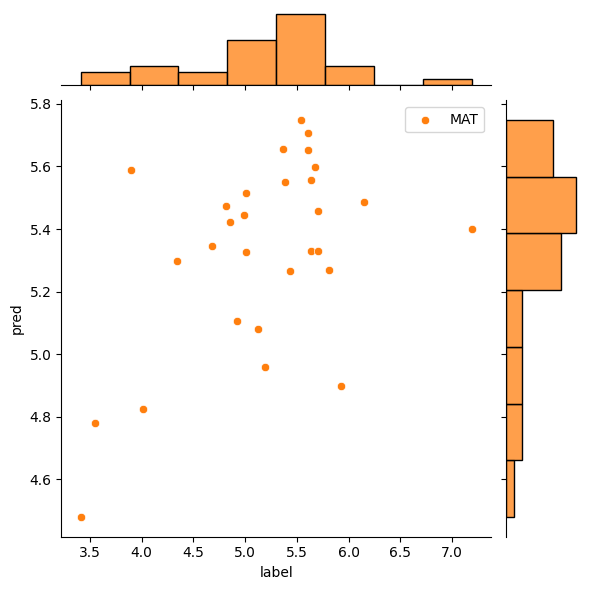

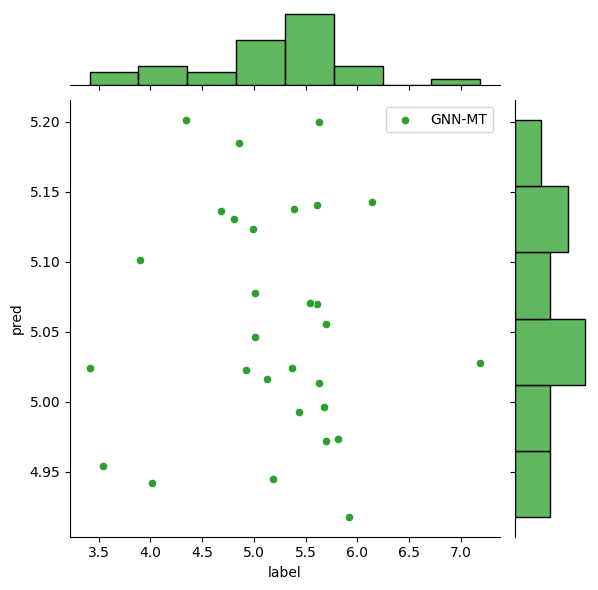

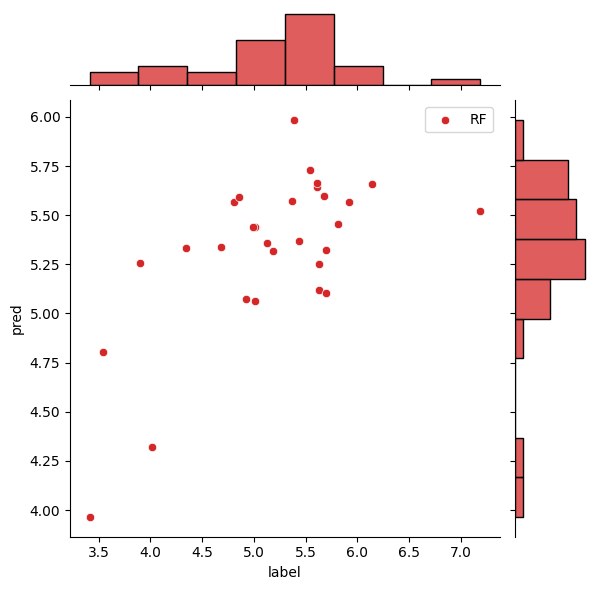

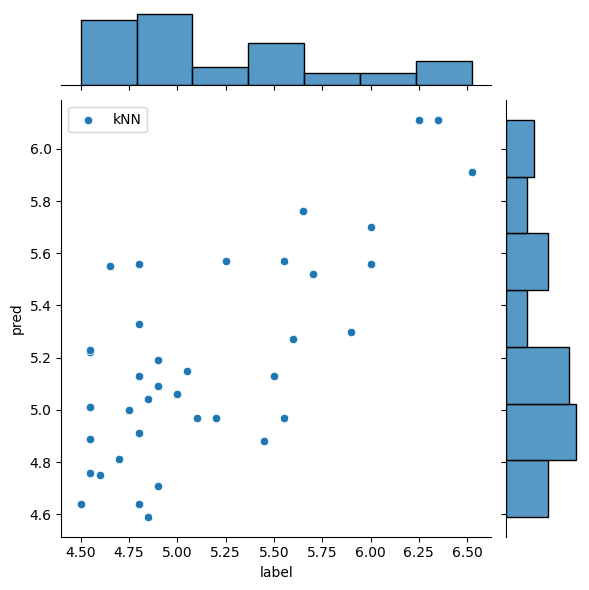

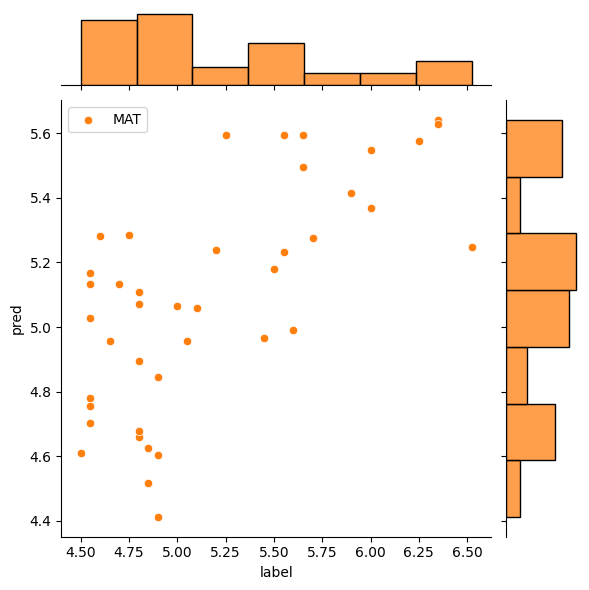

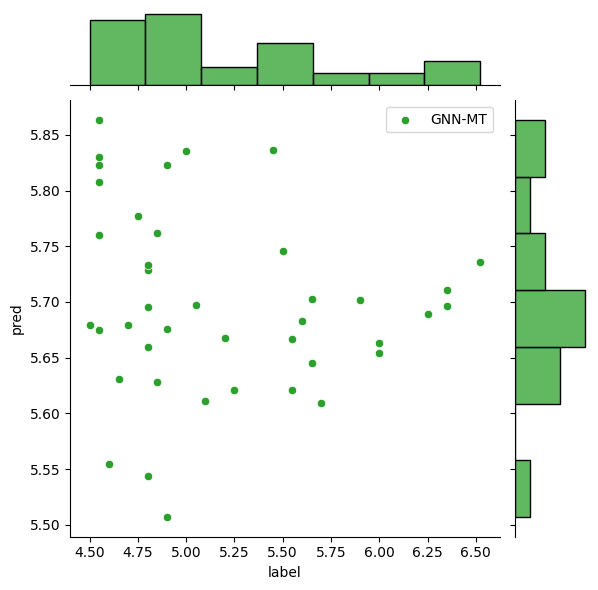

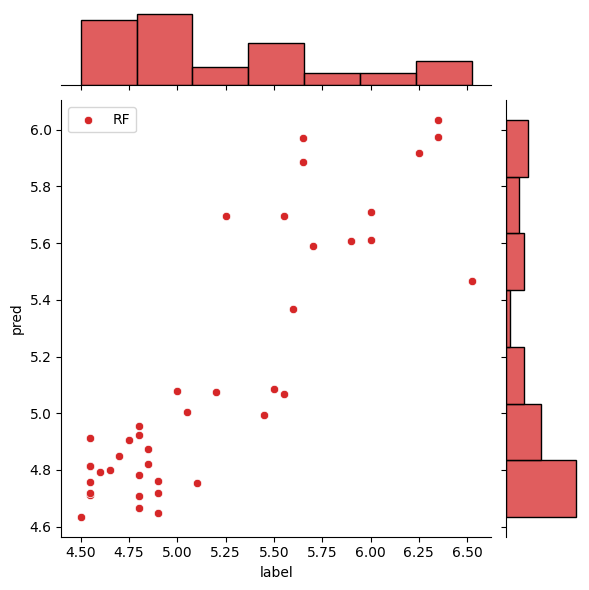

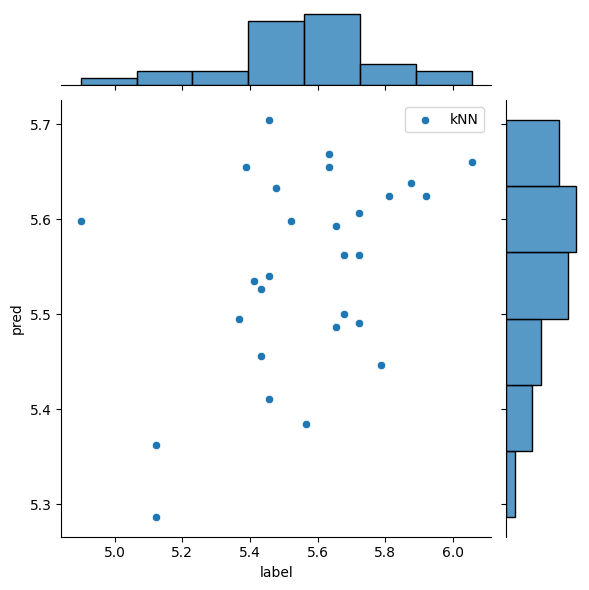

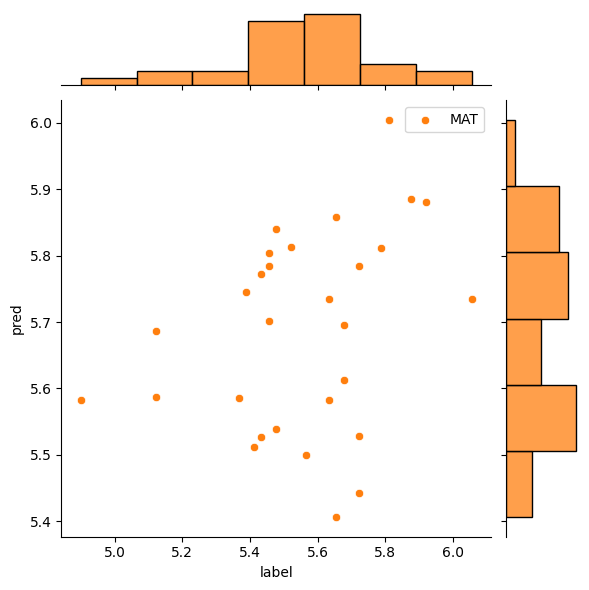

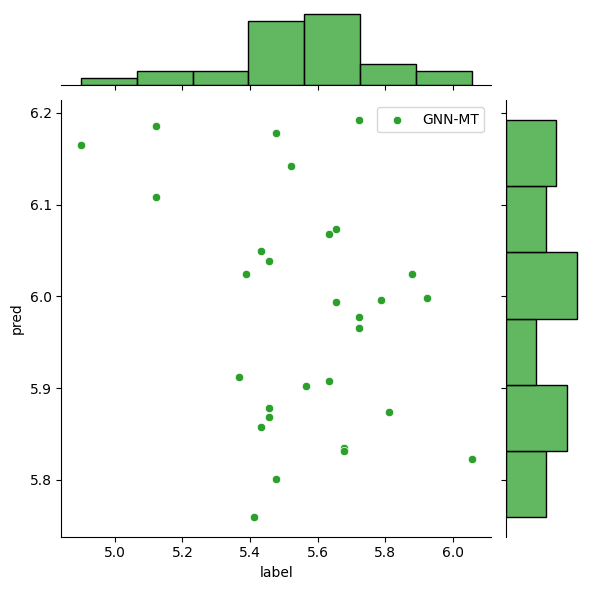

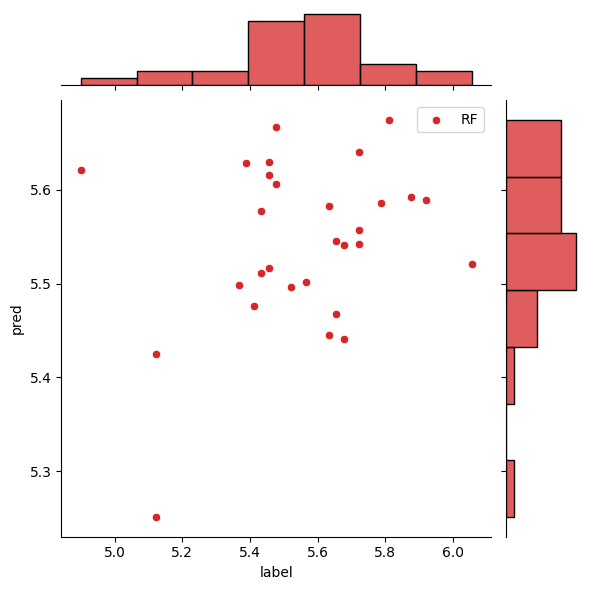

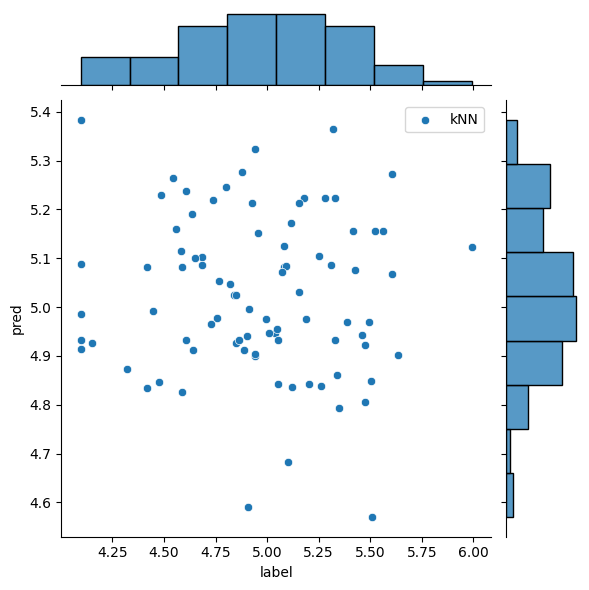

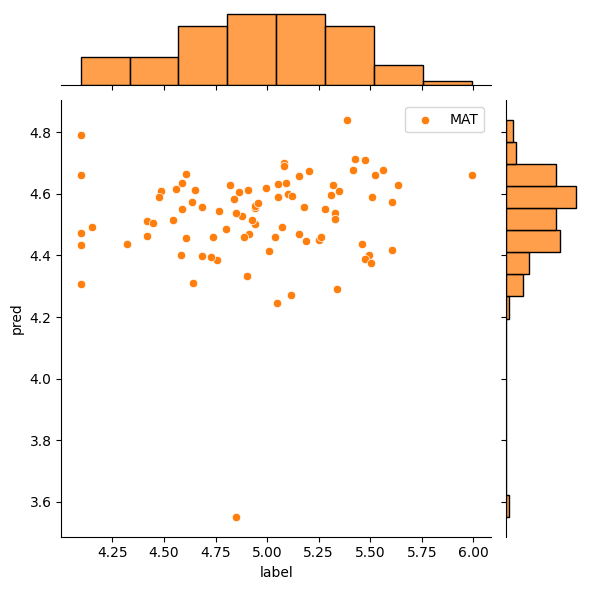

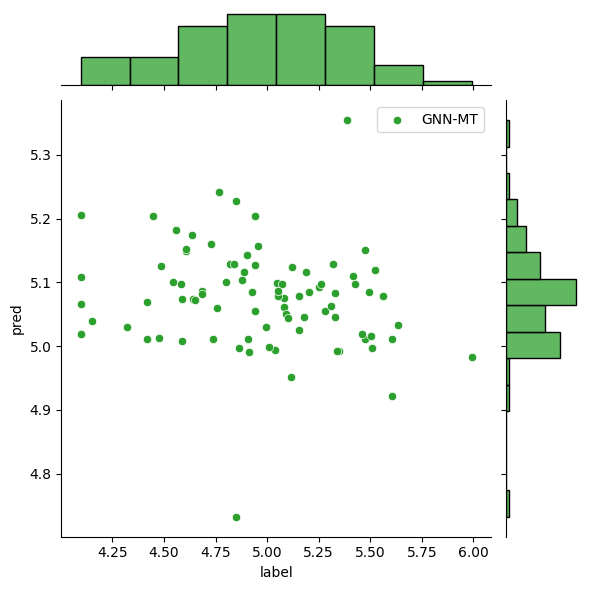

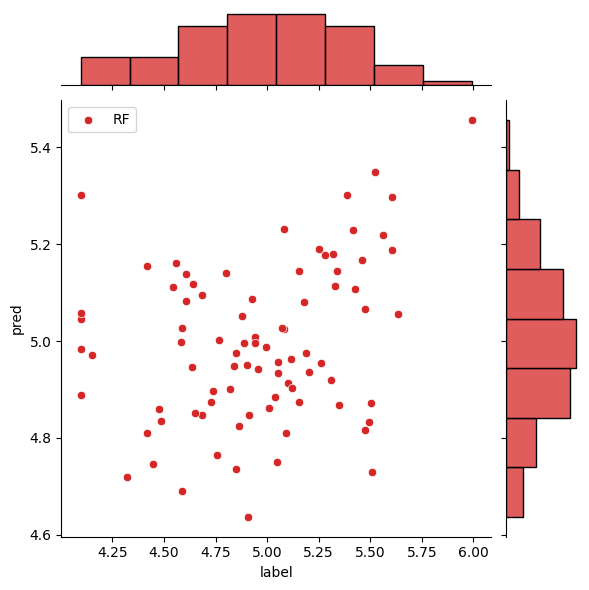

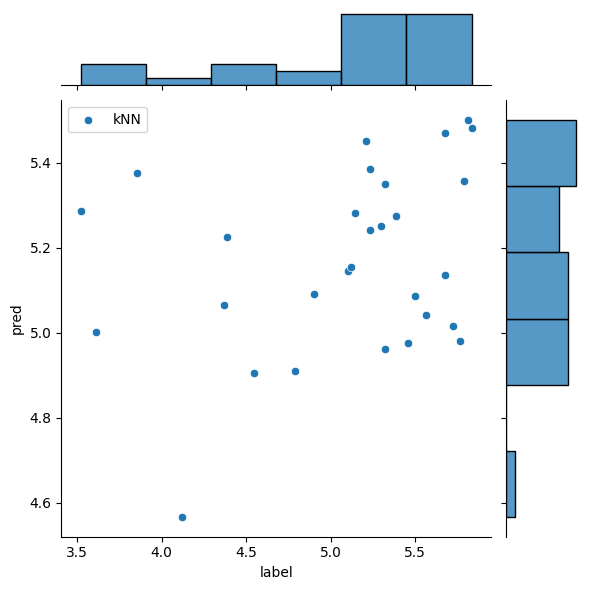

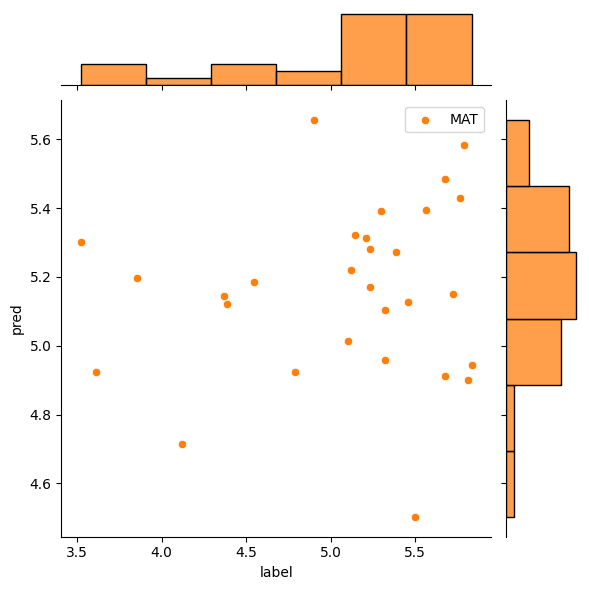

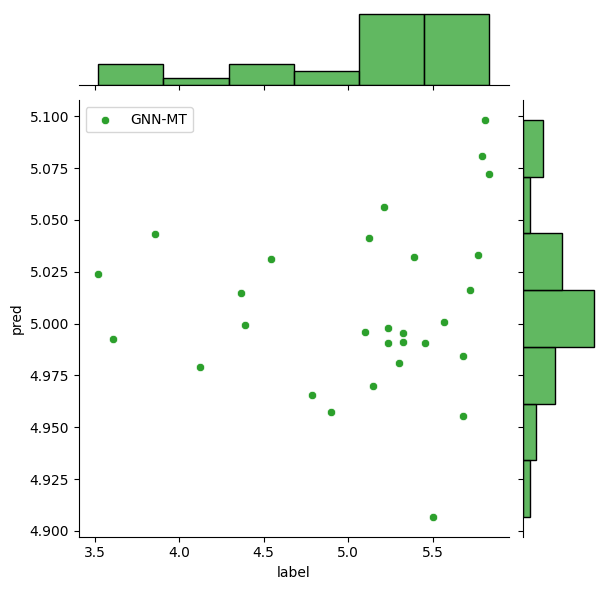

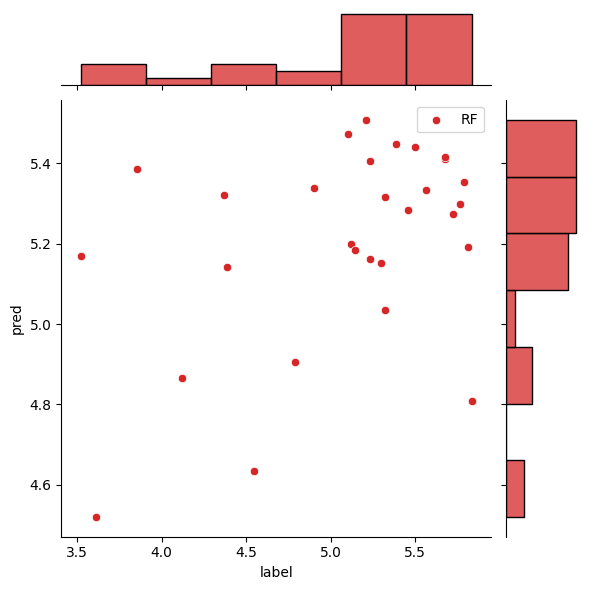

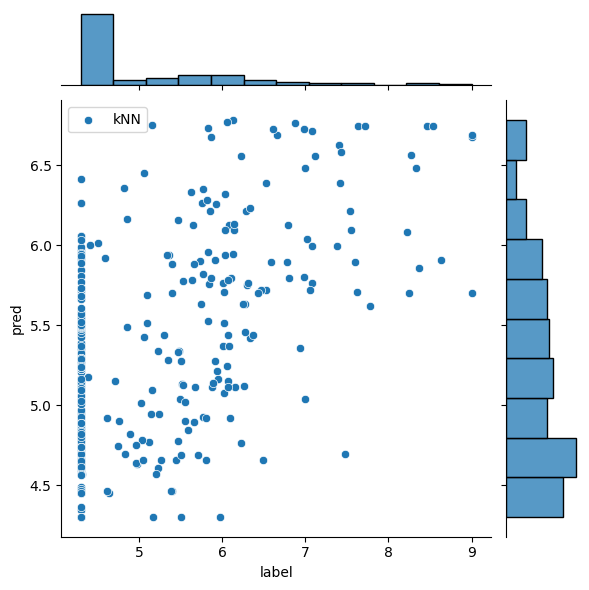

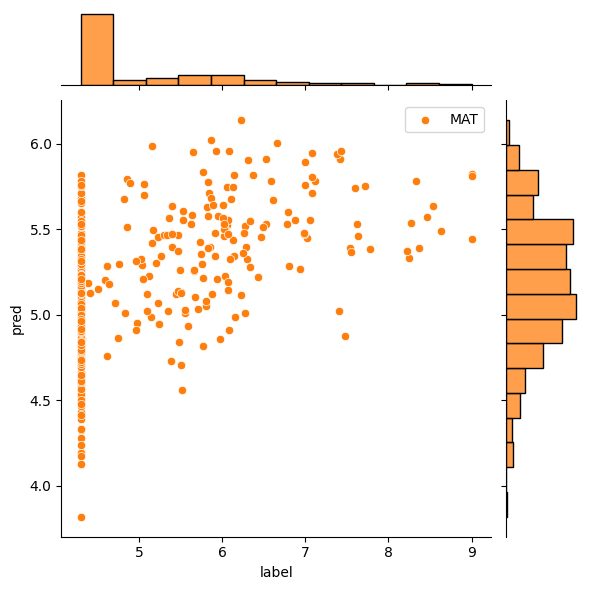

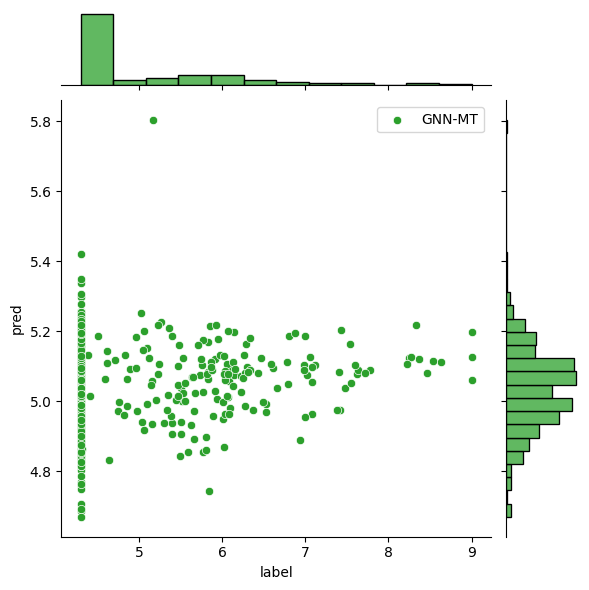

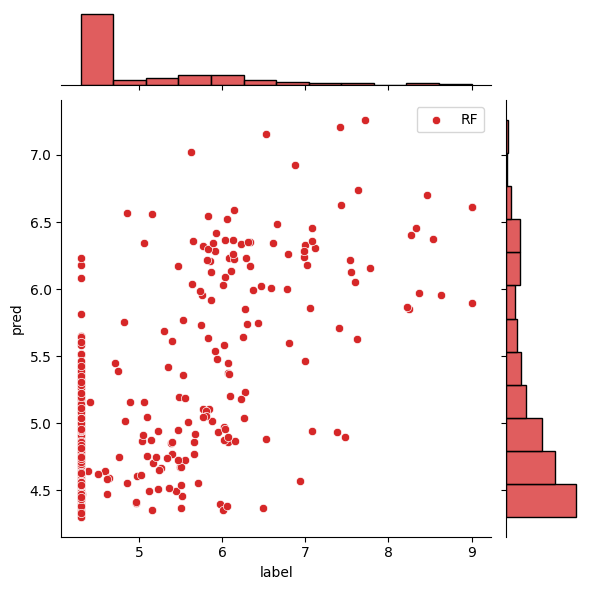

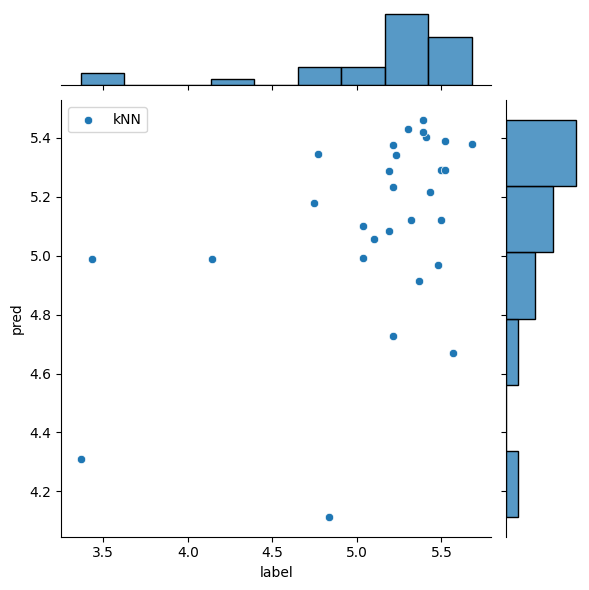

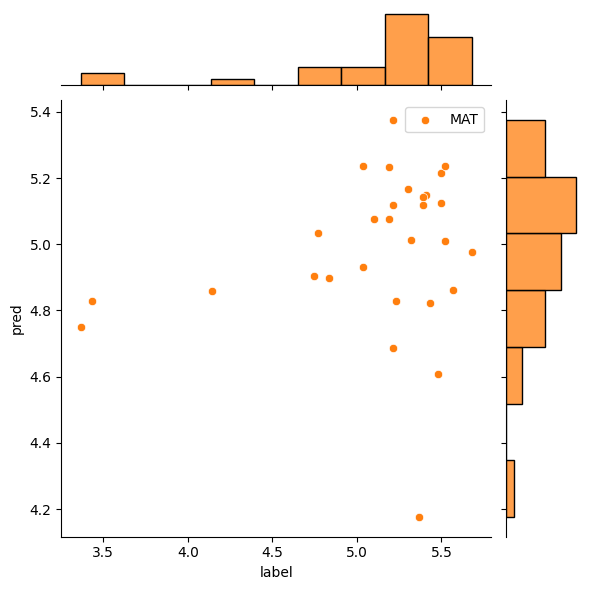

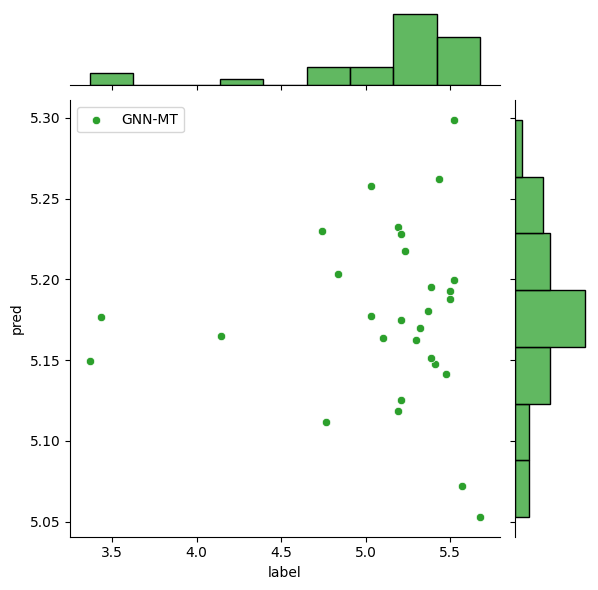

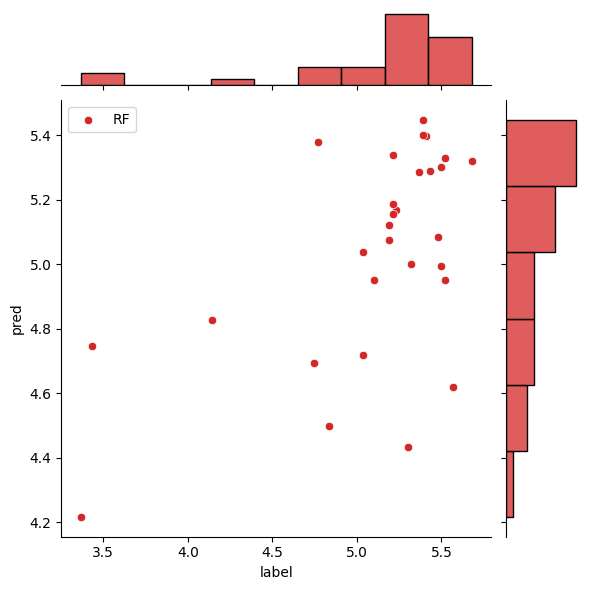

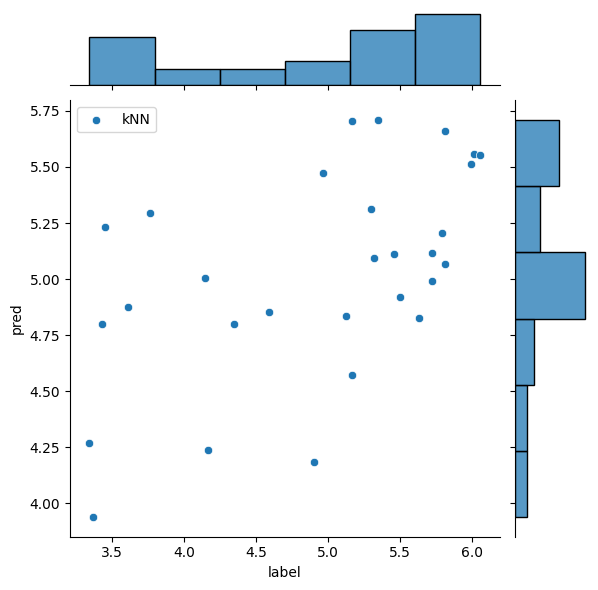

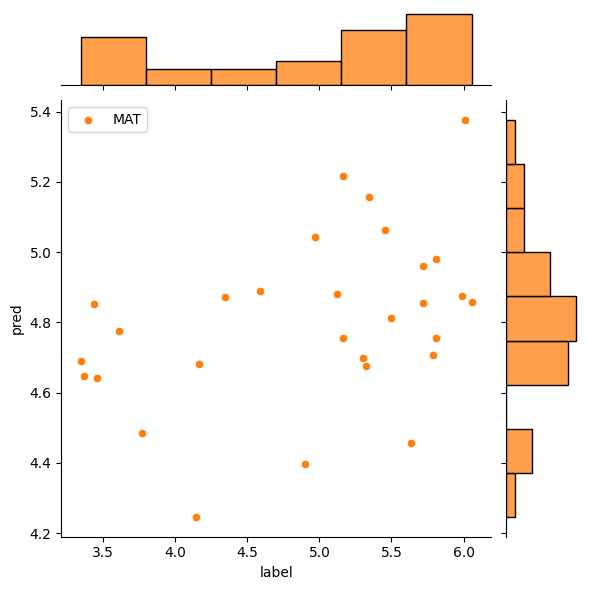

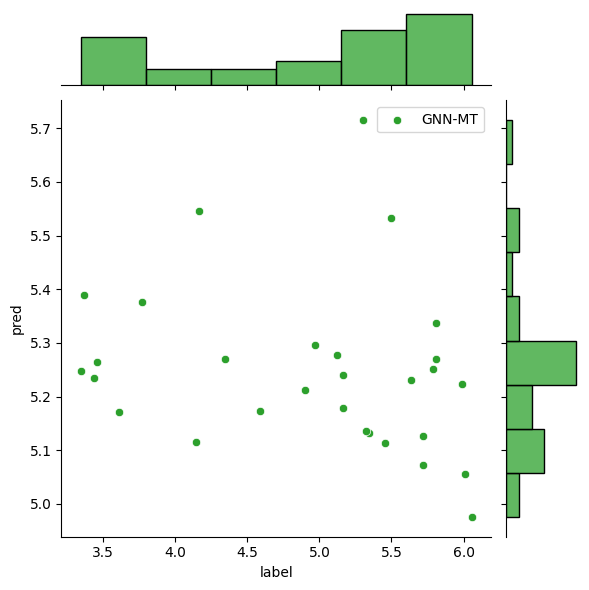

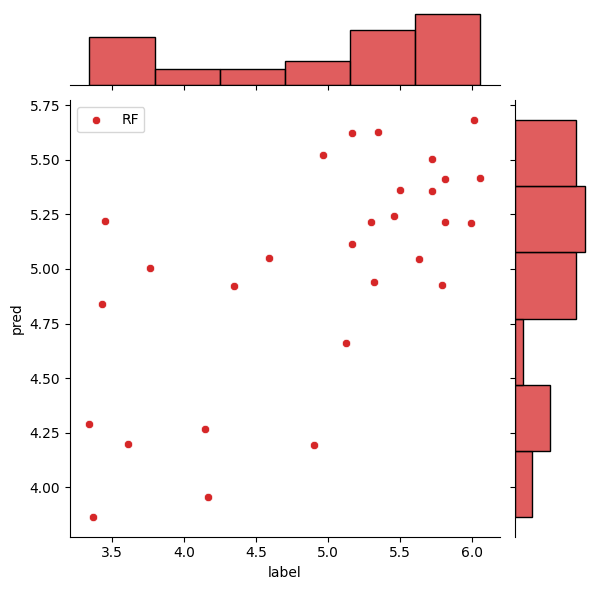

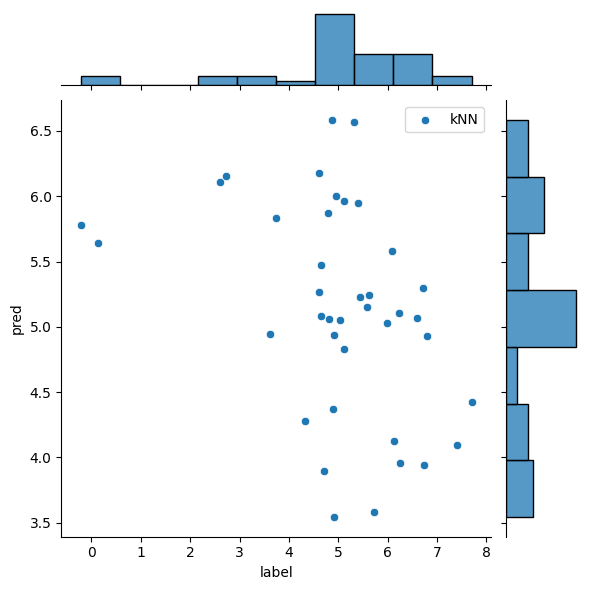

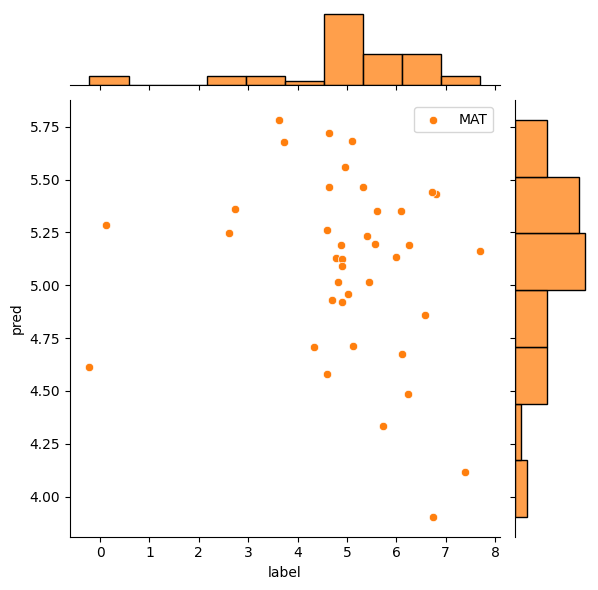

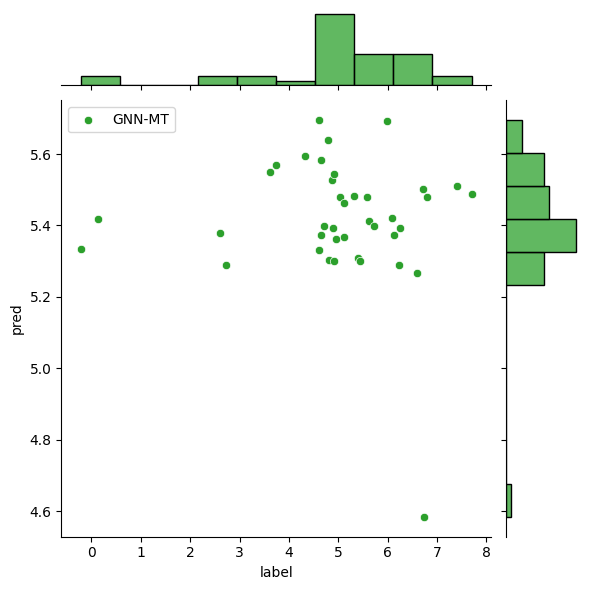

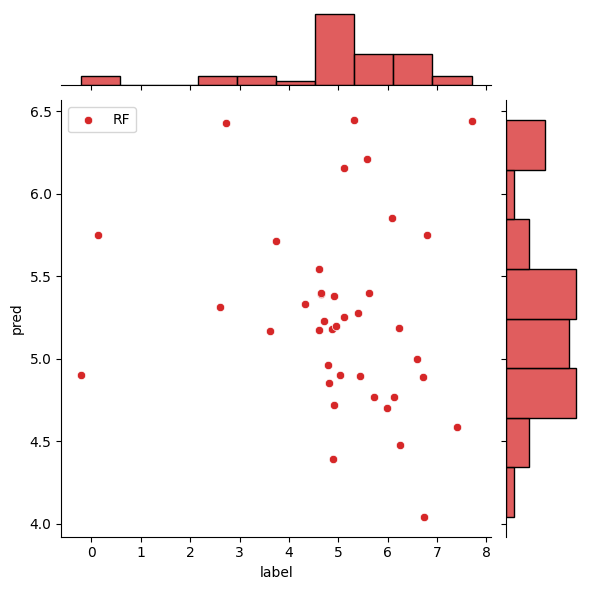

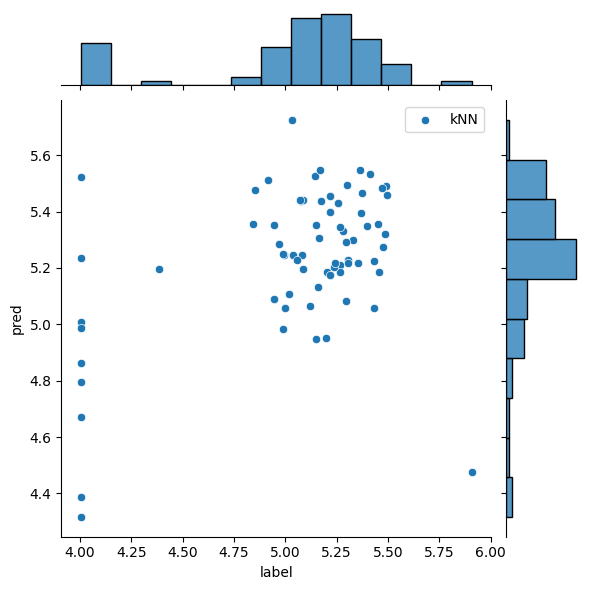

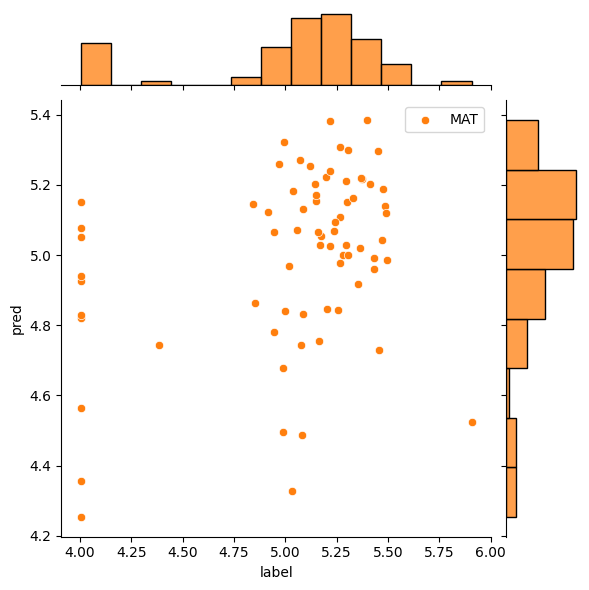

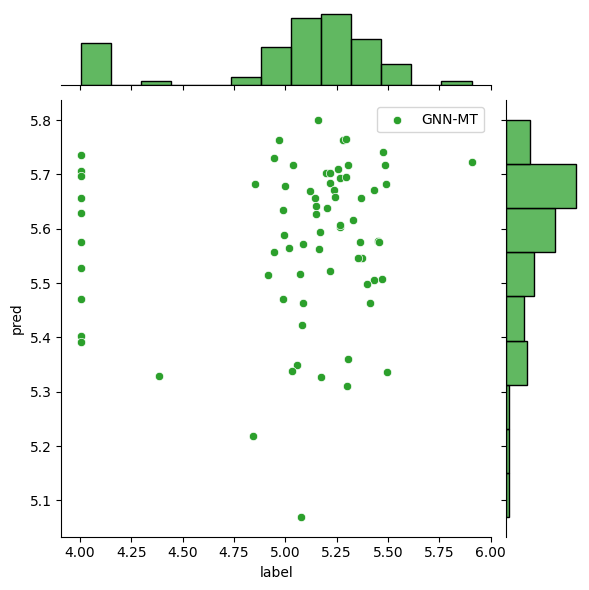

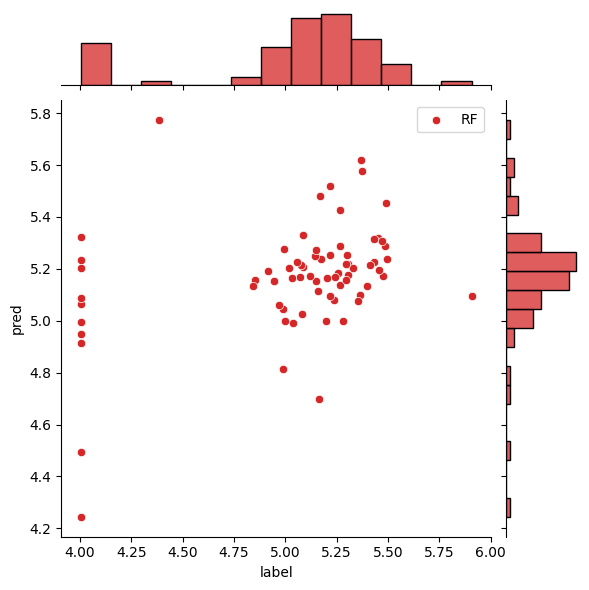

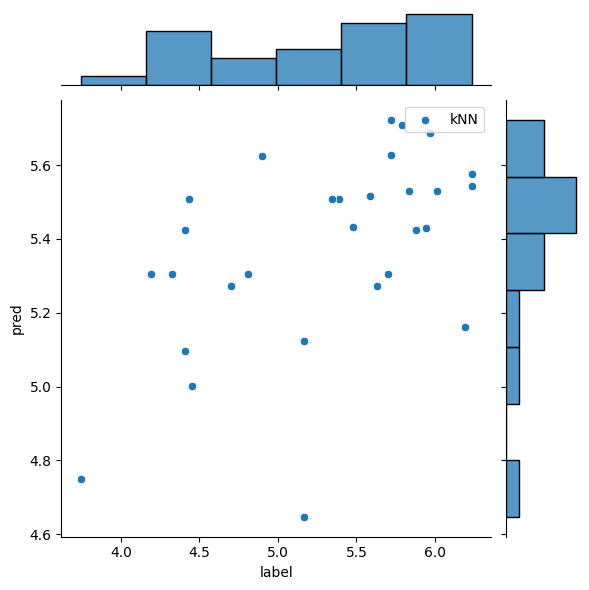

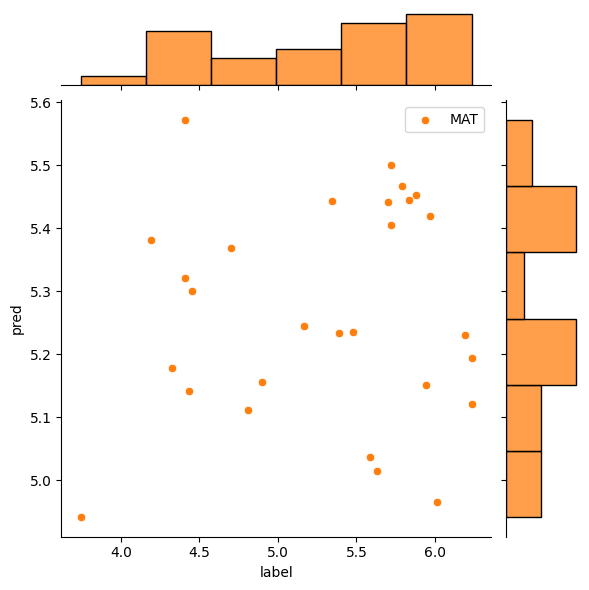

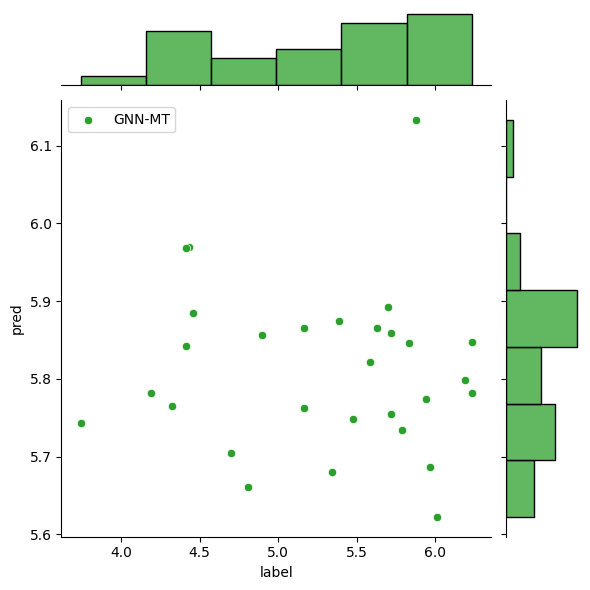

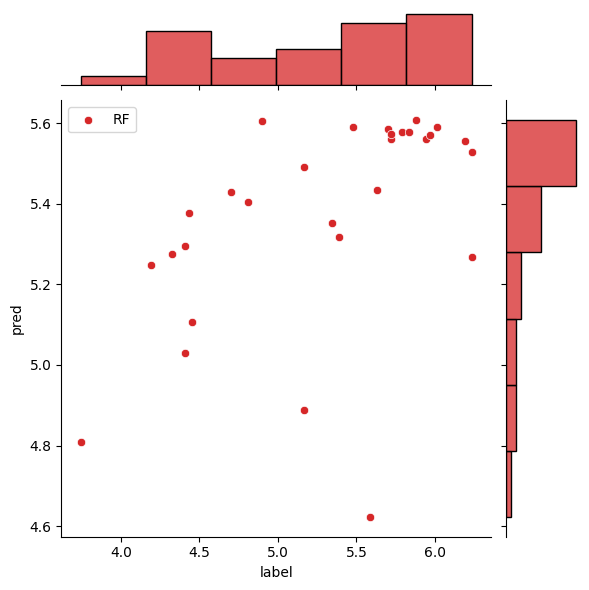

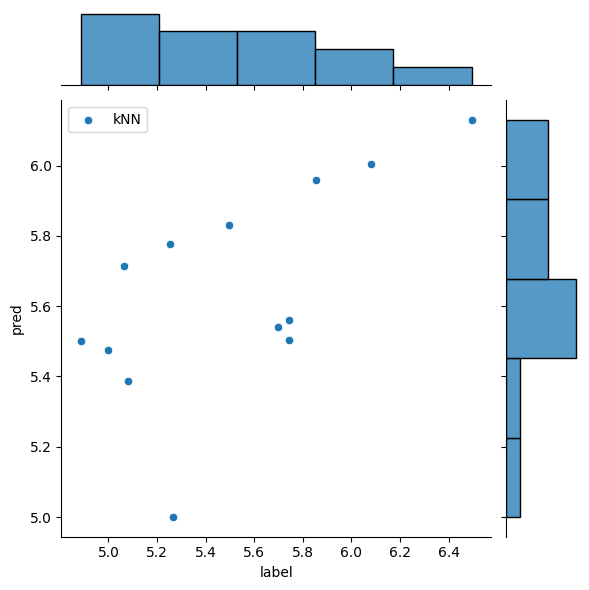

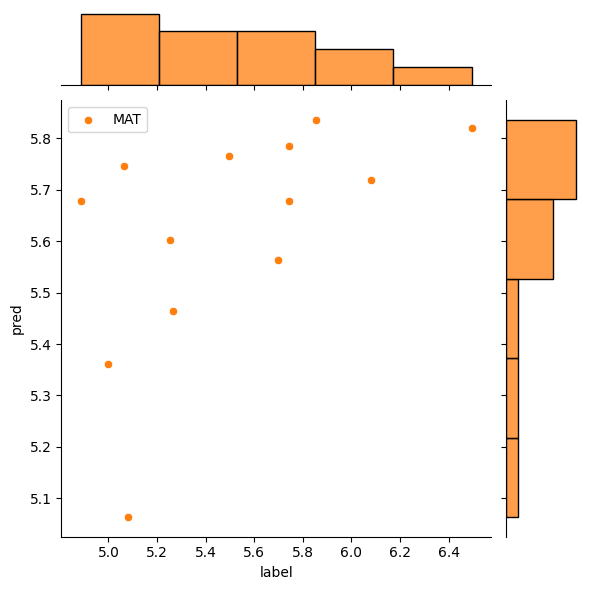

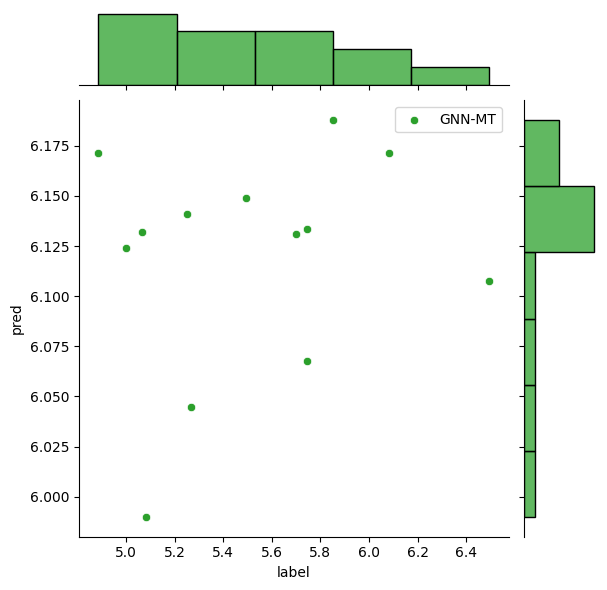

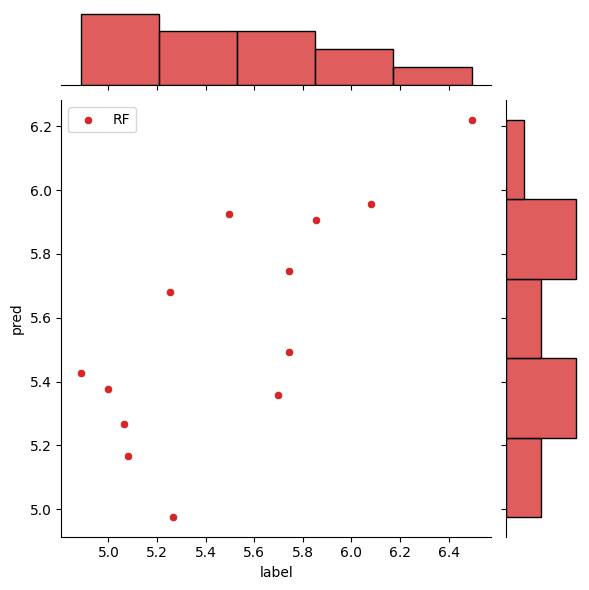

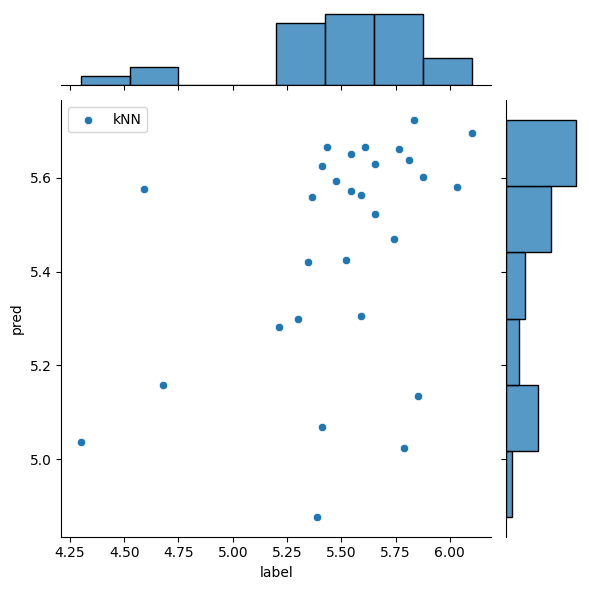

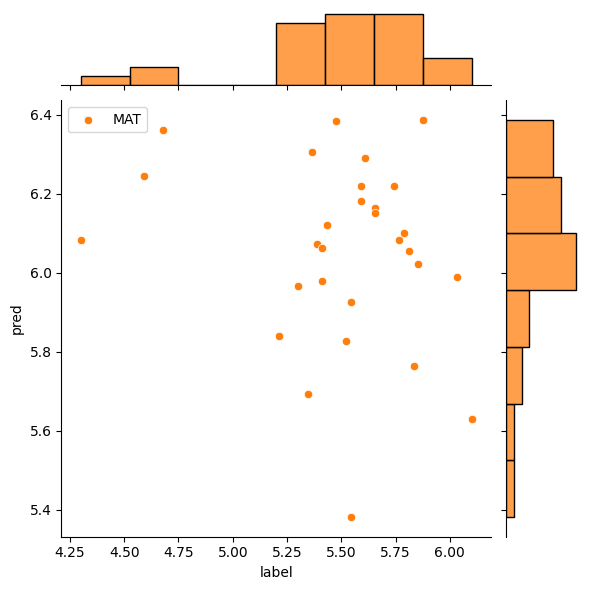

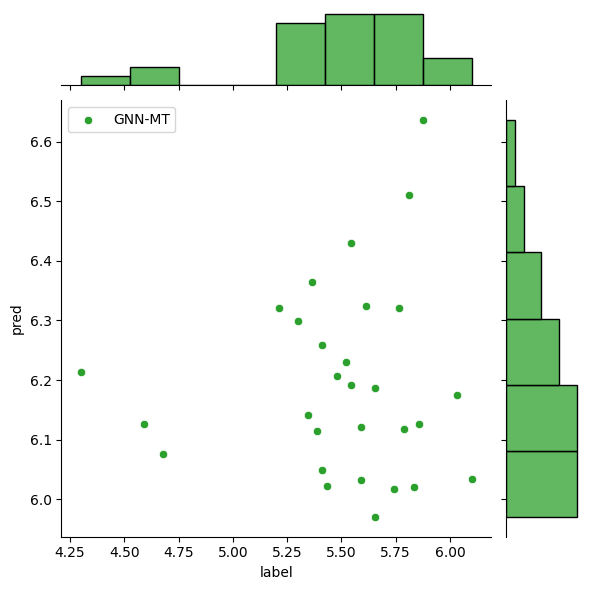

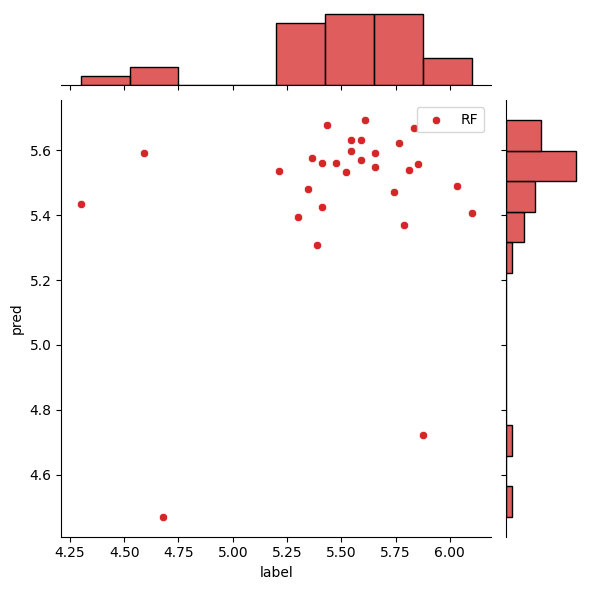

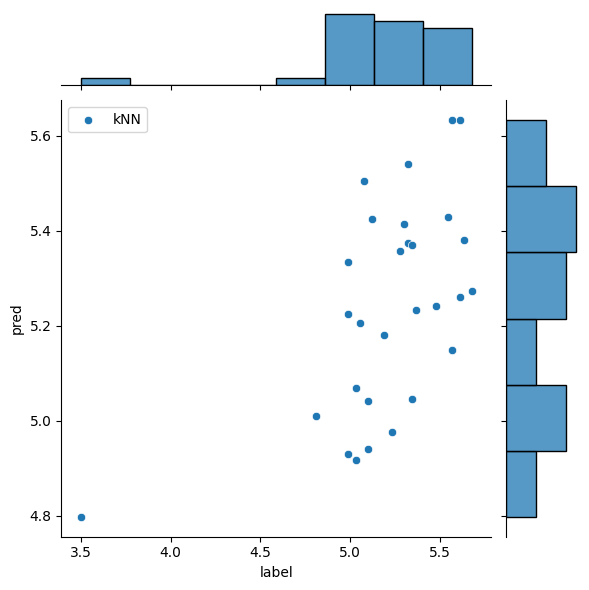

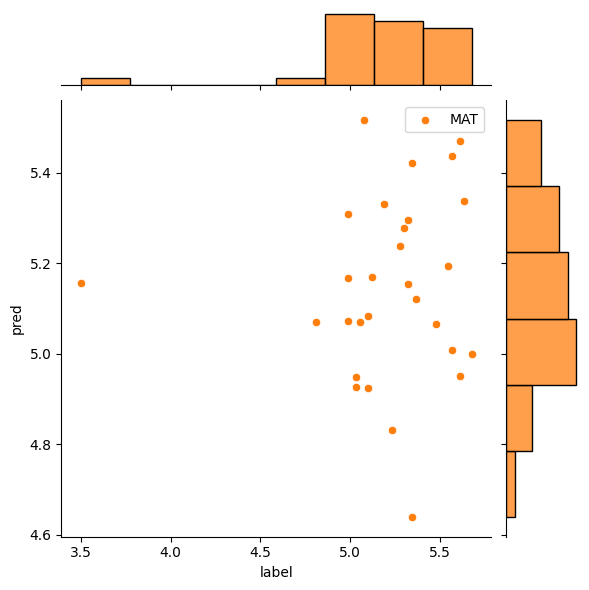

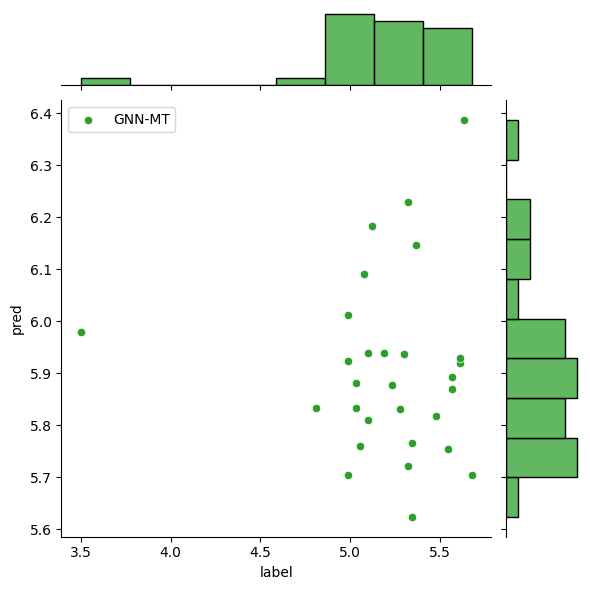

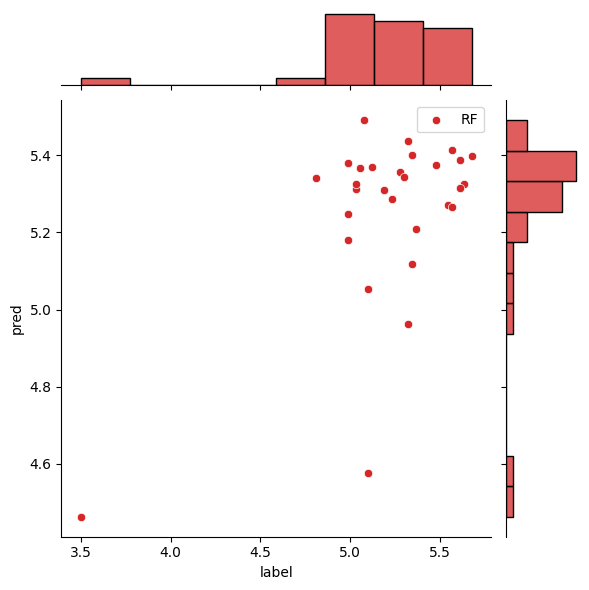

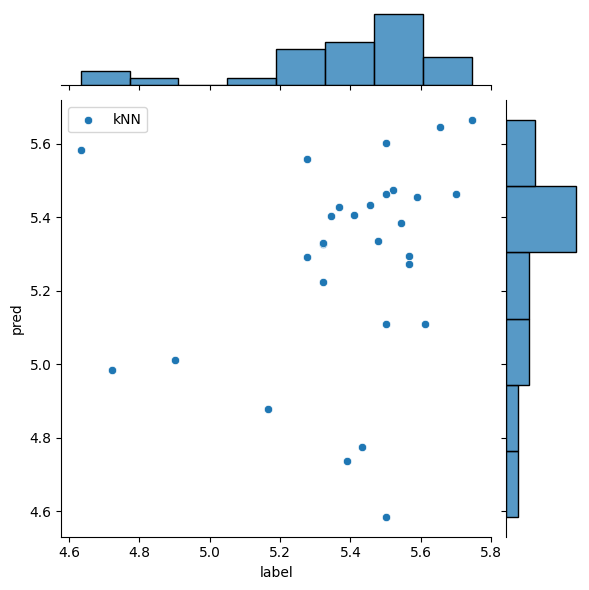

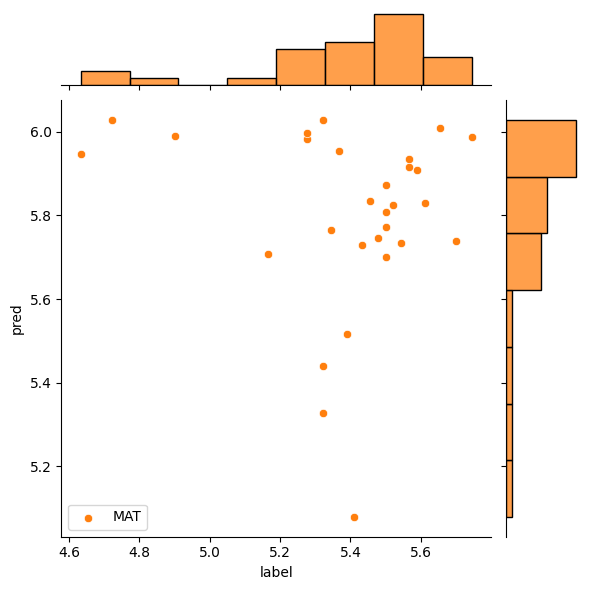

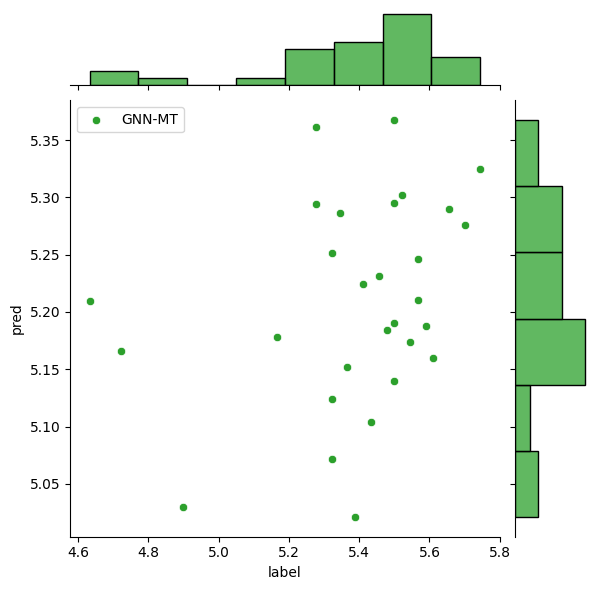

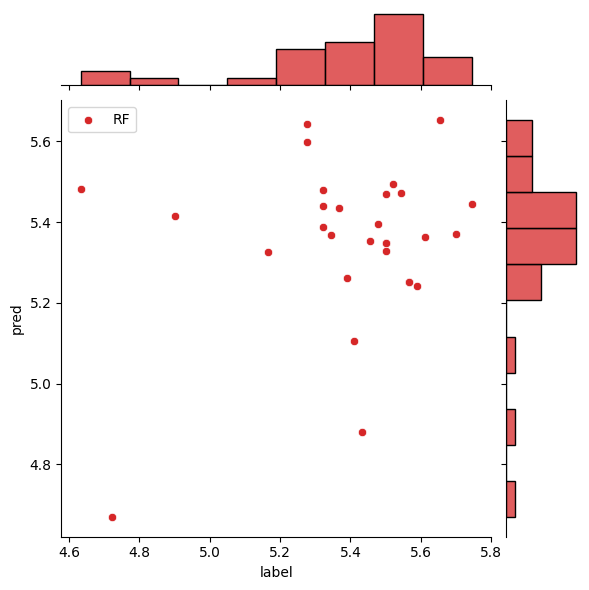

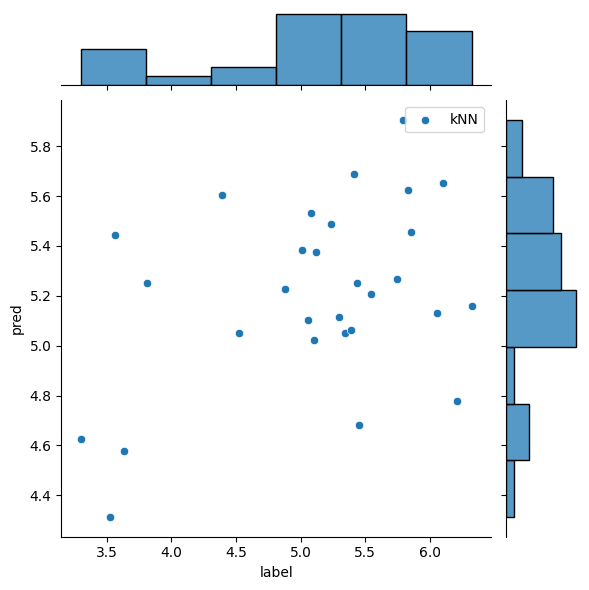

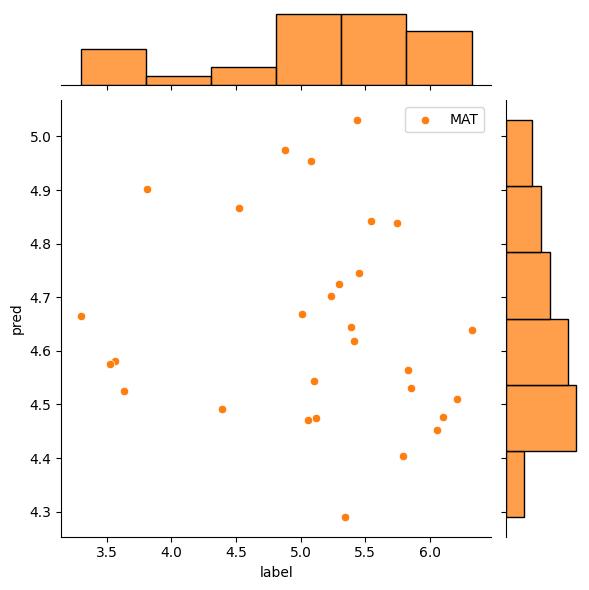

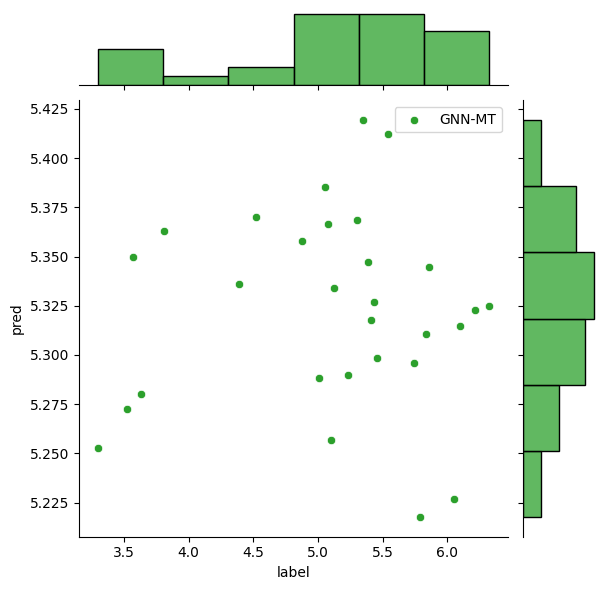

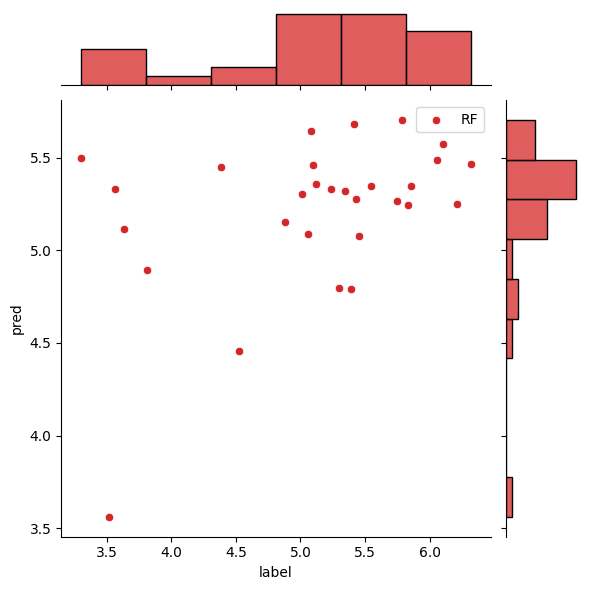

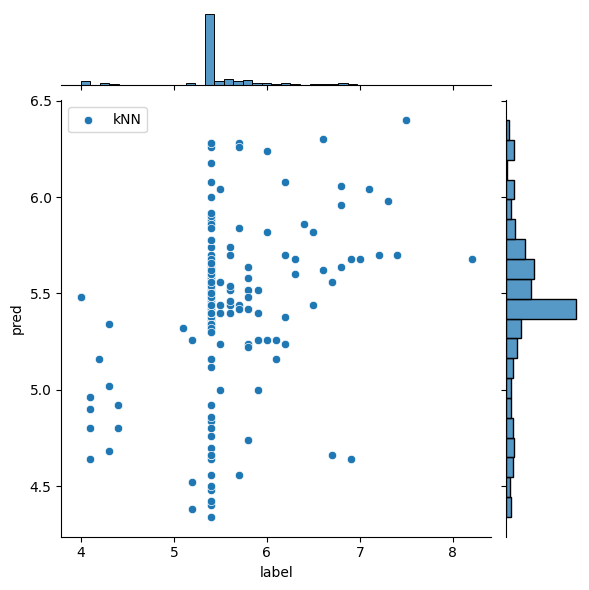

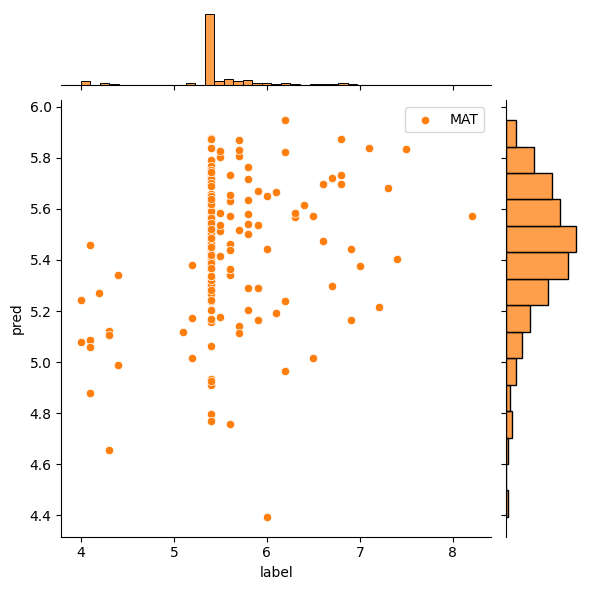

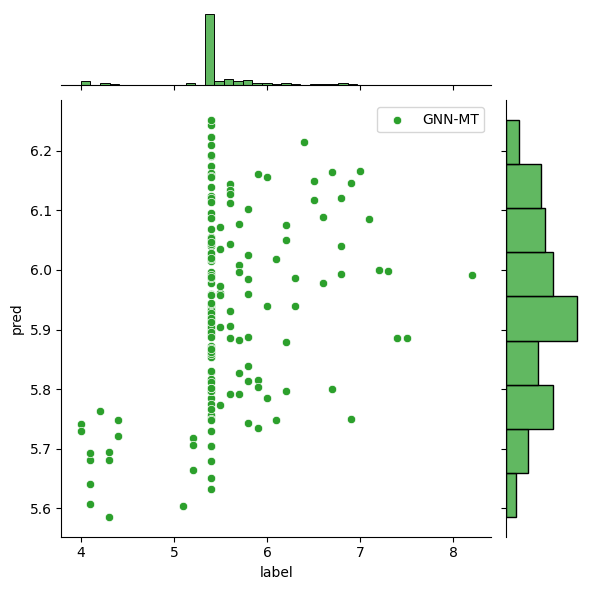

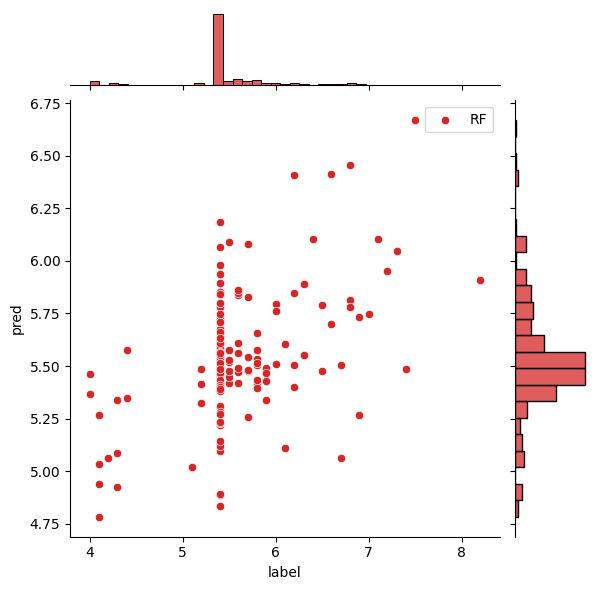

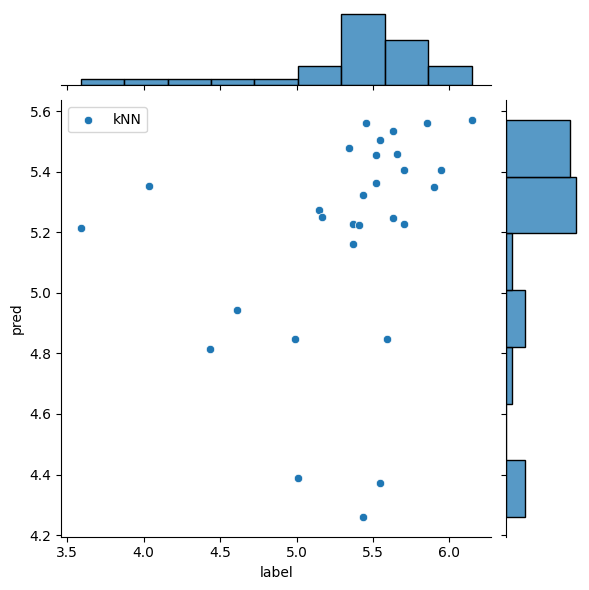

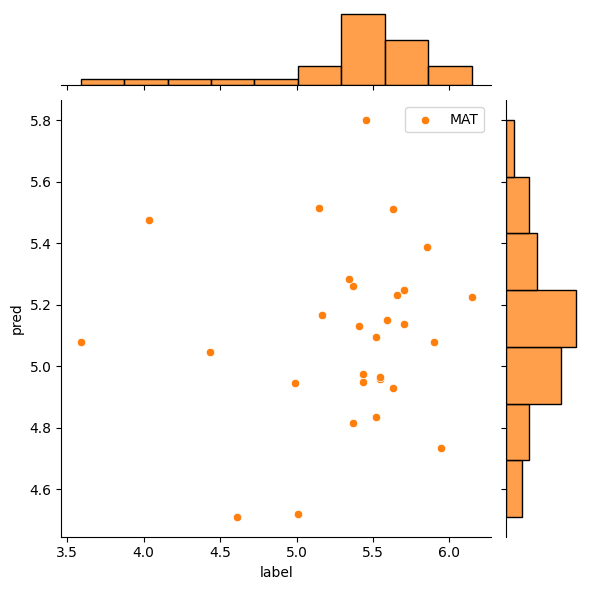

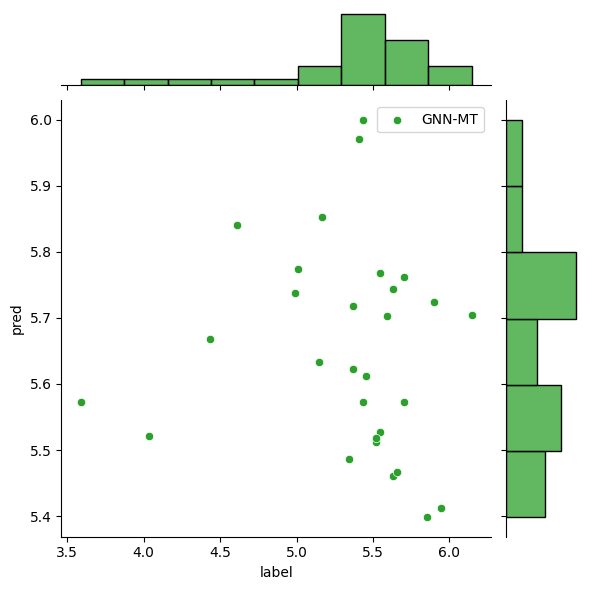

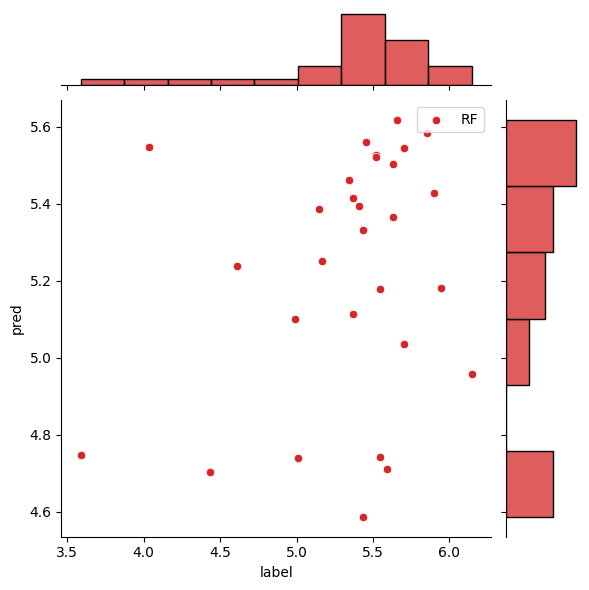

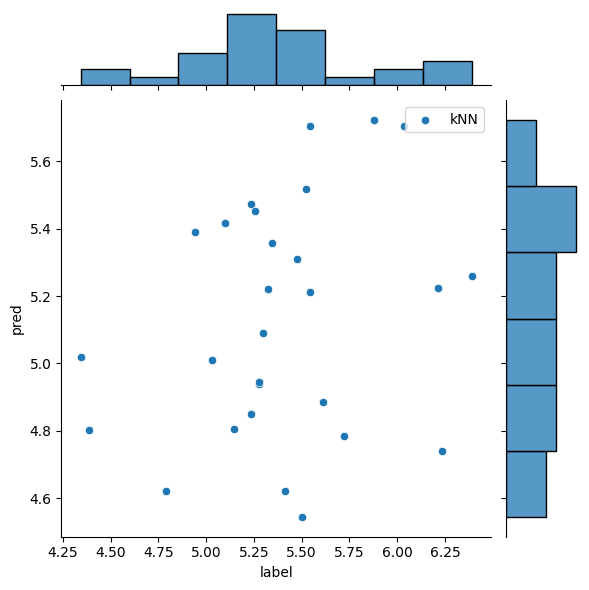

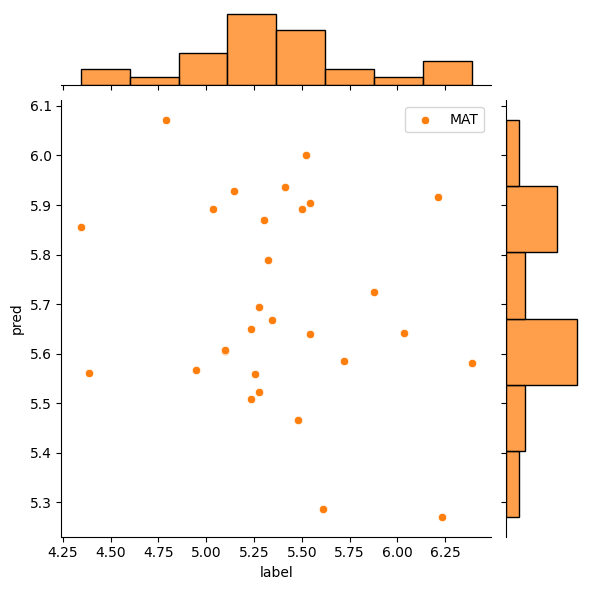

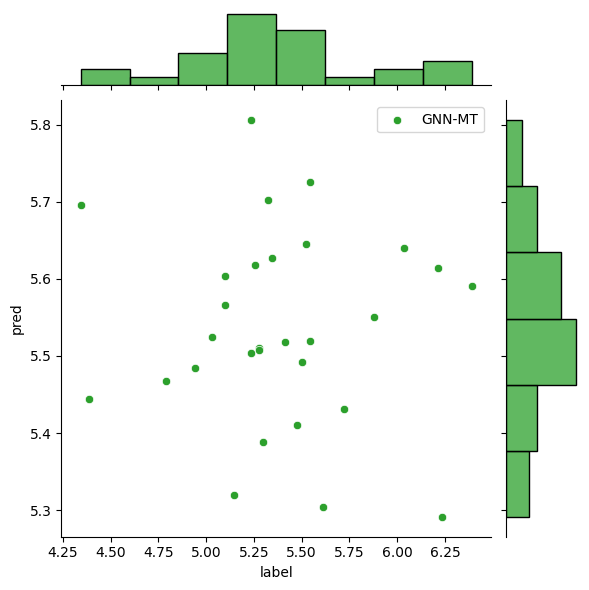

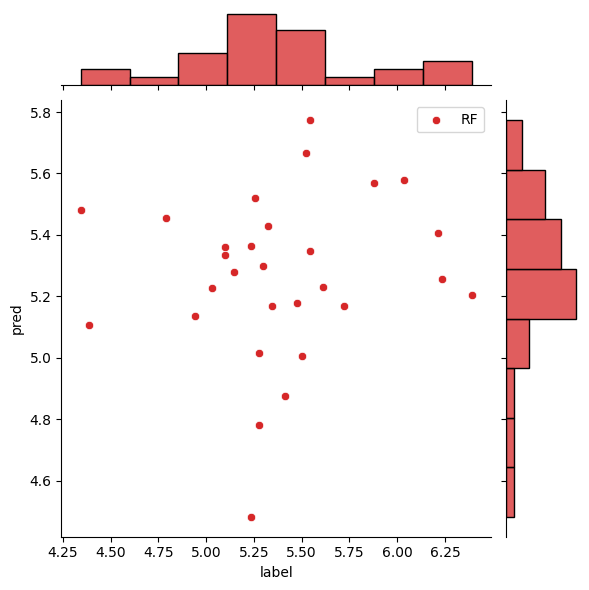

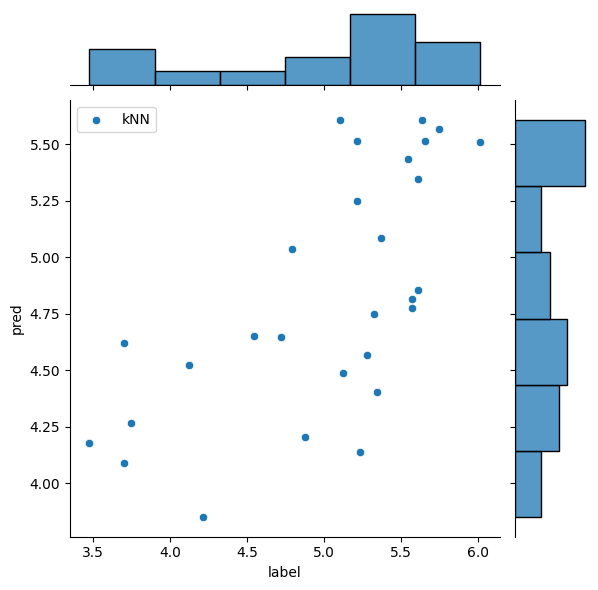

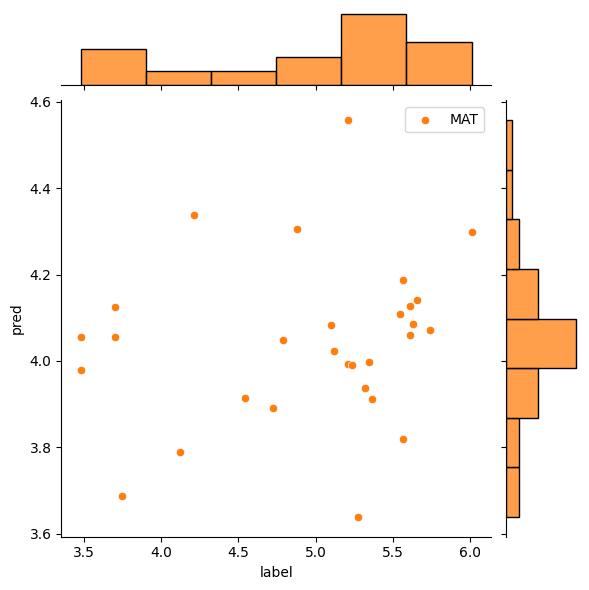

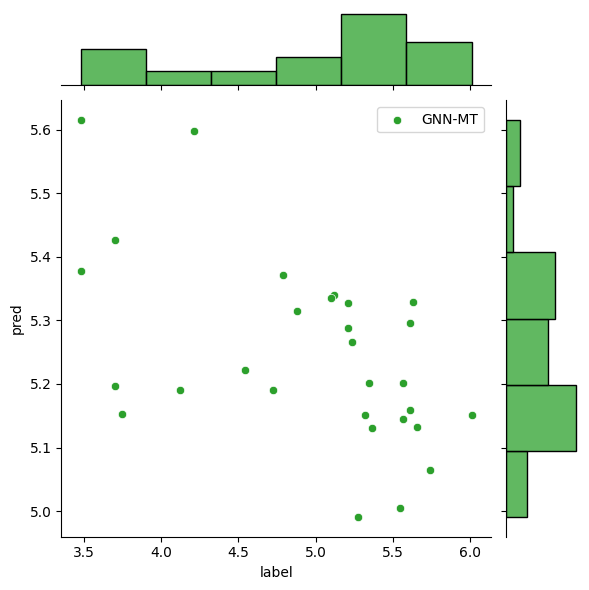

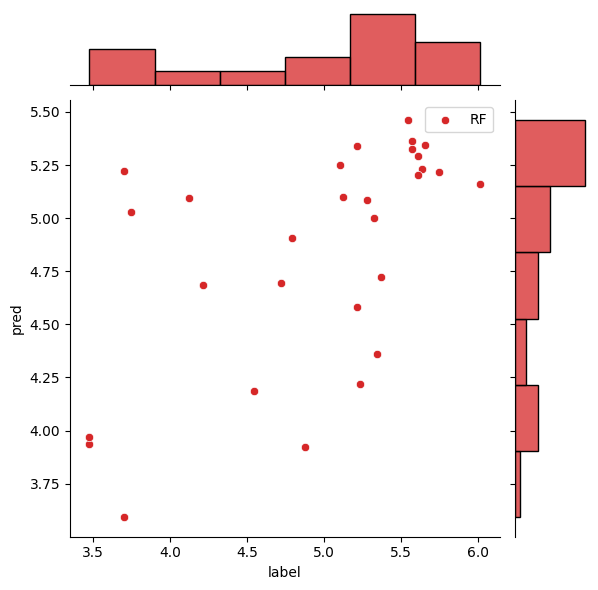

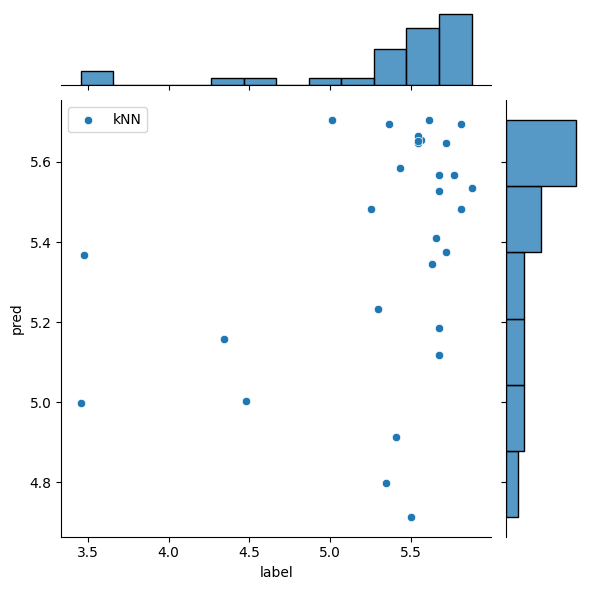

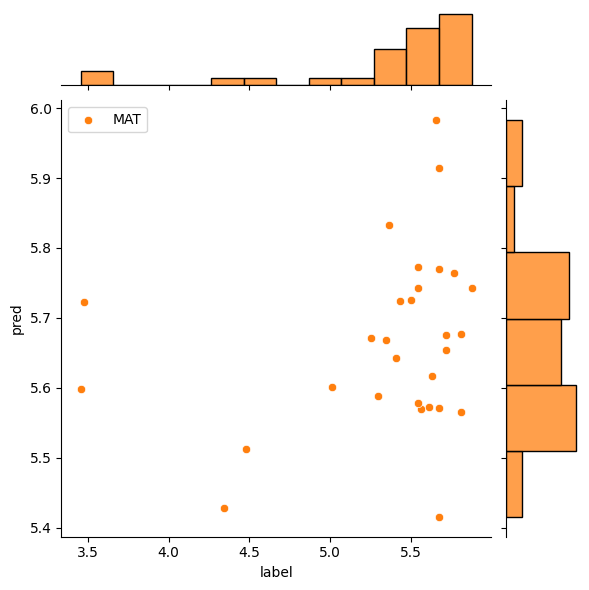

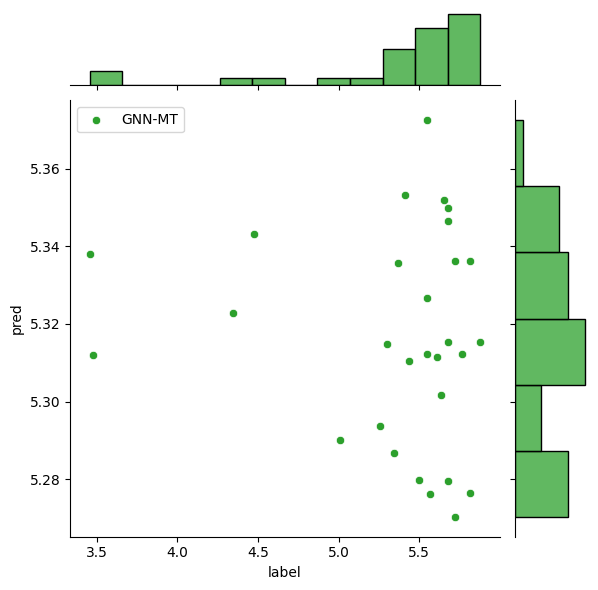

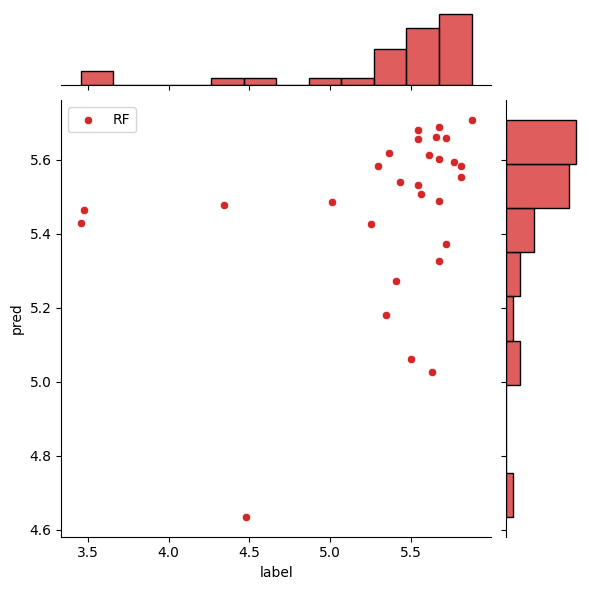

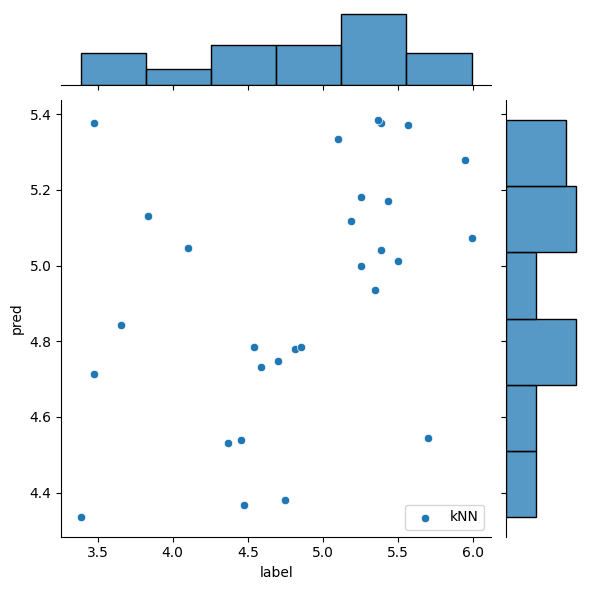

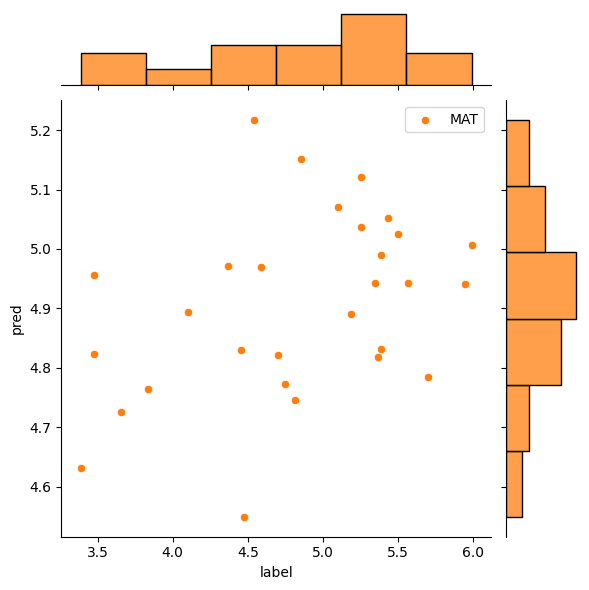

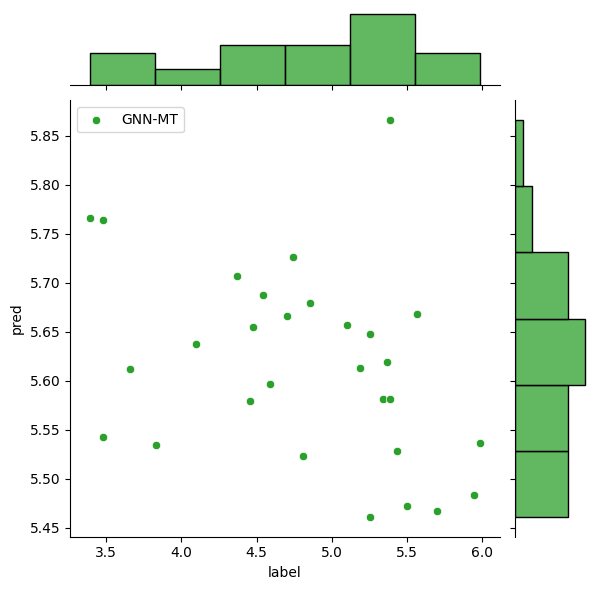

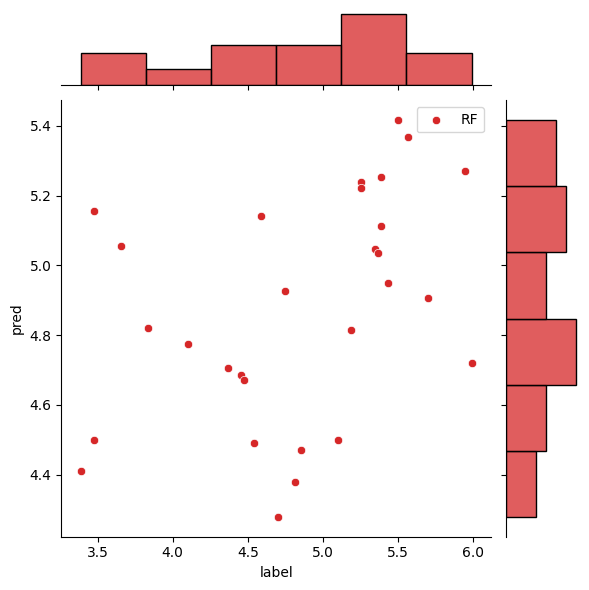

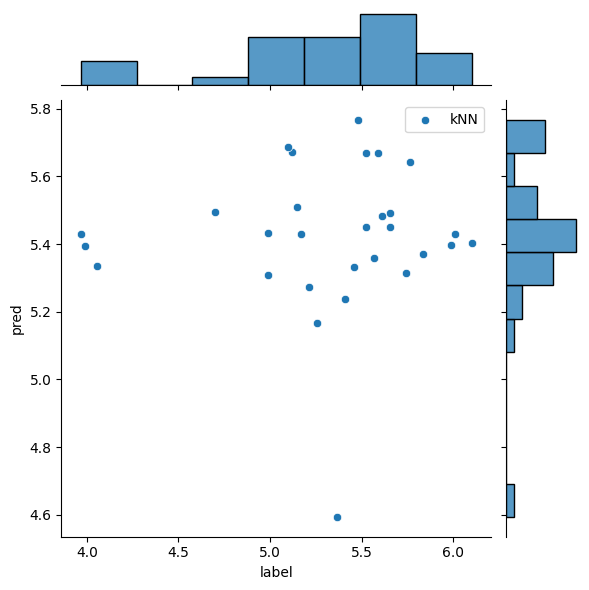

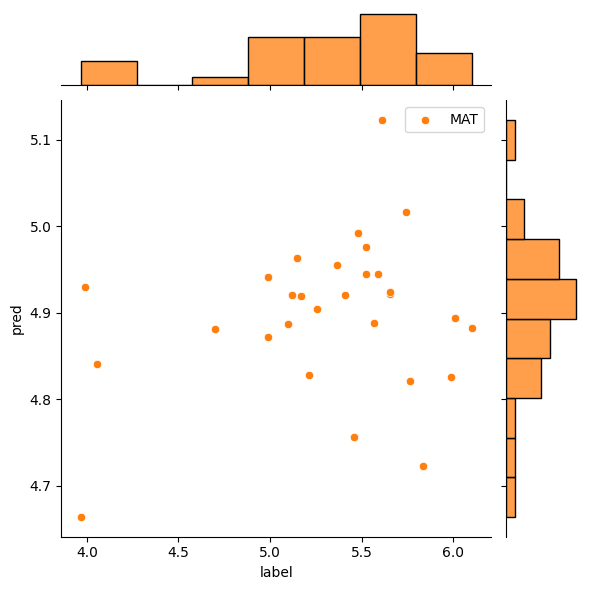

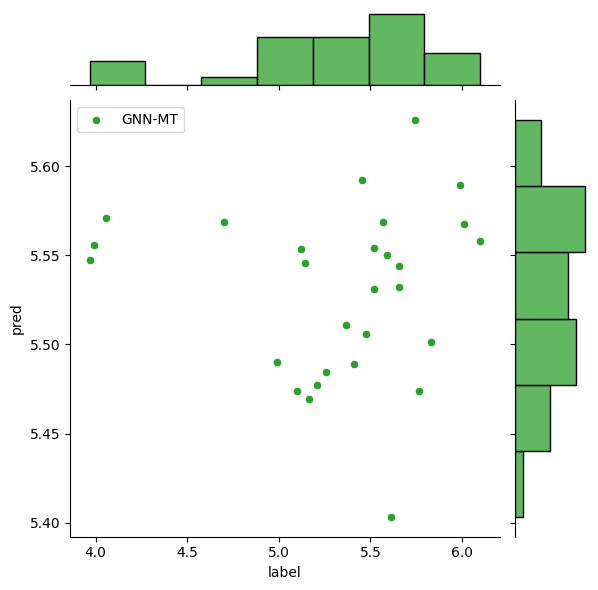

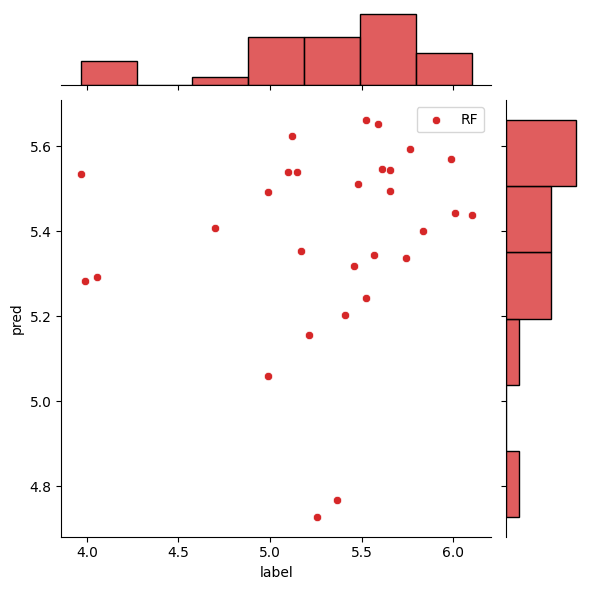

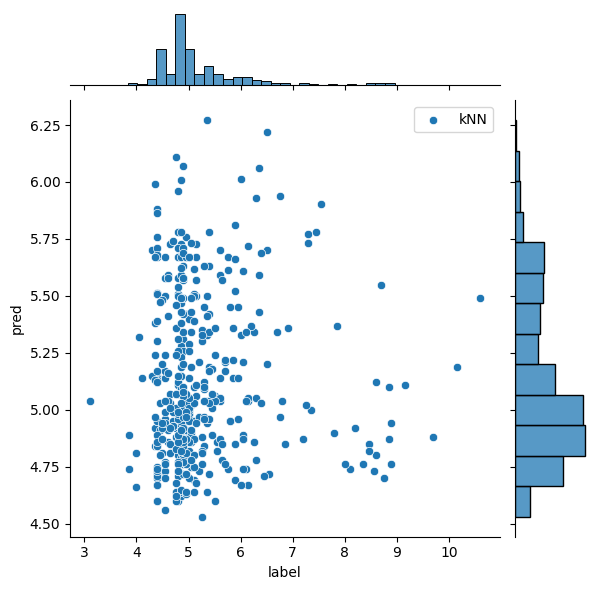

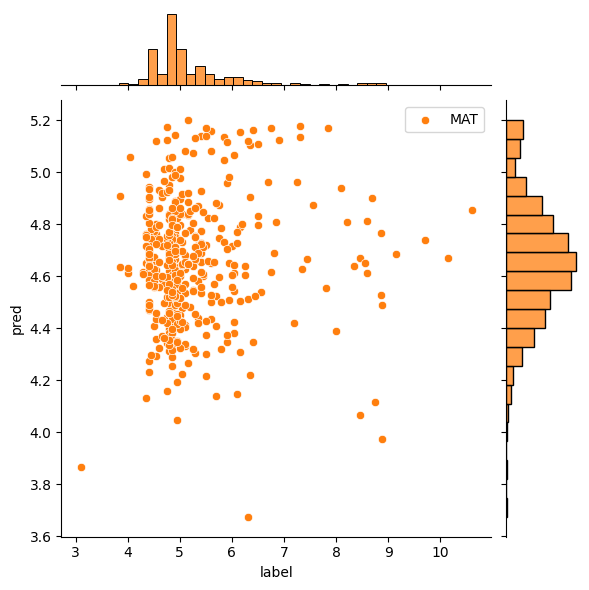

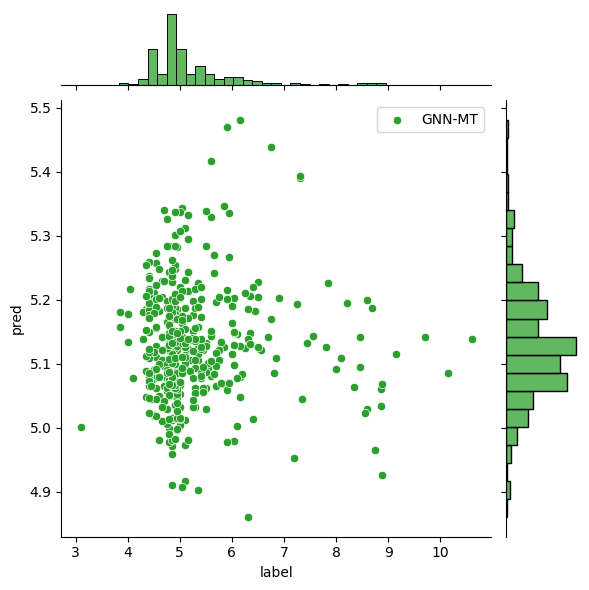

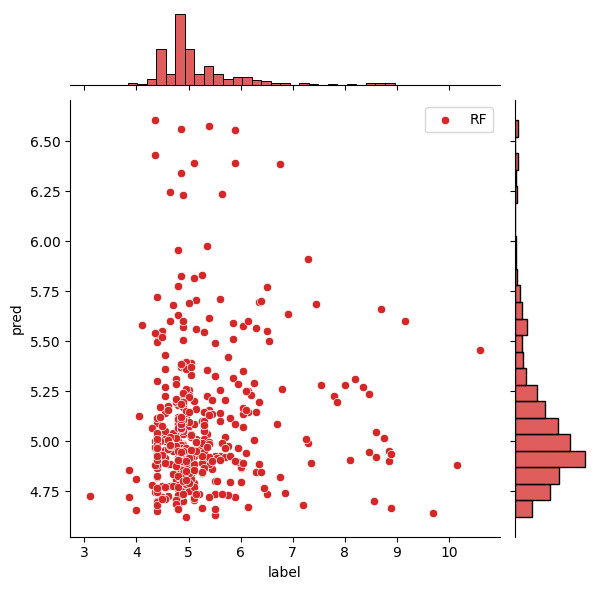

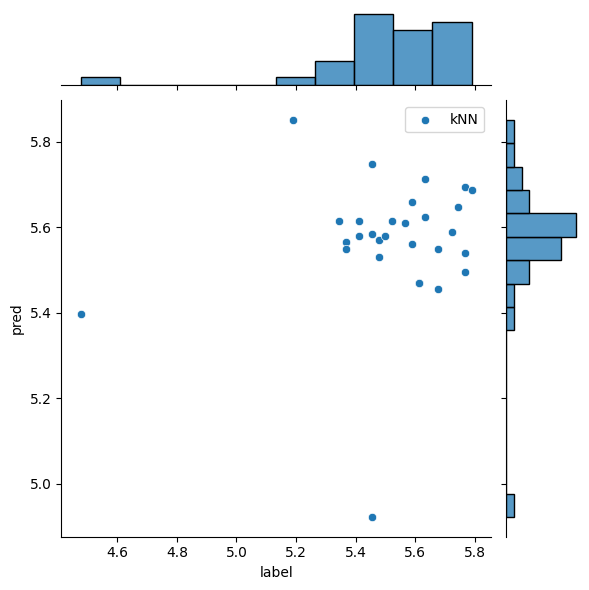

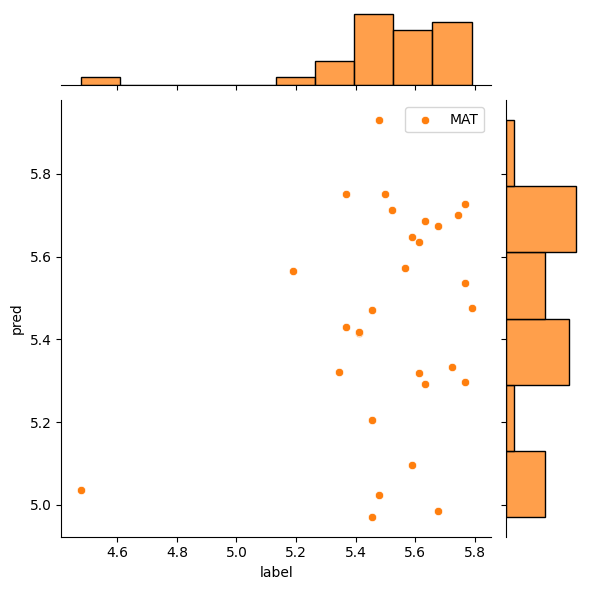

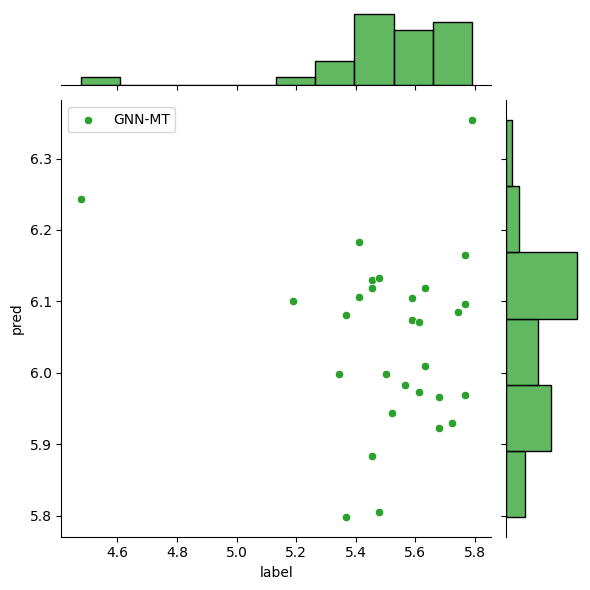

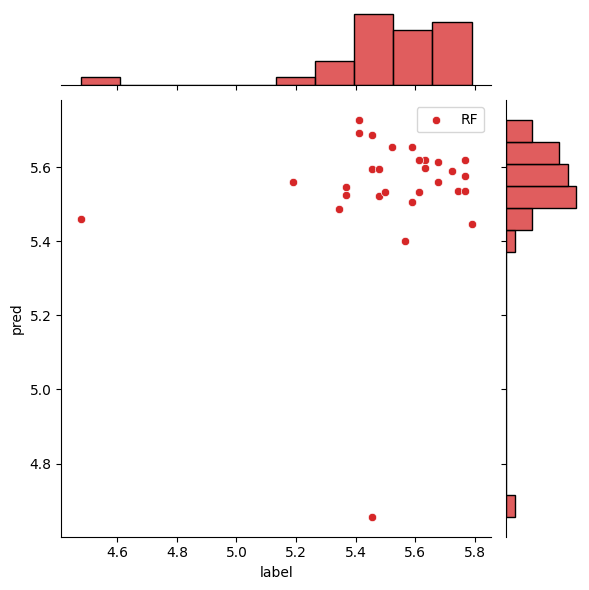

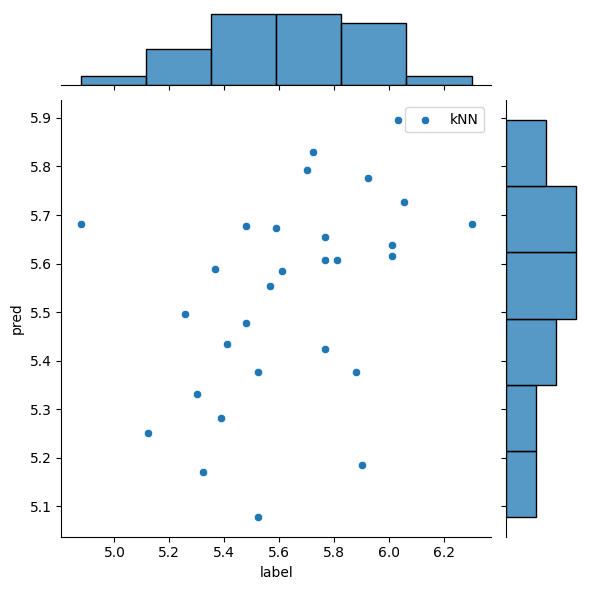

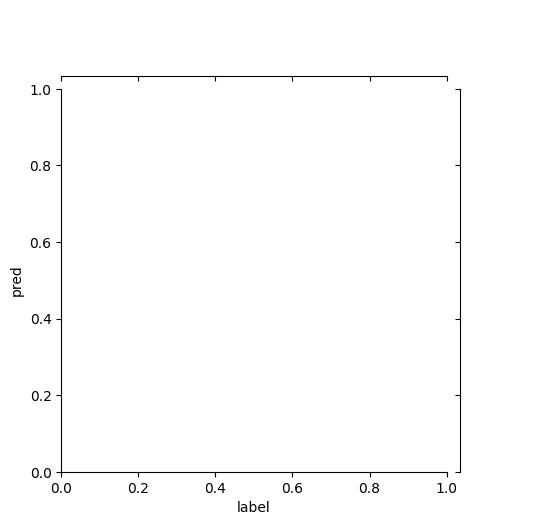

In [58]:
query_str = ' and '.join([
        # 'model != "RF"',
        # f'task == "{task}"',
        'seed == 3',
        'num_train == 128',
        ])
data_df = model_predlabel_df.query(query_str)
data_df = data_df.merge(
    data_df.groupby('task').agg(
        {'model': ('nunique', 'count')}).droplevel(
        0, axis = 1).reset_index().rename(
        columns = {'nunique': 'n_model', 
                    'count':'n_samples'}), 
                    on = ['task'])
data_df = data_df.query('n_model >= 4 and n_samples > 30')
data_df
g = sns.FacetGrid(data_df, col="task", col_wrap=4, hue = 'model') #, height=2, ylim=(0, 10))
g.map(sns.jointplot, 
      'label', 'pred',
         #size= 'num_train', #style = 'seed',
      #   kind="scatter",
        )
for ax in g.axes:
    add_abline(ax)
g.add_legend()
plt.show()


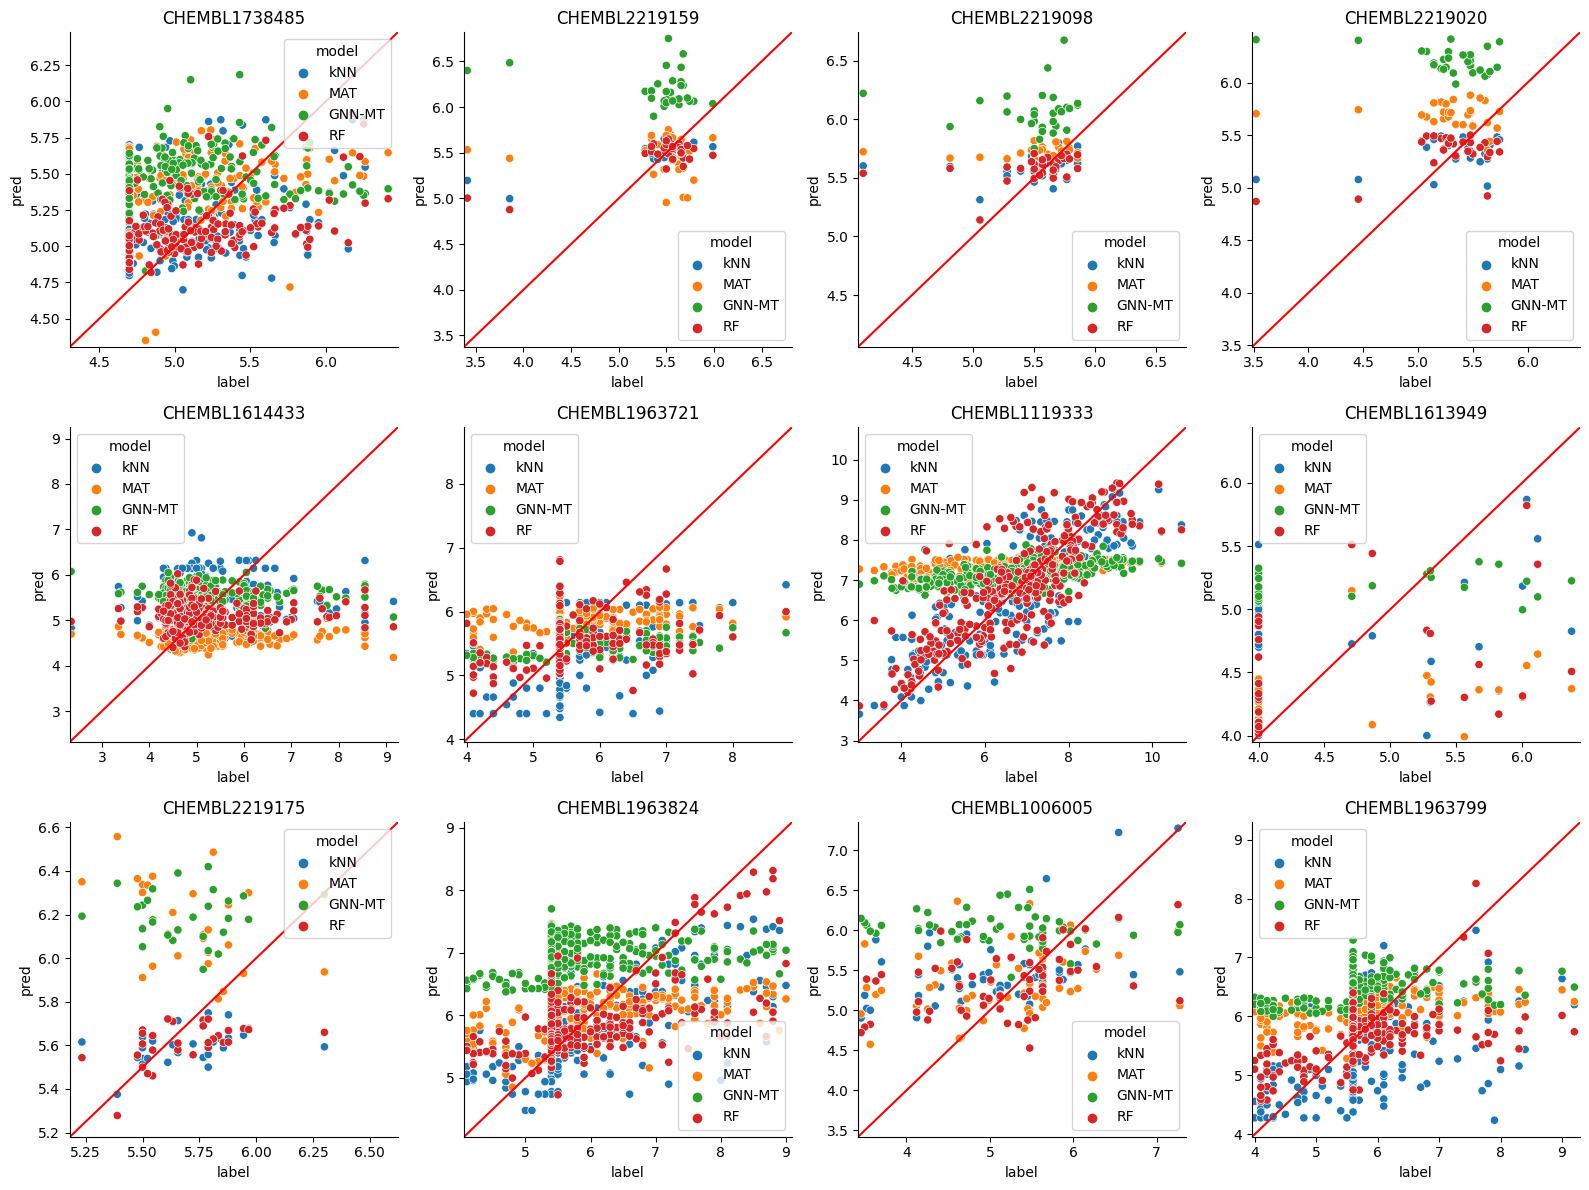

In [51]:
cnt1 = 0
cnt2 = 0
fig = plt.figure(figsize=(16, 12,))
axes = fig.subplots(ncols=4, nrows=3 )
axes1 = axes[:,0:2].reshape(-1)
axes2 = axes[:,2:4].reshape(-1)

for task in tasks:
    query_str = ' and '.join([
        # 'model != "RF"',
        f'task == "{task}"',
        'seed == 3',
        'num_train == 128',
        ])
    data_df = model_predlabel_df.query(query_str)
    if len(data_df) <= 30 or len(data_df.model.unique()) < 4:
        continue
    
    if cnt1 >= 6 and cnt2 >= 6:
        break
    # elif data_df.label.max() > 200 and cnt1 < 6:
    elif data_df.label.max() > 5 and cnt1 < 6:
        ax = axes1[cnt1]
        cnt1 += 1
    elif data_df.label.min() < 5 and cnt2 < 6:
        ax = axes2[cnt2]
        cnt2 += 1
    else:
        continue
    
    # g = sns.jointplot(
    #     model_predlabel_df.query(query_str), 
    #     x = 'label', y = 'pred',
    #     hue = 'model', #size= 'num_train', #style = 'seed',
    #     kind="scatter", #marginal_kws=dict(bins=15),
    #     )
    
    g = sns.scatterplot(model_predlabel_df.query(query_str), 
        x = 'label', y = 'pred',
        hue = 'model', #size= 'num_train', #style = 'seed',
        ax=ax
        )
    # sns.displot(data=model_predlabel_df.query(query_str), 
    #     x = 'label', y = 'pred',
    #     hue = 'model', #size= 'num_train', #style = 'seed',
    #     kind="kde", #marginal_kws=dict(bins=15),
    #     rug=True,
    #     )
    if isinstance(g, sns.axisgrid.JointGrid ):
        g.figure._localaxes[0] = add_abline(g.figure._localaxes[0])
    elif isinstance(g, sns.axisgrid.FacetGrid ):
        pass
    else:
        add_abline(g)
        ax.set_title(task)
# Adjust layout and spacing
plt.tight_layout()
# Show the plot
sns.despine()
plt.show()

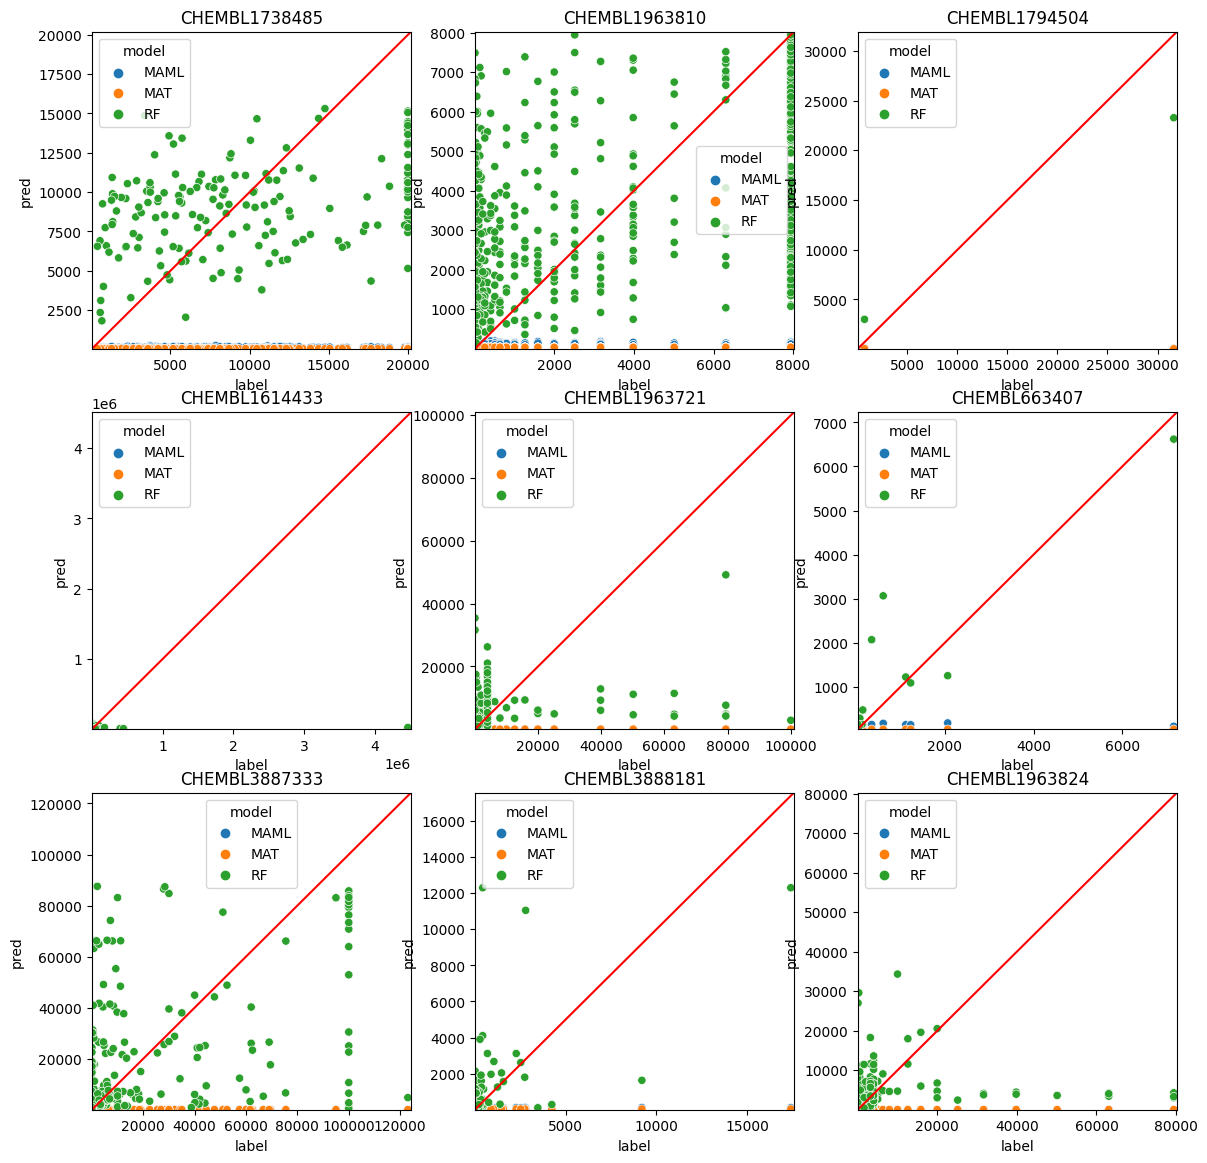

In [ ]:
cnt = 0
fig = plt.figure(figsize=(14,14))
axes = fig.subplots(nrows=3, ncols=3)
for task in tasks:
    query_str = ' and '.join([
        # 'model != "RF"',
        f'task == "{task}"',
        'seed == 3',
        'num_train == 128',
        ])
    data_df = model_predlabel_df.query(query_str)
    if cnt > 8:
        break
    elif data_df.label.max() > 200:
        ax = fig.axes[cnt]
        cnt += 1
    else:
        continue
    
    g = sns.scatterplot(model_predlabel_df.query(query_str), 
        x = 'label', y = 'pred',
        hue = 'model', #size= 'num_train', #style = 'seed',
        ax=ax
        )
    add_abline(g)
    ax.set_title(task)
fig.show()

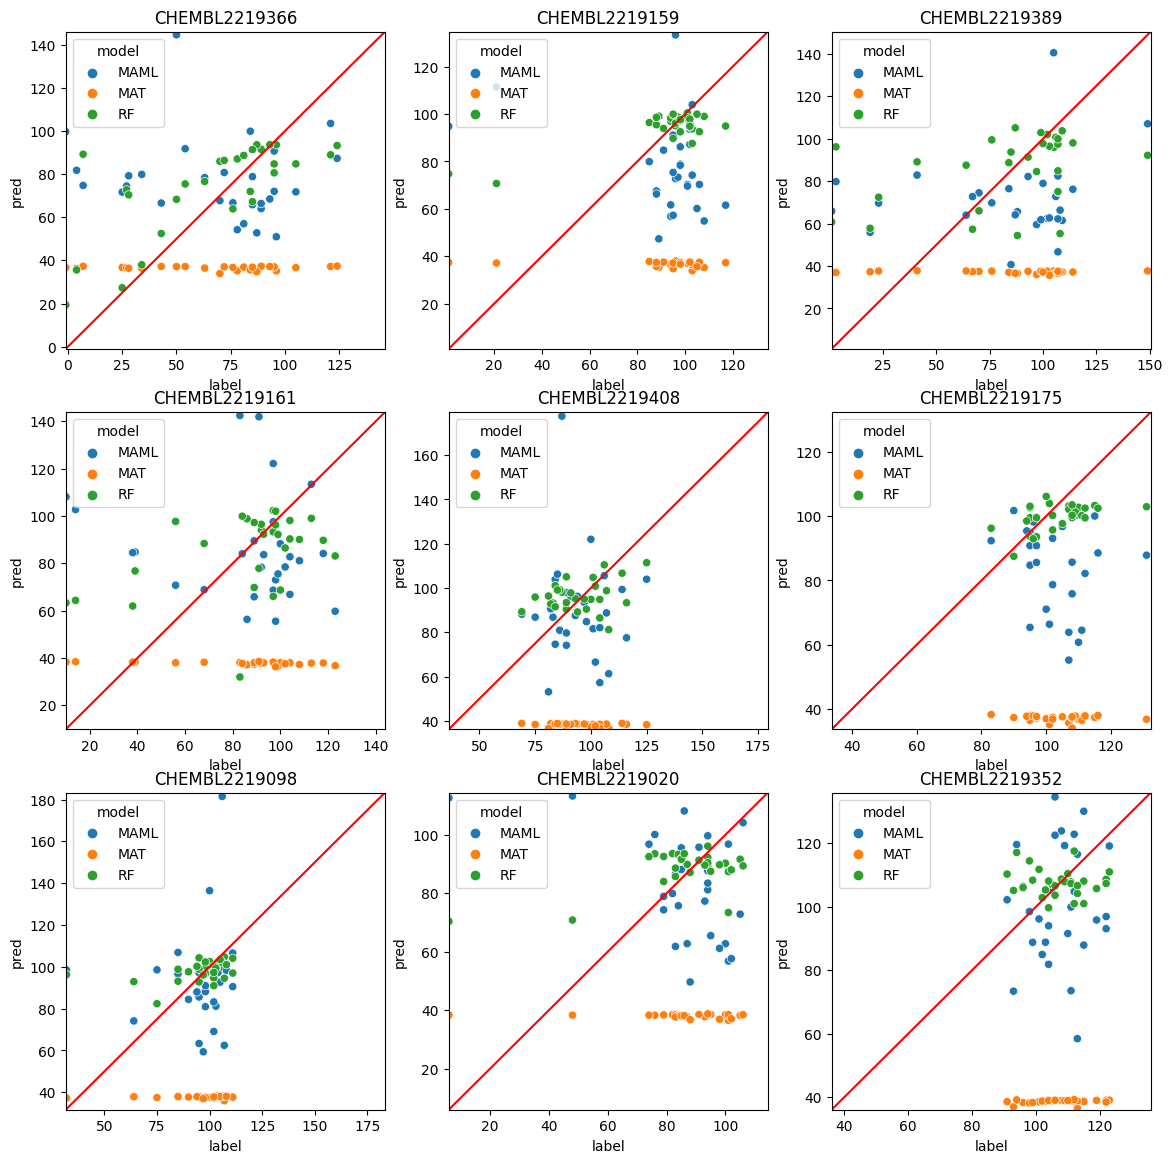

In [ ]:
cnt = 0
fig = plt.figure(figsize=(14,14))
axes = fig.subplots(nrows=3, ncols=3)
for task in tasks:
    query_str = ' and '.join([
        # 'model != "RF"',
        f'task == "{task}"',
        'seed == 3',
        'num_train == 128',
        ])
    data_df = model_predlabel_df.query(query_str)
    if cnt > 8:
        break
    elif data_df.label.max() <= 200:
        ax = fig.axes[cnt]
        cnt += 1
    else:
        continue
    
    g = sns.scatterplot(model_predlabel_df.query(query_str), 
        x = 'label', y = 'pred',
        hue = 'model', #size= 'num_train', #style = 'seed',
        ax=ax
        )
    add_abline(g)
    ax.set_title(task)
fig.show()

##### Find most fitted distribution

In [140]:
def find_most_fitted_dist(x, th_pval = 0.01,verbose = False):
    # dist_li = [sts.lognorm, sts.skewnorm, sts.norm, sts.expon, sts.gamma, sts.weibull_max, sts.weibull_min]
    dist_li = [getattr(sts, name) for name in sts._continuous_distns.__all__ if not name.endswith('_gen') and name not in ('gilbrat',)]
    
    accepted_dists = []
    for dist in dist_li:
        res = sts.kstest(rvs=x, cdf=dist.cdf, args = dist.fit(x))
        if verbose:
            print(dist.name, res)
        pval = res[1]
        if th_pval <= pval:  # not rejected
            accepted_dists.append(dist)
            
    res = []
    for accepted_dist in accepted_dists:
        ks_res = sts.kstest(rvs=x, cdf=accepted_dist.cdf, args = accepted_dist.fit(x))
        res.append( (accepted_dist.name, accepted_dist.fit(x), ks_res) )
    return res


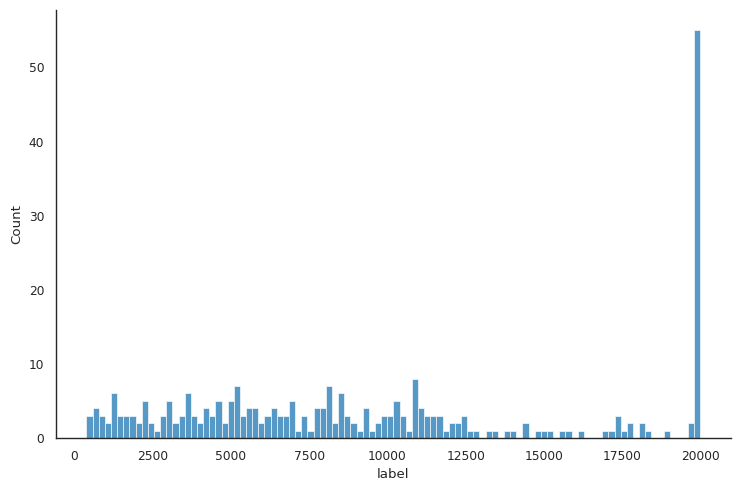

In [144]:
## Ref: https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

#(qsar_pytorch)! pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

sns.set_style('white')
sns.set_context("paper", font_scale = 1)
sns.displot(data=model_predlabel_df.query(query_str + " and task == 'CHEMBL1738485'"), 
            x="label", kind="hist", 
            bins = 100, aspect = 1.5)


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 19.93it/s]


sumsquare_error         aic         bic  kl_div  ks_statistic  \
burr           12.242065  226.542281 -660.724438     inf      0.031640   
lognorm        12.327068  220.298025 -664.565841     inf      0.033570   
gamma          12.686909  214.312368 -657.890460     inf      0.044777   
beta           13.335177  210.857480 -640.882057     inf      0.057077   
norm           17.403477  260.154922 -590.002148     inf      0.102410   

         ks_pvalue  
burr      0.968658  
lognorm   0.948329  
gamma     0.723513  
beta      0.420756  
norm      0.014287

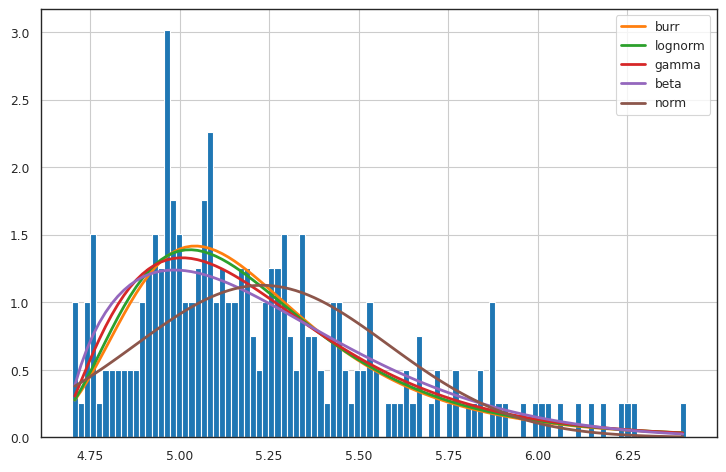

In [147]:
#(qsar_pytorch)! pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

sns.set_style('white')
sns.set_context("paper", font_scale = 1)
sns.displot(data=model_predlabel_df.query(query_str + " and task == 'CHEMBL1738485'"), 
            x="label", kind="hist", 
            bins = 100, aspect = 1.5)

f = Fitter(9-np.log10(model_predlabel_df.query(query_str + " and task == 'CHEMBL1738485'")['label'].unique()),
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()